# Electric power demand forecasts

Electric power demand forecasts play an essential role in the electric industry, as they provide the basis
for making decisions in power system planning and operation. A great variety of mathematical methods
have been used for demand forecasting

This dataset consists of hourly(aggregated) electricity generation and load(demand) in Turkey

Data is taken from EPIAS.

###### This dataset can be used for different purposes. For instance, STLF(Short Term Load Forecasting), which helps developing better day-ahead generator planning.

# Import Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.utils import resample
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
#%matplotlib inline
from math import sqrt
#from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_column',None)

# Load Data

In [2]:
df = pd.read_csv("C:\\Users\\Dharani\\Downloads\\capstone\\final dataset\\power Generation and consumption.csv",parse_dates=['Date_Time'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_Time          26304 non-null  datetime64[ns]
 1   Total (MWh)        26304 non-null  float64       
 2   Natural Gas        26304 non-null  float64       
 3   Dammed Hydro       26304 non-null  float64       
 4   Lignite            26304 non-null  float64       
 5   River              26304 non-null  float64       
 6   Import Coal        26304 non-null  float64       
 7   Wind               26304 non-null  float64       
 8   Solar              26304 non-null  float64       
 9   Fuel Oil           26304 non-null  float64       
 10  Geothermal         26304 non-null  float64       
 11  Asphaltite Coal    26304 non-null  float64       
 12  Black Coal         26304 non-null  float64       
 13  Biomass            26304 non-null  float64       
 14  Naphta

In [4]:
df.describe()

Total (MWh)   Natural Gas  Dammed Hydro       Lignite         River  \
count  26304.000000  26304.000000  26304.000000  26304.000000  26304.000000   
mean   34856.246428   9400.731100   5494.237874   4772.194806   2105.863149   
std     5368.336456   4200.963927   2910.245274    631.494310   1336.065809   
min    15333.300000    496.660000    296.690000   2189.100000    389.390000   
25%    30895.240000   6333.625000   3145.060000   4395.270000   1098.272500   
50%    35003.340000   9944.095000   5236.425000   4828.945000   1563.035000   
75%    38869.607500  12251.890000   7636.687500   5214.507500   2934.095000   
max    51285.690000  19453.650000  15891.780000   6404.330000   6103.590000   

        Import Coal          Wind         Solar      Fuel Oil    Geothermal  \
count  26304.000000  26304.000000  26304.000000  26304.000000  26304.000000   
mean    6863.734111   3419.575891    180.362072     51.100454   1127.026897   
std     1910.916438   1955.629688    297.629795     22.505577    122.140457   
min      956.350000    139.760000     -0.110000      0.000000    663.530000   
25%     5563.827500   1766.722500      0.000000     36.100000   1044.697500   
50%     7403.550000   3181.885000     10.045000     39.200000   1137.870000   
75%     8341.035000   4842.887500    218.660000     71.500000   1226.162500   
max    10138.840000   9327.740000   1289.820000    105.800000   1357.300000   

       Asphaltite Coal    Black Coal       Biomass   Naphta      LNG  \
count     26304.000000  26304.000000  26304.000000  26304.0  26304.0   
mean        234.333762    446.918584    663.792856      0.0      0.0   
std          89.536371    106.745462    168.767226      0.0      0.0   
min           0.000000    167.240000    369.680000      0.0      0.0   
25%         194.300000    391.235000    480.017500      0.0      0.0   
50%         229.620000    453.985000    669.835000      0.0      0.0   
75%         324.560000    522.590000    811.137500      0.0      0.0   
max         368.720000    692.620000   1011.230000      0.0      0.0   

       Import-Export    Waste Heat  Consumption (MWh)  
count   26304.000000  26304.000000       26304.000000  
mean        9.787199     86.580636       35797.648524  
std       350.939745     12.945710        5894.503178  
min     -1949.250000     35.730000       15333.300000  
25%      -244.822500     77.220000       31309.907500  
50%       -20.085000     87.210000       35915.710000  
75%       255.000000     95.570000       40083.997500  
max      1648.540000    127.760000       55575.020000

In [5]:
df.isnull().sum()

Date_Time            0
Total (MWh)          0
Natural Gas          0
Dammed Hydro         0
Lignite              0
River                0
Import Coal          0
Wind                 0
Solar                0
Fuel Oil             0
Geothermal           0
Asphaltite Coal      0
Black Coal           0
Biomass              0
Naphta               0
LNG                  0
Import-Export        0
Waste Heat           0
Consumption (MWh)    0
dtype: int64

In [6]:
# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print(column_name, ':', count)

Date_Time : 0
Total (MWh) : 0
Natural Gas : 0
Dammed Hydro : 0
Lignite : 0
River : 0
Import Coal : 0
Wind : 0
Solar : 9969
Fuel Oil : 6
Geothermal : 0
Asphaltite Coal : 1058
Black Coal : 0
Biomass : 0
Naphta : 26304
LNG : 26304
Import-Export : 1117
Waste Heat : 0
Consumption (MWh) : 0


In [7]:
df.drop(["Naphta", "LNG"],axis=1, inplace = True)

#### Observations:

The Naphtha and LNG column is a zero vector

The solar has 9969 and Asphaltite Coal has 1058 number of zero vector

The second column (Total Generation MWh) is the sum of all the succeeding columns ignoring the very last column (Consumption (MWh))

There are 26304 rows, Consumption MWh > Total (MWh) 

The Total Generation column the total amount of energy that the power plant(s) creates in an hour while the very last Consumption (MWh) column is the amount of energy consumed in that same hour by citizens of Turkey



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_Time          26304 non-null  datetime64[ns]
 1   Total (MWh)        26304 non-null  float64       
 2   Natural Gas        26304 non-null  float64       
 3   Dammed Hydro       26304 non-null  float64       
 4   Lignite            26304 non-null  float64       
 5   River              26304 non-null  float64       
 6   Import Coal        26304 non-null  float64       
 7   Wind               26304 non-null  float64       
 8   Solar              26304 non-null  float64       
 9   Fuel Oil           26304 non-null  float64       
 10  Geothermal         26304 non-null  float64       
 11  Asphaltite Coal    26304 non-null  float64       
 12  Black Coal         26304 non-null  float64       
 13  Biomass            26304 non-null  float64       
 14  Import

In [9]:
df['Date_Time'].min(), df['Date_Time'].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2022-12-31 23:00:00'))

### Indexing with Date

In [10]:
df=df.set_index('Date_Time')

## visualizing the column

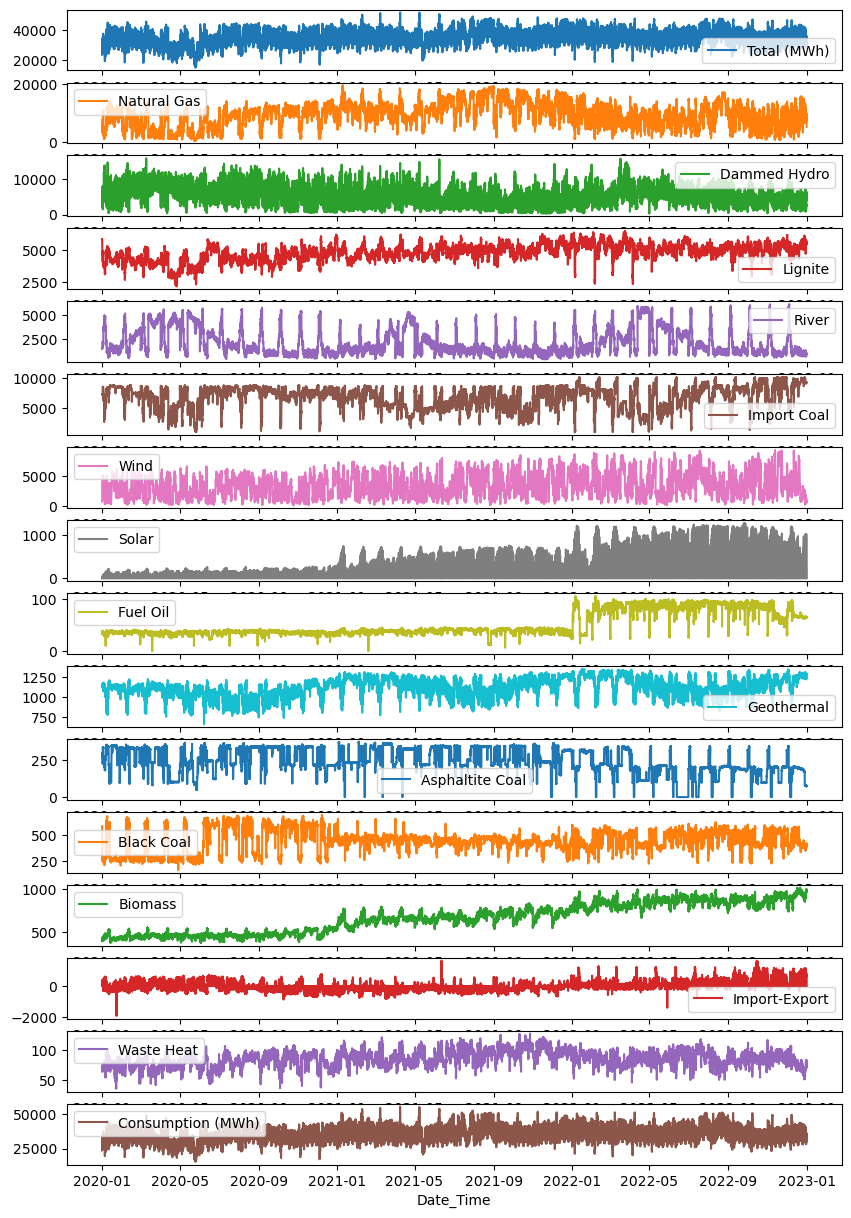

In [11]:
df.plot(subplots=True, figsize=(10, 15), sharex=False)
plt.show()

This plot shows how many MegaWatt has been generated and consumption in hourly basis

In [12]:
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['Year'] = df.index.year

#### Daily Average Energy generation

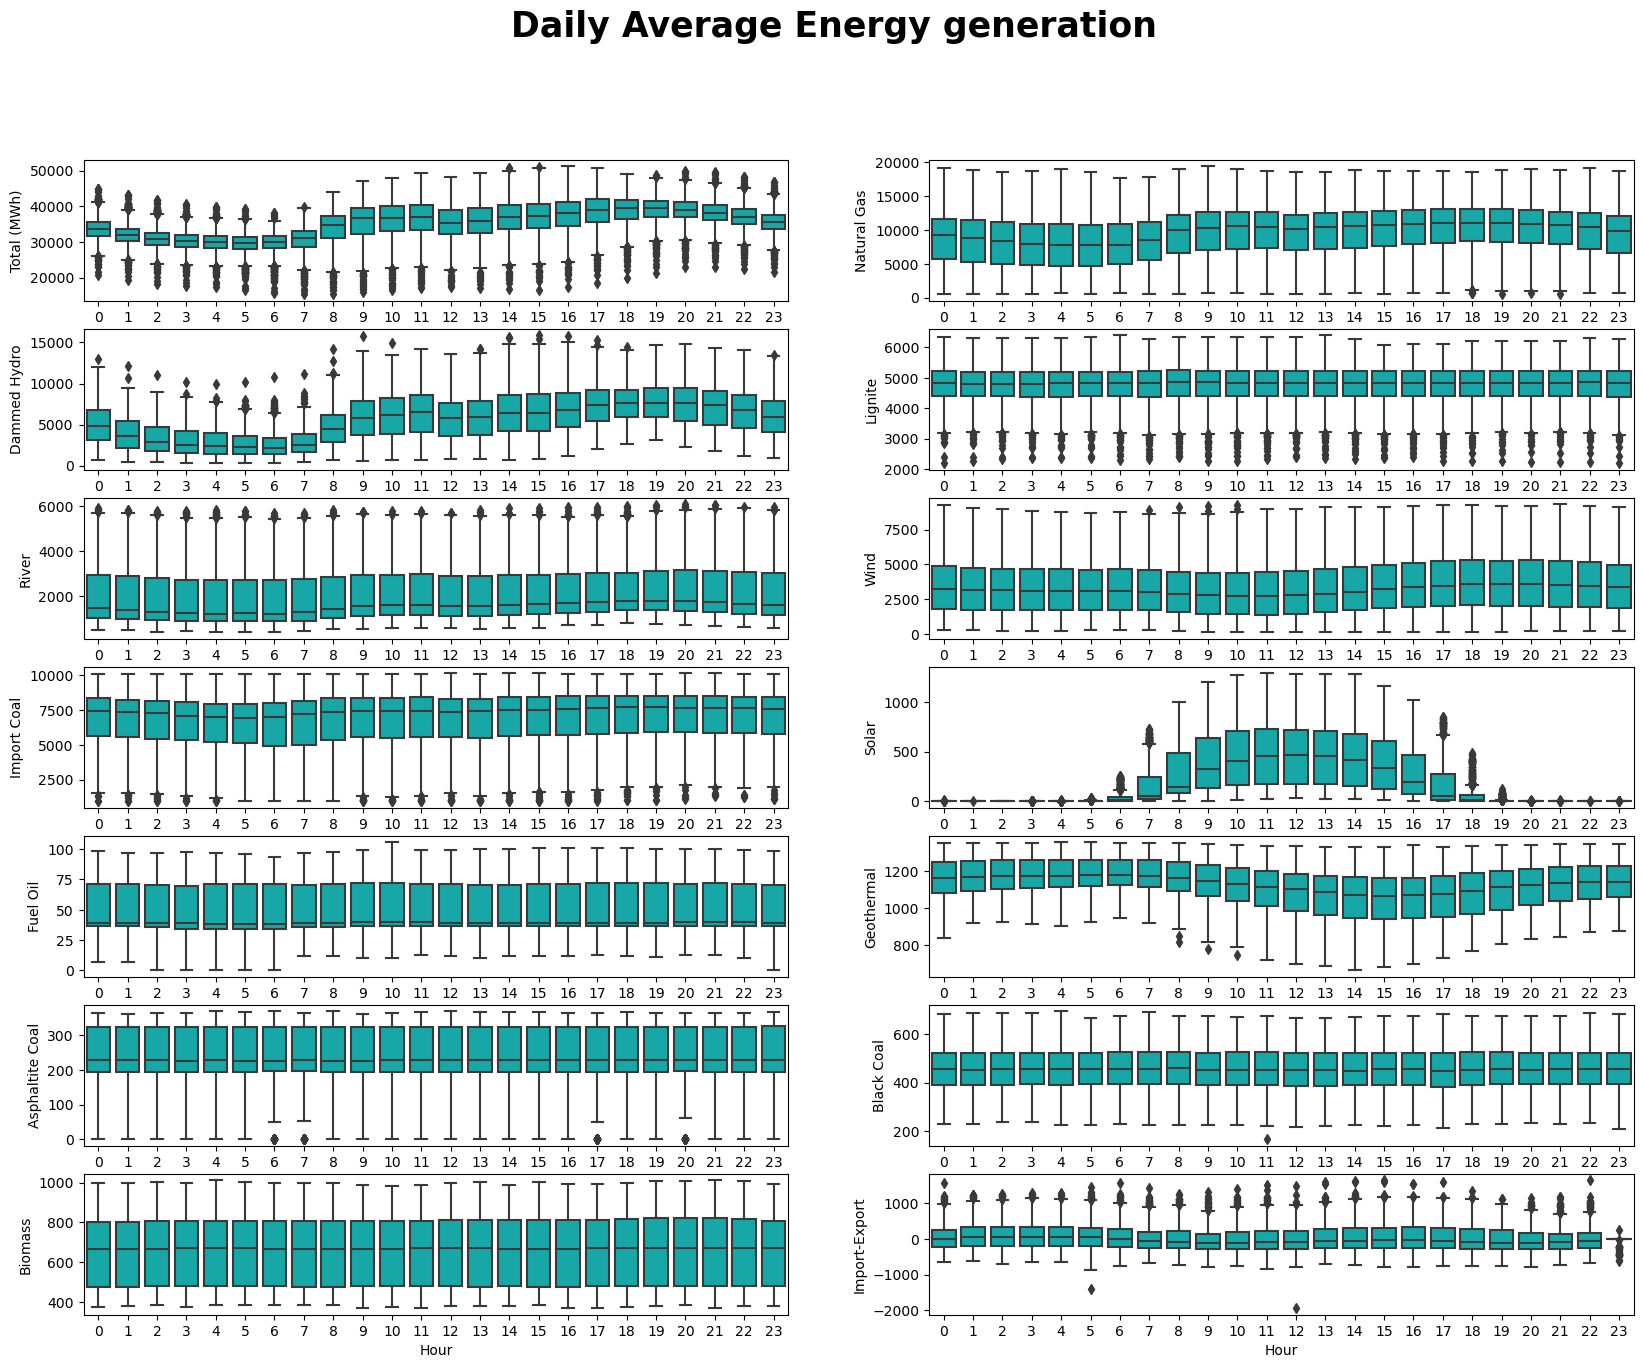

In [13]:
columns = ['Total (MWh)', 'Natural Gas', 'Dammed Hydro', 'Lignite', 'River',
           'Wind', 'Import Coal', 'Solar', 'Fuel Oil', 'Geothermal', 
           'Asphaltite Coal', 'Black Coal', 'Biomass', 'Import-Export']

f, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 15))
f.suptitle('Daily Average Energy generation',weight='bold', fontsize=25)

for i, col in enumerate(columns):
    sns.boxplot(data=df, x=df['Hour'], y=col, ax=axes.flatten()[i], color='c')

### Solar power Generation

<AxesSubplot:xlabel='Hour', ylabel='Solar'>

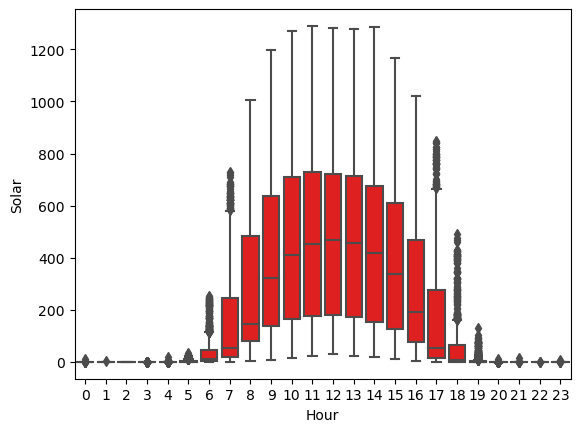

In [14]:
sns.boxplot(data=df, x=df['Hour'], y='Solar', color='red')

This plot shows that we obtain solar energy in day time only

### Month Average Energy generation

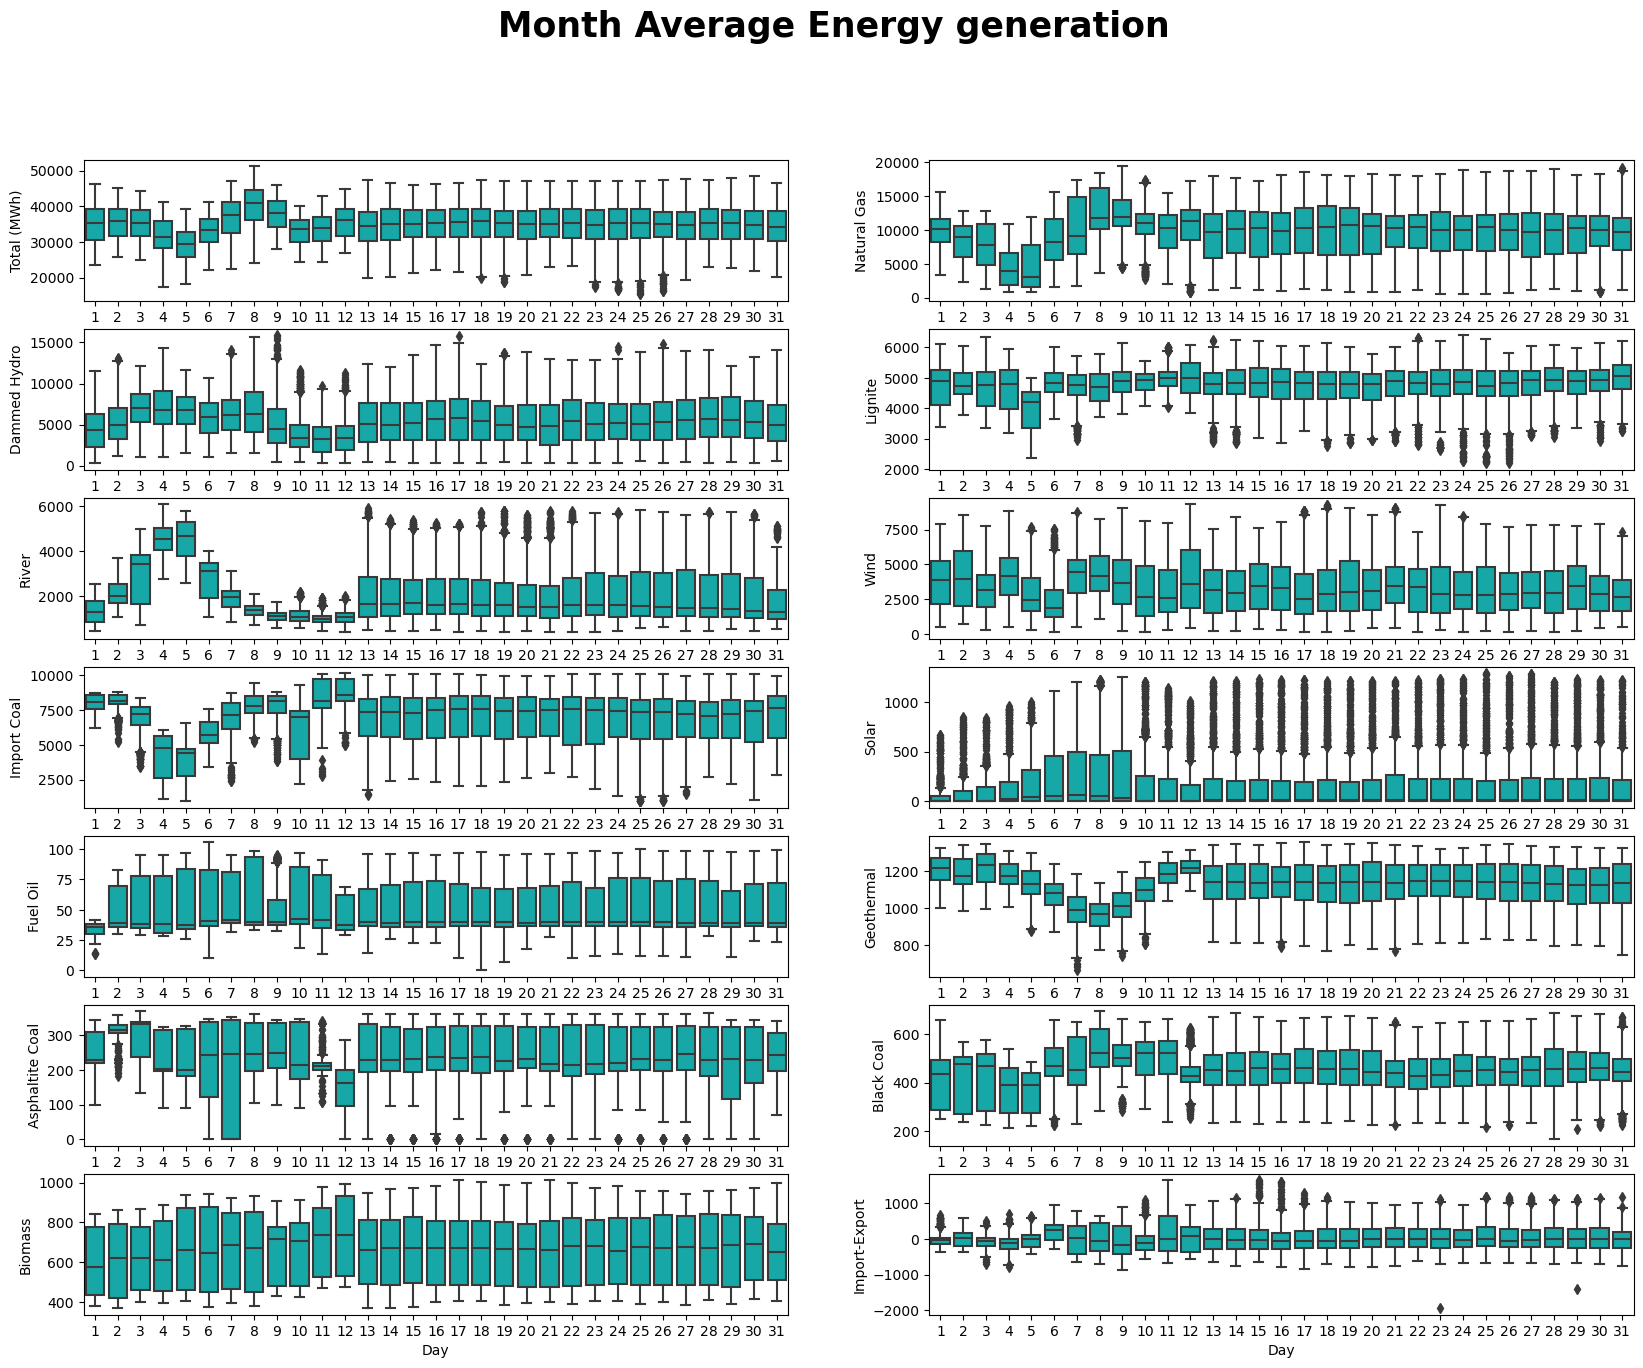

In [15]:
columns = ['Total (MWh)', 'Natural Gas', 'Dammed Hydro', 'Lignite', 'River',
           'Wind', 'Import Coal', 'Solar', 'Fuel Oil', 'Geothermal', 
           'Asphaltite Coal', 'Black Coal', 'Biomass', 'Import-Export']

f, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 15))
f.suptitle('Month Average Energy generation', weight='bold', fontsize=25)

for i, col in enumerate(columns):
    sns.boxplot(data=df, x='Day', y=col, ax=axes.flatten()[i], color='c')

### yearly Average Energy generation

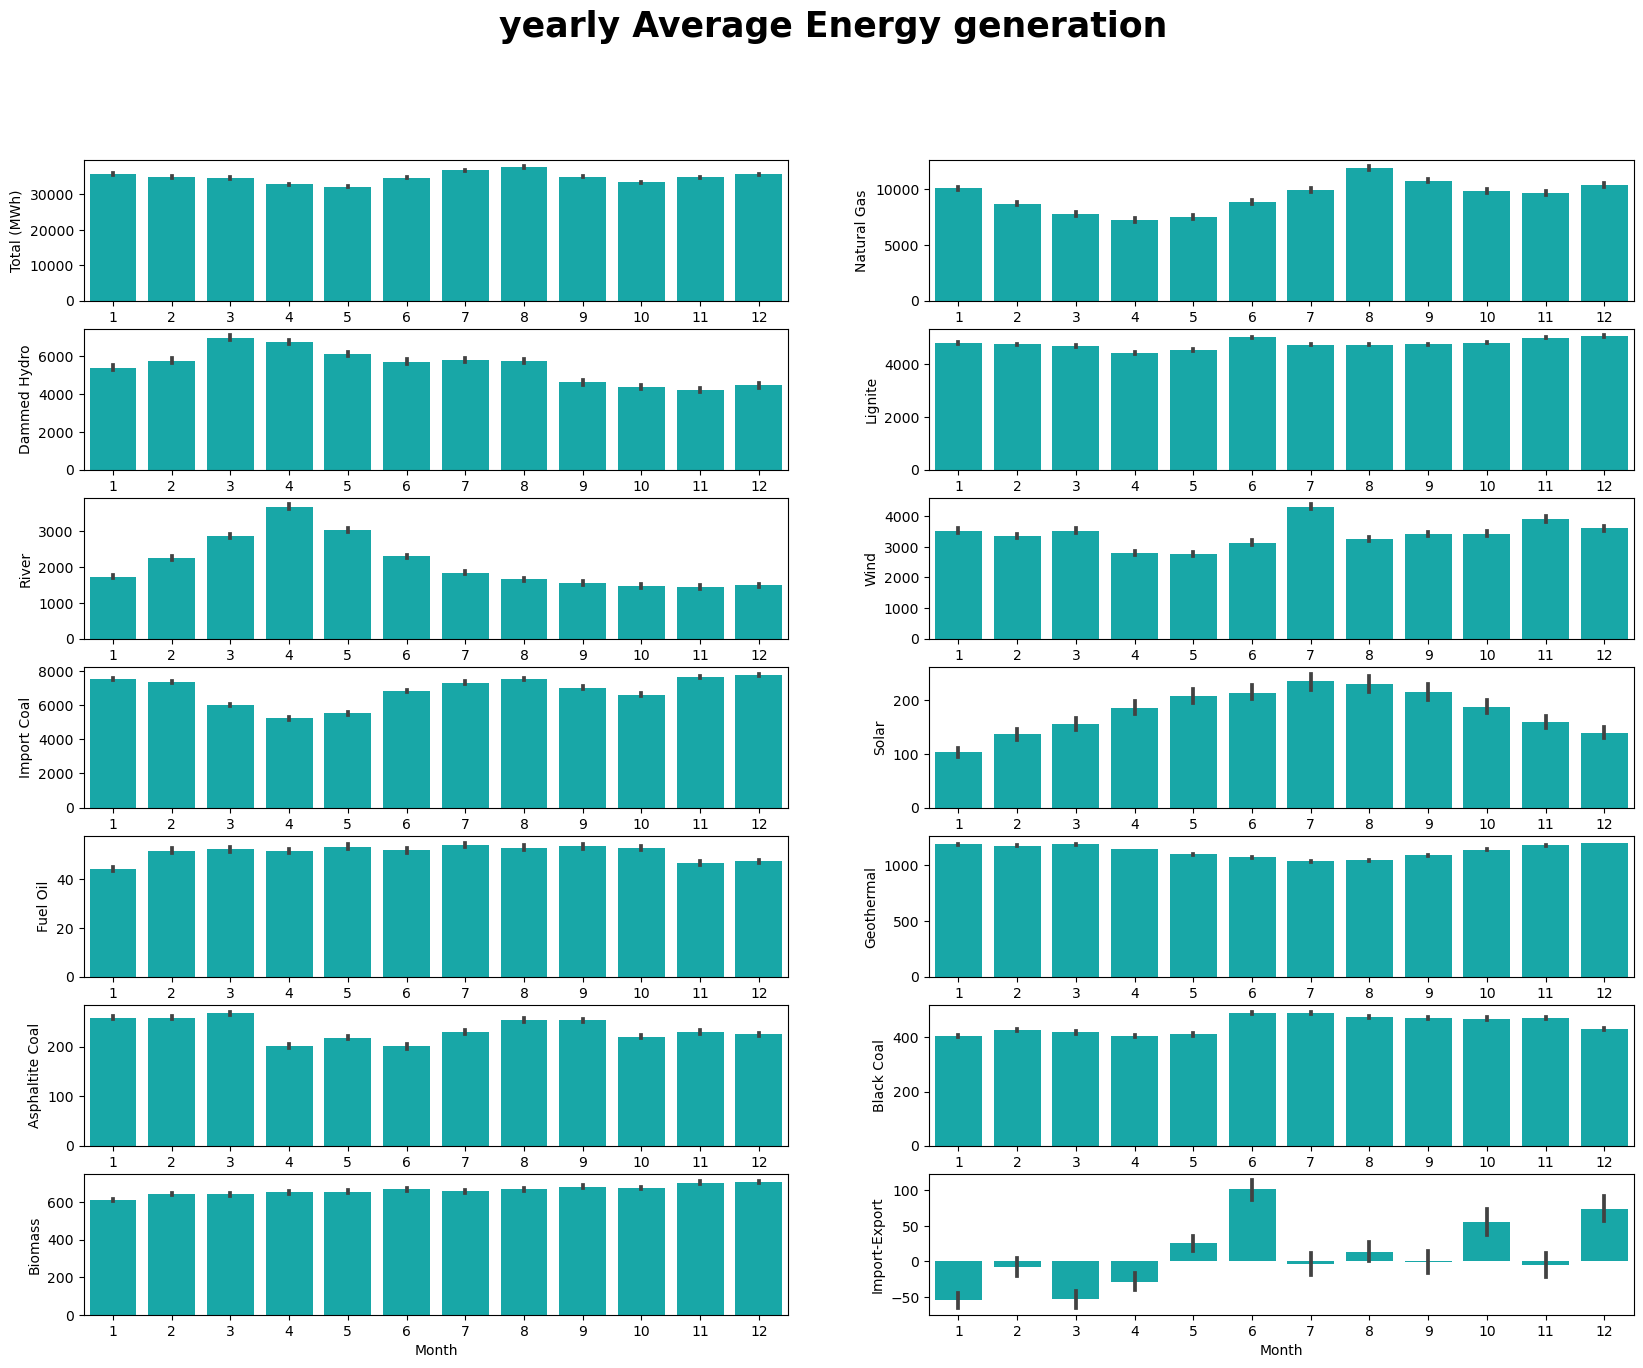

In [16]:
columns = ['Total (MWh)', 'Natural Gas', 'Dammed Hydro', 'Lignite', 'River',
           'Wind', 'Import Coal', 'Solar', 'Fuel Oil', 'Geothermal', 
           'Asphaltite Coal', 'Black Coal', 'Biomass', 'Import-Export']

f, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 15))
f.suptitle('yearly Average Energy generation', weight='bold', fontsize=25)

for i, col in enumerate(columns):
    sns.barplot(data=df, x='Month', y=col, ax=axes.flatten()[i], color='c')

### Energy consumption between Consumption and Total

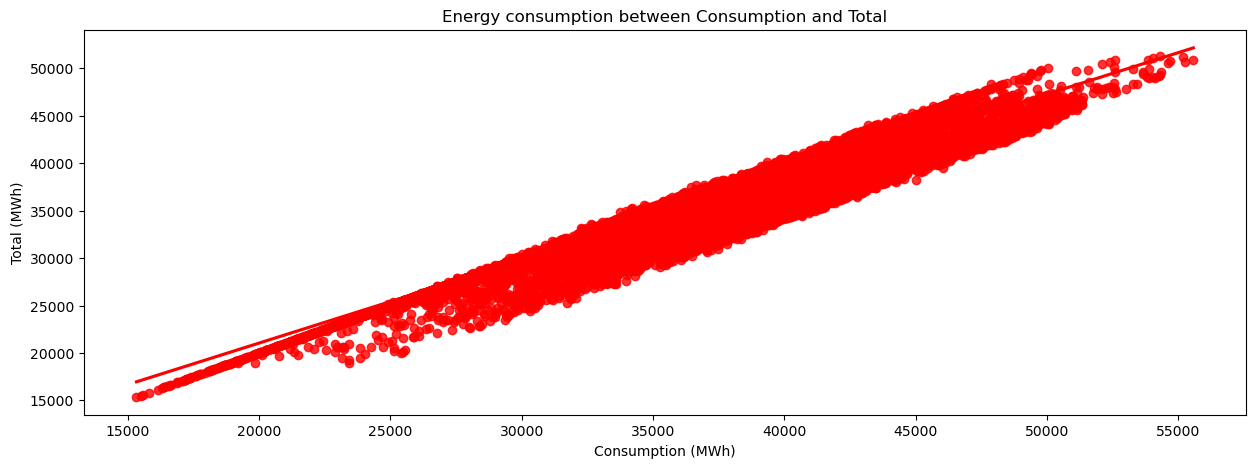

In [17]:
plt.figure(figsize=(15, 5))
sns.regplot(x='Consumption (MWh)', y='Total (MWh)',color='r', data=df)
plt.title('Energy consumption between Consumption and Total')
plt.show()

This shows there is linear relationship between consumption and generation

# Consumption

In [18]:
df_consumption = pd.DataFrame(df["Consumption (MWh)"].resample('D').sum())

##### Visualizing data

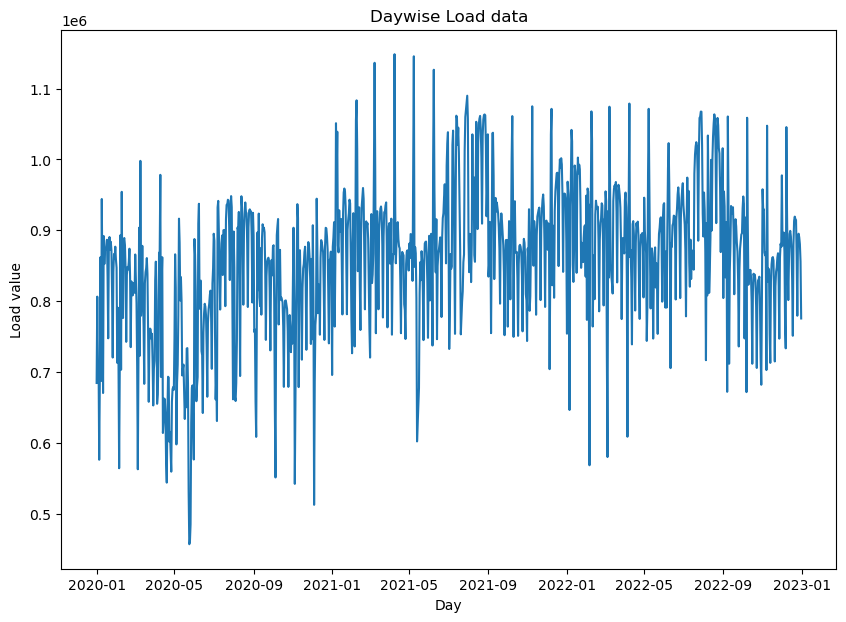

In [19]:
plt.figure(figsize=(10,7))
plt.plot(df_consumption)
plt.title('Daywise Load data')
plt.xlabel('Day')
plt.ylabel('Load value')
plt.show()

In [20]:
df1= df["2022-01-01":"2022-12-31"]

##### Creating hourly Consumption into daily Consumption using resample()

In [21]:
df_consumption = pd.DataFrame(df1["Consumption (MWh)"].resample('D').sum())

In [22]:
df_consumption.head()

Consumption (MWh)
Date_Time                    
2022-01-01          754257.04
2022-01-02          968617.19
2022-01-03          950748.60
2022-01-04          842351.60
2022-01-05          646619.46

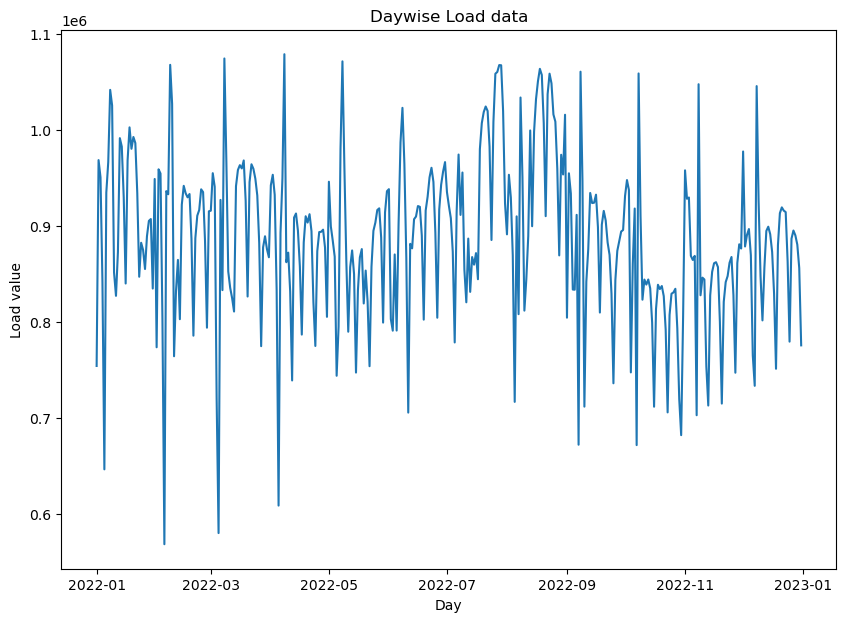

In [23]:
plt.figure(figsize=(10,7))
plt.plot(df_consumption)
plt.title('Daywise Load data')
plt.xlabel('Day')
plt.ylabel('Load value')
plt.show()

The plot clearly indicates that the time series has seasonality pattern.The electricity consumption are always some fluxuation. There is always a trend.

# Checking Stationarity
ADF Test

Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

Null Hypothesis: The series has a unit root (value of a =1)(not stationary)

Alternate Hypothesis: The series has no unit root (stationary)

In [24]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(df_consumption, autolag = 'AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('# of Lags : %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.037182
p-value: 0.001228
# of Lags : 6
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


The p-value is 0.001228, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

# Decomposing
Decomposing the time series into three components: trend, seasonality, and residual/noise.

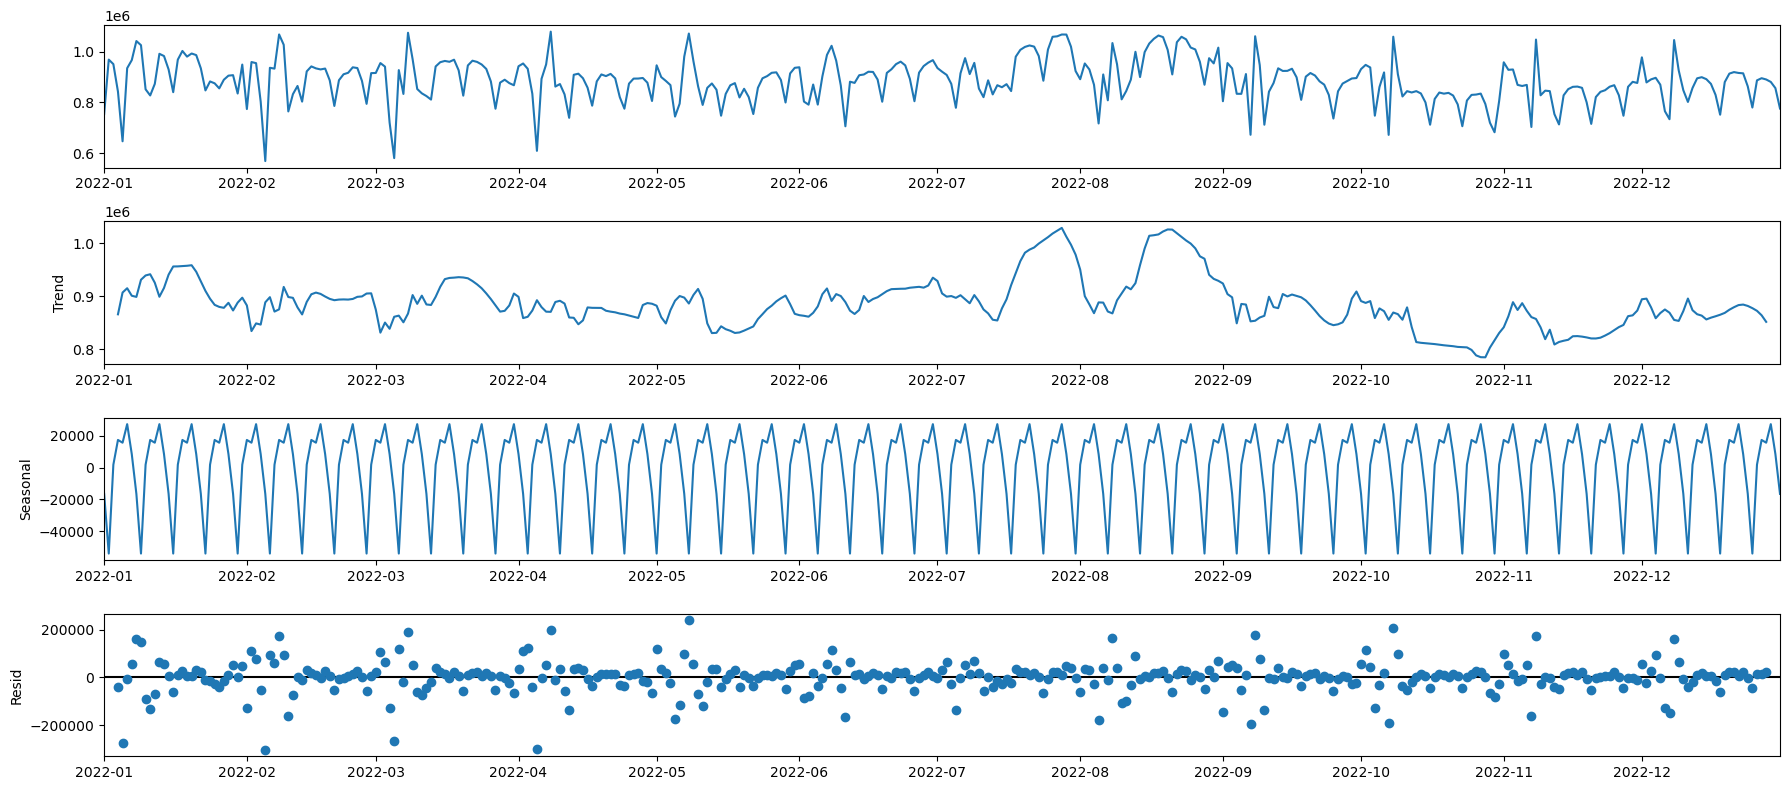

In [25]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_consumption, model='additive')
fig = decomposition.plot()
plt.show()

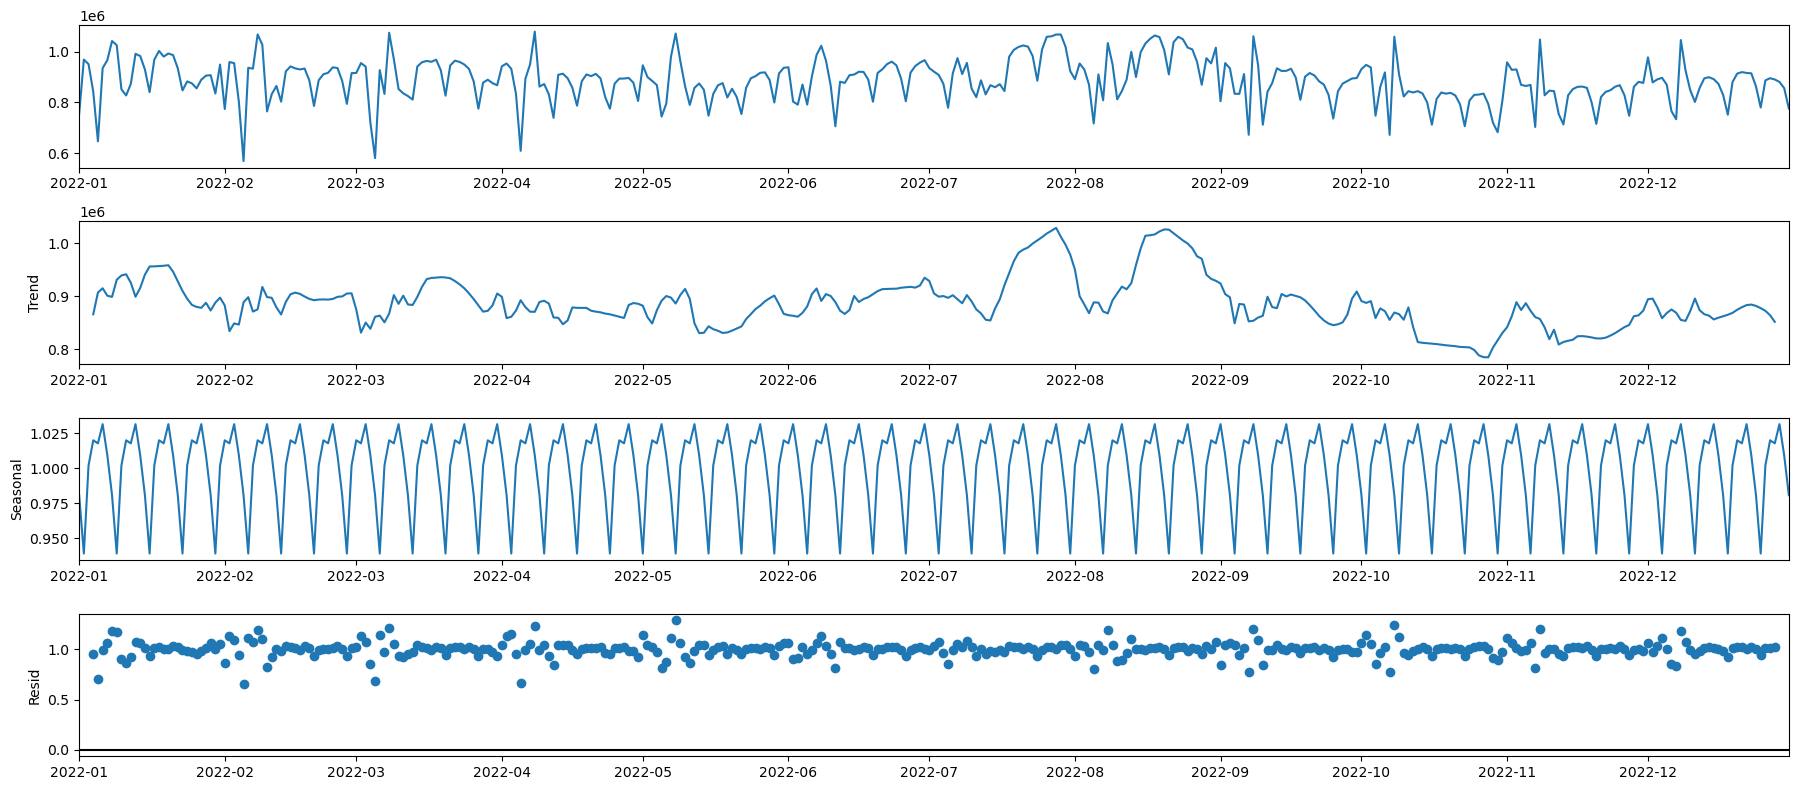

In [26]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_consumption, model='mul')
fig = decomposition.plot()
plt.show()

By visualizing the decomposed components of the original time series we can say that the consumption is unstable, along with its obvious seasonality. The plot clearly indicates that the time series has seasonality pattern.

In [27]:
df_consumption.head()


Consumption (MWh)
Date_Time                    
2022-01-01          754257.04
2022-01-02          968617.19
2022-01-03          950748.60
2022-01-04          842351.60
2022-01-05          646619.46

##### Rolling mean

In [28]:
# Daily Consumption
ma = df_consumption.resample('D').mean()

# 3 Day Example
ma['Moving Average'] = ma["Consumption (MWh)"].rolling(7).mean()
ma.head()

Consumption (MWh)  Moving Average
Date_Time                                    
2022-01-01          754257.04             NaN
2022-01-02          968617.19             NaN
2022-01-03          950748.60             NaN
2022-01-04          842351.60             NaN
2022-01-05          646619.46             NaN

In [29]:
def moving_average(data, window):
    data['Moving Average'] = data['Consumption (MWh)'].rolling(window).mean()
    actual = data['Consumption (MWh)'][-(window+30):]
    ma = data['Moving Average'][-(window+30):]
    plt.figure(figsize=(20,8))
    actual.plot(label='Actual', lw=4)
    ma.plot(label='MA-{}'.format(str(window)), ls='--', lw=2)
    plt.title('{}-Days Moving Average'.format(str(window)), weight='bold', fontsize=25)
    plt.legend()

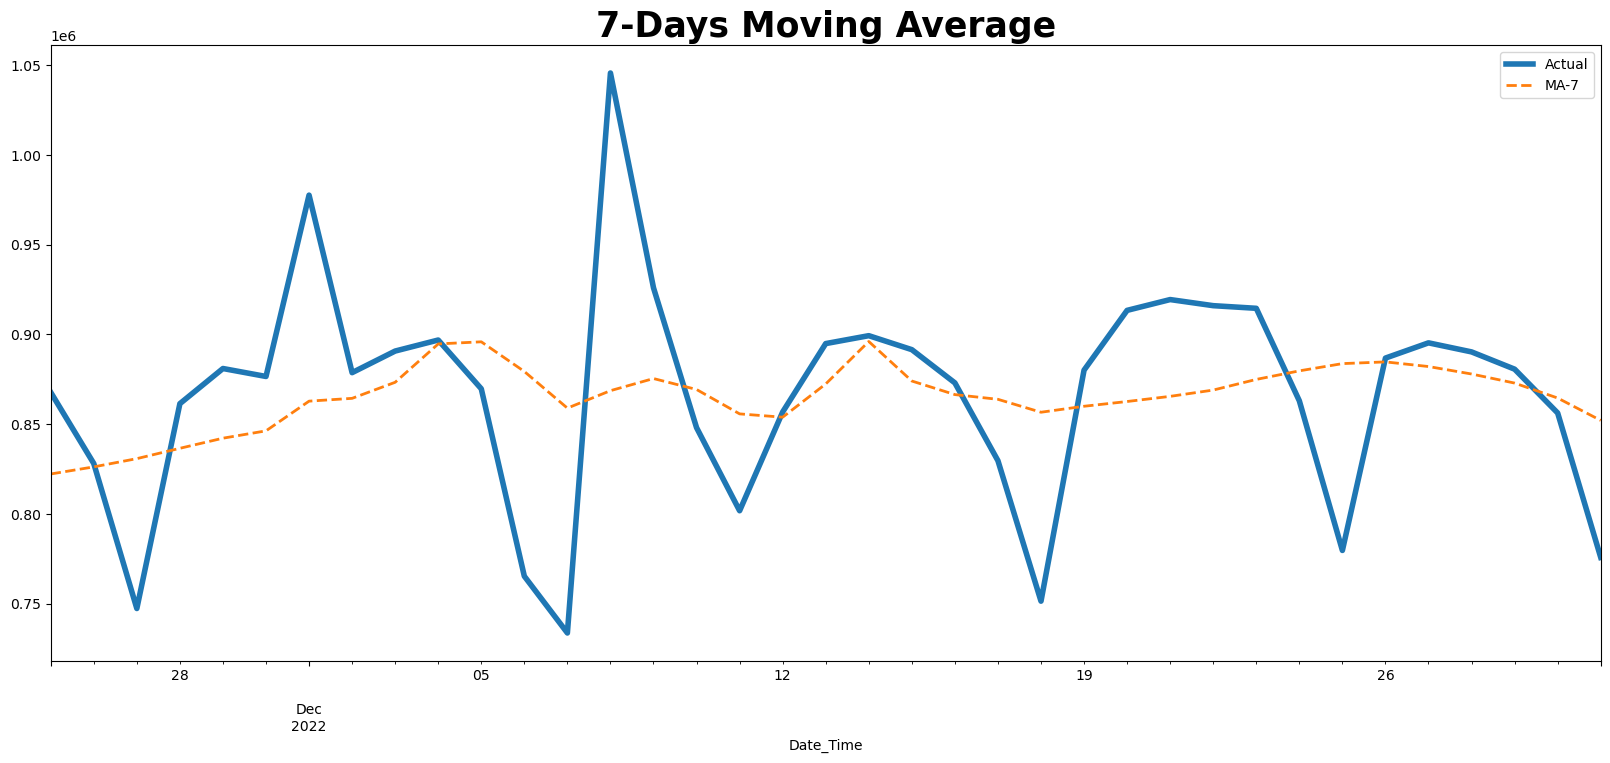

In [30]:
moving_average(ma, 7)

# ACF and PACF

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

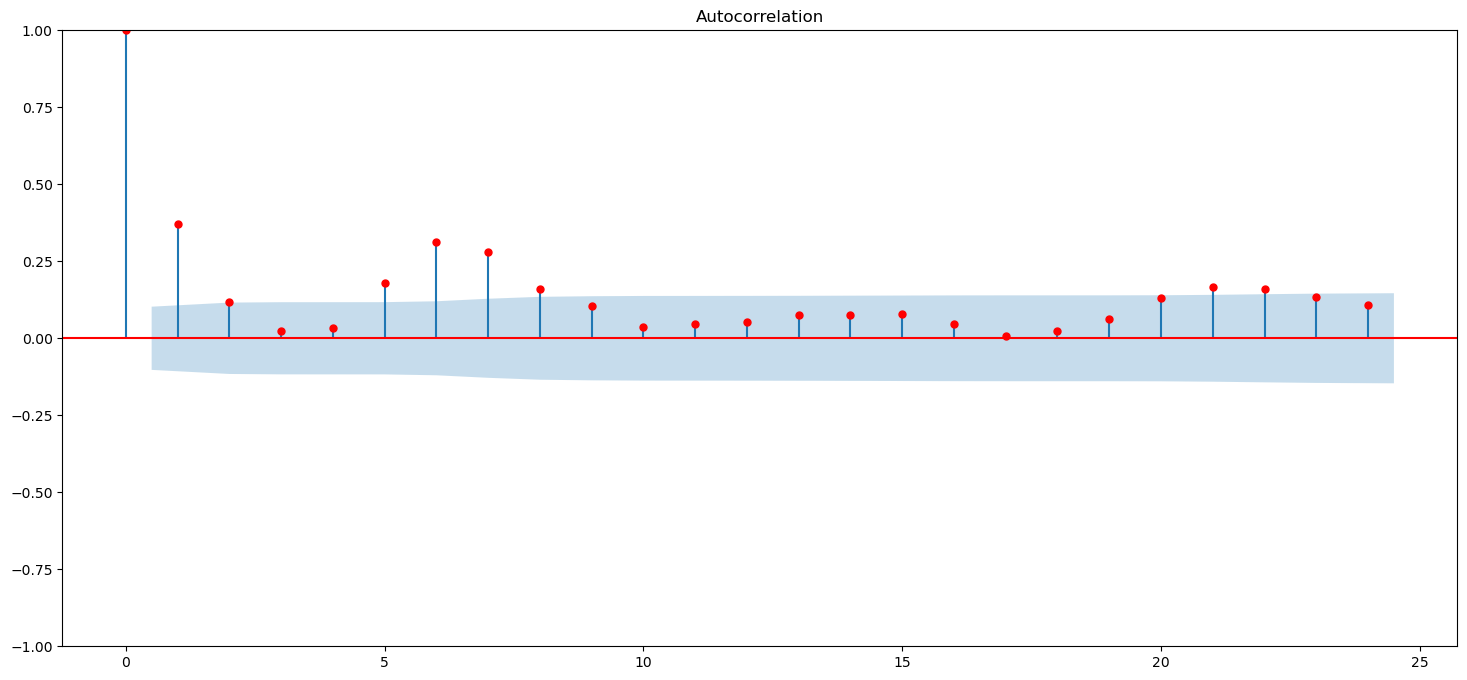

In [32]:
plot_acf(df_consumption, lags= 24, color = 'r')
plt.show()

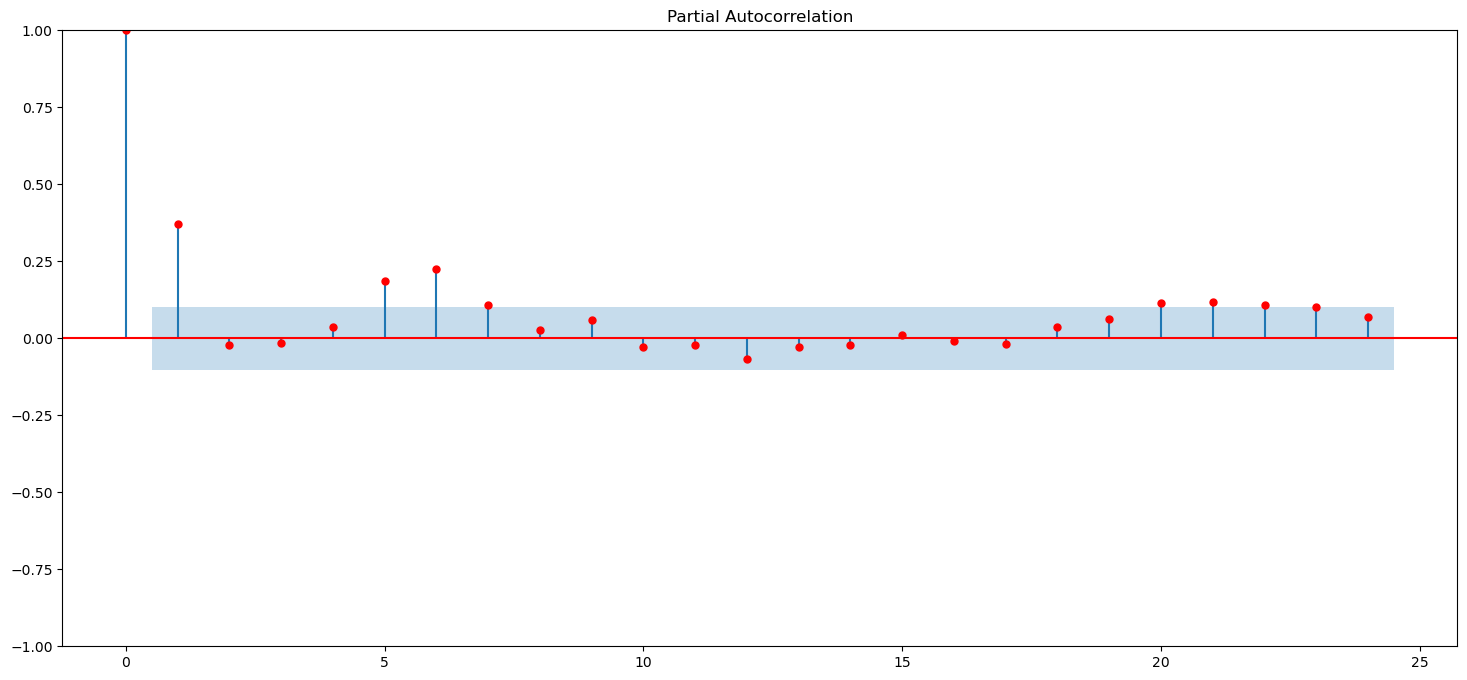

In [33]:
plot_pacf(df_consumption, lags=24, color = 'r')
plt.show()

The above code creates an autocorrelation plot and a partial autocorrelation plot of the consumption column of the DataFrame. The plot_acf() and plot_pacf() functions take the time series data as input and the number of lags to include in the plot.

The autocorrelation plot shows the correlation between the time series and its lagged values. The partial autocorrelation plot shows the partial correlation between the time series and its lagged values, after removing the effect of intermediate lags.

If the autocorrelation plot shows a significant correlation at lag 2 and the partial autocorrelation plot shows a sharp drop at lag 1, it suggests that the time series is stationary. If the autocorrelation plot shows a slow decay and the partial autocorrelation plot shows significant correlations at multiple lags, it suggests that the time series is not stationary and may require differencing.

In [34]:
#p= 1,d=0, q= 2

<AxesSubplot:xlabel='Consumption (MWh)', ylabel='Density'>

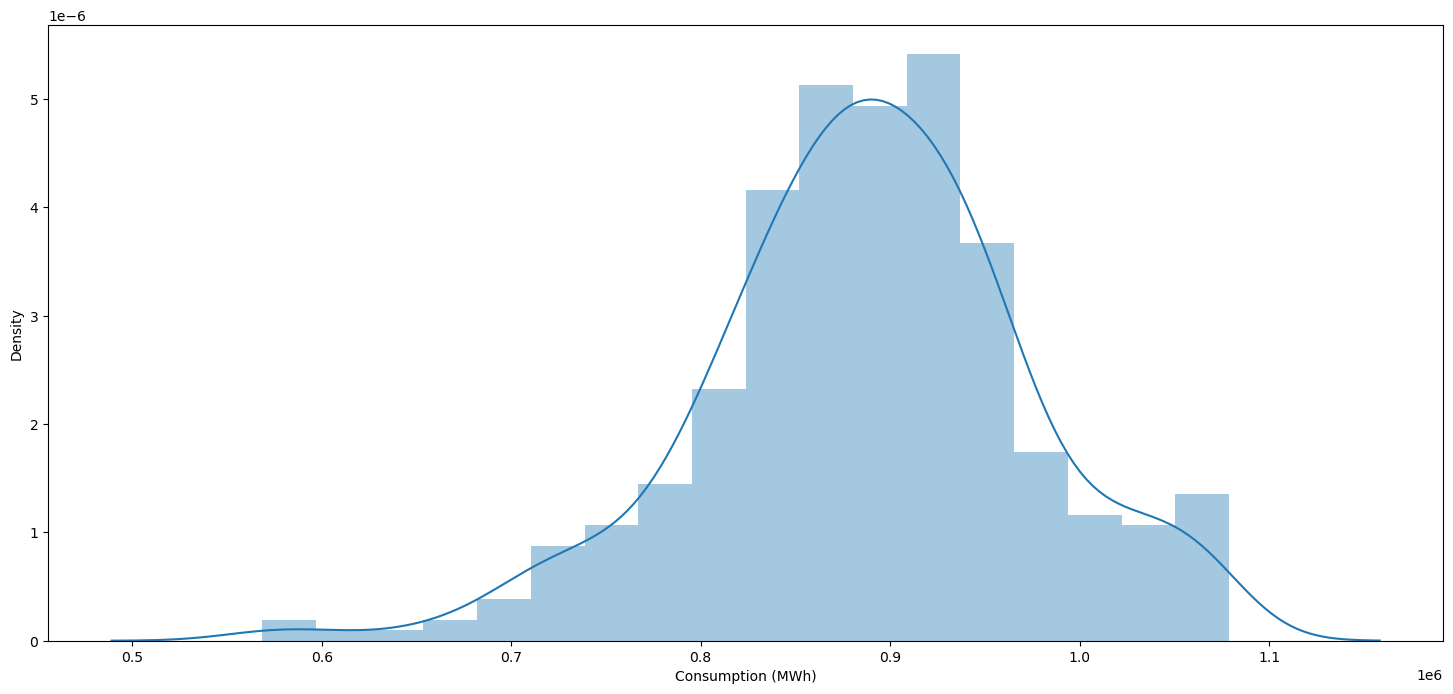

In [35]:
sns.distplot(df_consumption['Consumption (MWh)'])

In [36]:
import scipy.stats as stats

In [37]:
ma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Freq: D
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Consumption (MWh)  365 non-null    float64
 1   Moving Average     359 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [38]:
MA=ma['Moving Average'].dropna()

In [39]:
#df_consumption = np.square(df_consumption)

<AxesSubplot:ylabel='Density'>

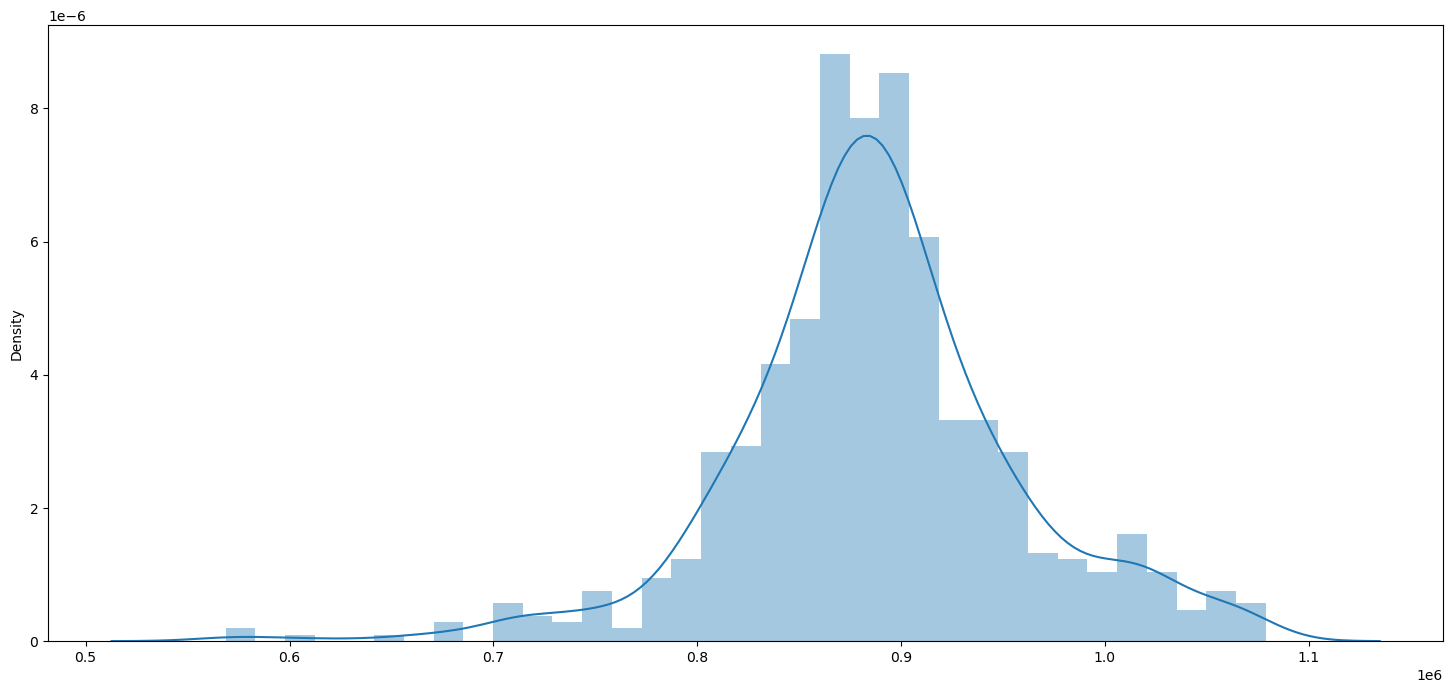

In [40]:
sns.distplot(ma)

In [41]:
#plt.figure(figsize=(20,8))

##ma['Moving Average'].plot(label='Training Set')
#ma['Moving Average'].plot(label='Test Set')
#plt.axvline('2016-01-01', color='black', ls='--', lw=3)
#plt.text('2016-02-01', 3700, 'Split', fontsize=20, fontweight='bold')
#plt.title('Data Splitting', weight='bold', fontsize=25)
#plt.legend()

#### Splitting Training and Test Data Sets

In [42]:
#Splitting Training and Test Data Sets.
testconsumption_A = df_consumption.iloc[-31:]
trainconsumption_A = df_consumption.iloc[:-31] 
print(f"Train Shape: {trainconsumption_A.shape}; Test Shape: {testconsumption_A.shape}")

Train Shape: (334, 1); Test Shape: (31, 1)


In [43]:
## Splitting Training and Test Data Sets.
testconsumption = ma['Moving Average'].iloc[-31:]
trainconsumption = ma['Moving Average'].iloc[:-31] 
print(f"Train Shape: {trainconsumption.shape}; Test Shape: {testconsumption.shape}")

Train Shape: (334,); Test Shape: (31,)


In [220]:
test = acorr_ljungbox(df_consumption, lags=None)
test

lb_stat     lb_pvalue
1    50.756117  1.045861e-12
2    55.951355  7.084639e-13
3    56.174395  3.855928e-12
4    56.572903  1.520607e-11
5    68.440018  2.163302e-13
6   104.782024  2.517278e-20
7   133.805301  1.006621e-25
8   143.463387  4.514291e-27
9   147.668486  2.680689e-27
10  148.193435  8.768941e-27

# ARIMA for Comsumption

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [347]:
model = ARIMA(trainconsumption_A, order=(1,0,2))
model_fit = model.fit()
cons_prediction = model_fit.predict(start=testconsumption_A.index[0], end = testconsumption_A.index[-1])
cons_prediction.head()

2022-12-01    859004.426148
2022-12-02    854698.142920
2022-12-03    855593.005304
2022-12-04    856464.281194
2022-12-05    857312.592276
Freq: D, Name: predicted_mean, dtype: float64

In [348]:
cons_results = model.fit()

In [349]:
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.886e+05   1.66e+04     53.465      0.000    8.56e+05    9.21e+05
ar.L1          0.9736      0.026     37.705      0.000       0.923       1.024
ma.L1         -0.6357      0.049    -13.039      0.000      -0.731      -0.540
ma.L2         -0.2598      0.060     -4.300      0.000      -0.378      -0.141
sigma2      6.339e+09      0.188   3.38e+10      0.000    6.34e+09    6.34e+09


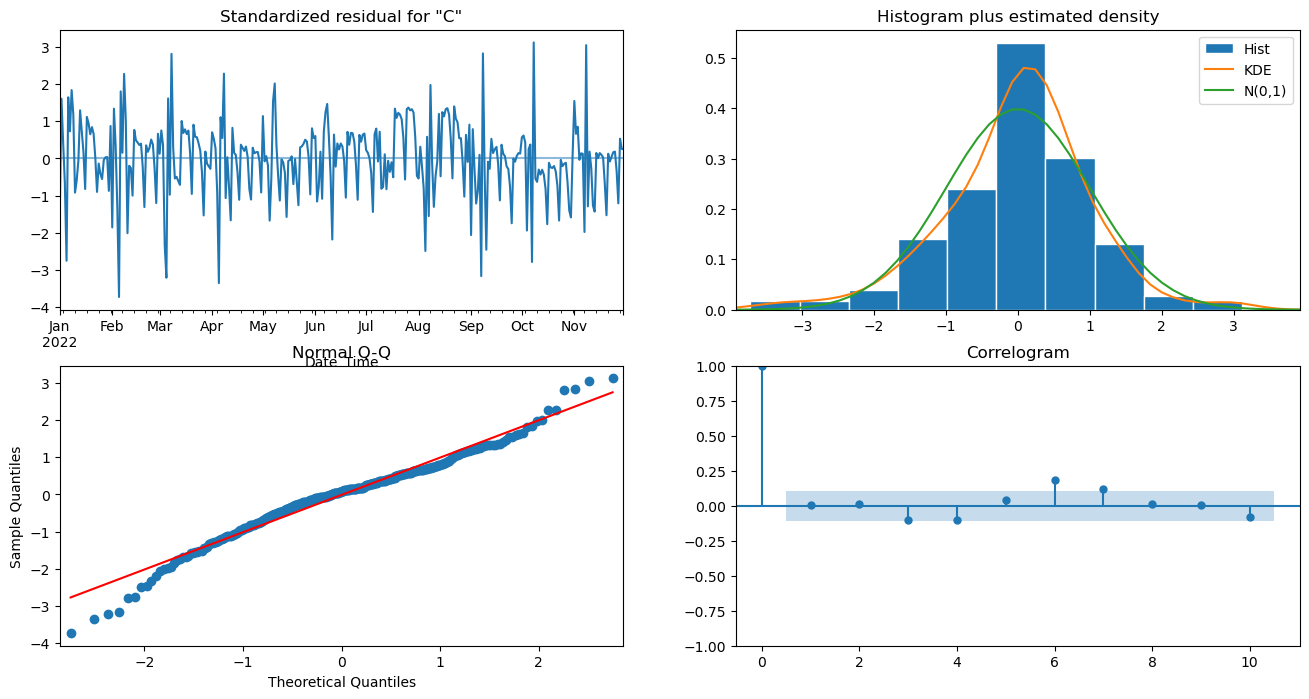

In [350]:
cons_results.plot_diagnostics(figsize=(16, 8))
plt.show()

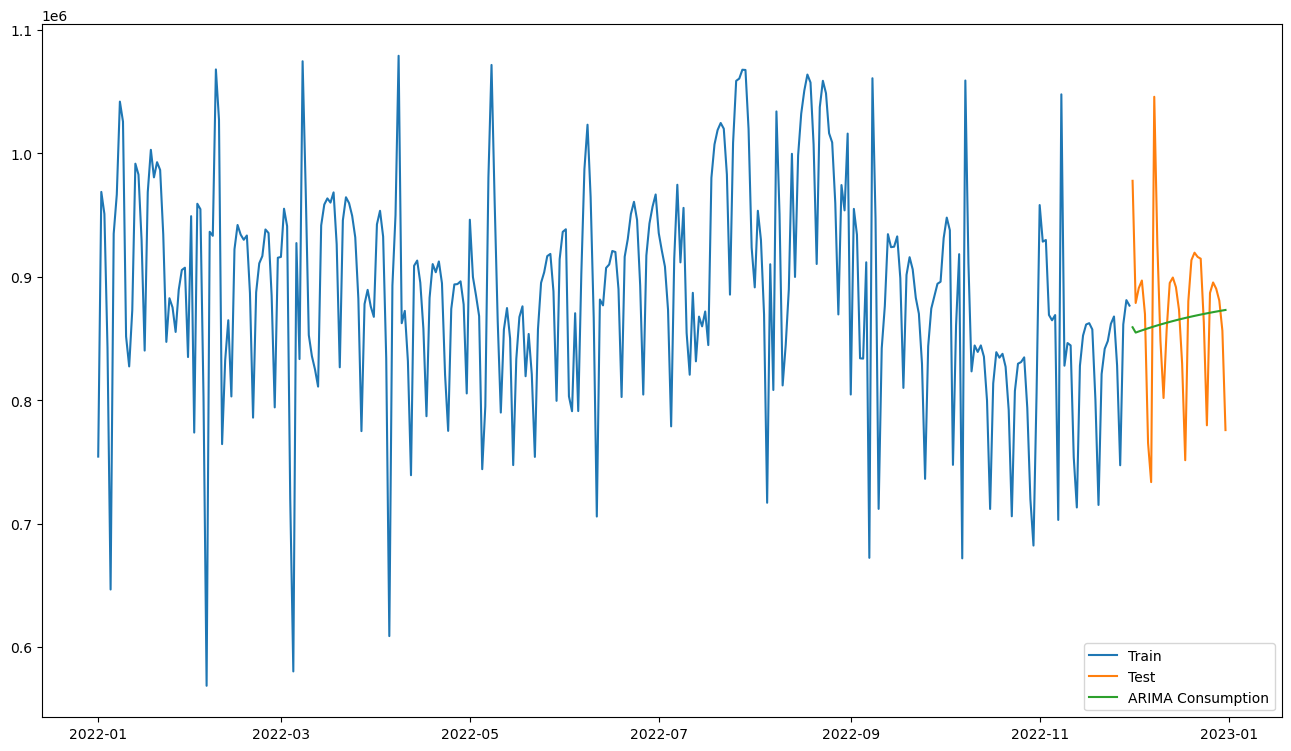

In [351]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainconsumption_A, label='Train')
plt.plot(testconsumption_A, label='Test')
plt.plot(cons_prediction, label='ARIMA Consumption')
plt.legend(loc='best')
plt.show() 

In [352]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [353]:
cons_arima_mse = mean_squared_error(testconsumption_A, cons_prediction)
cons_arima_mae = mean_absolute_error(testconsumption_A, cons_prediction)
cons_arima_r2 = r2_score(testconsumption, cons_prediction)

print(f'MSE: {cons_arima_mse:.2f}')
print(f'MAE: {cons_arima_mae:.2f}')
print(f'R^2: {cons_arima_r2:.2f}')

MSE: 4216372996.07
MAE: 48800.80
R^2: -0.62


In [52]:
#p = d = q = [1,0,2]
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[1], x[0], x[2], 7) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')

#for i in range(len(pdq)):
#    for j in range(len(seasonal_pdq)):
#        print('SARIMAX: {} x {}'.format(pdq[i], seasonal_pdq[j]))


In [53]:
#pdq

In [54]:
#seasonal_pdq

In [55]:
#result_dict = {}
#from pylab import rcParams
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(df_consumption, order=param,
#                        seasonal_order=param_seasonal,
#                        enforce_stationarity=False, 
#                        enforce_invertibility=False)
#            results = mod.fit()
#            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
#            result_dict[round(results.aic,0)] = str(param)+str(param_seasonal)
#        except:
#            continue

In [56]:
#print(sorted(result_dict.keys()))


In [57]:
#result_dict[8720]

# SARIMAX for Consumption

In [58]:
model_S  = sm.tsa.statespace.SARIMAX(ma['Moving Average'],
                                order=(1,0,1),
                                seasonal_order=(3, 0, 4, 7),
                                enforce_invertibility=False)
cons_results_S = model_S.fit()
print(cons_results_S.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.001    931.689      0.000       0.998       1.002
ma.L1          0.3096      0.064      4.861      0.000       0.185       0.434
ar.S.L7        0.0920      0.247      0.372      0.710      -0.393       0.577
ar.S.L14       0.3928      0.253      1.553      0.120      -0.103       0.888
ar.S.L21       0.5141      0.364      1.411      0.158      -0.200       1.228
ma.S.L7       -0.8234      0.241     -3.410      0.001      -1.297      -0.350
ma.S.L14      -0.5035      0.333     -1.510      0.131      -1.157       0.150
ma.S.L21      -0.1711      0.487     -0.351      0.725      -1.126       0.784
ma.S.L28       0.4999      0.266      1.879      0.060      -0.022       1.021
sigma2       2.04e+08   2.25e-09   9.05e+16      0.000    2.04e+08    2.04e+08


In [59]:
cons_results_S.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                               Moving Average   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(3, 0, [1, 2, 3, 4], 7)   Log Likelihood               -3888.380
Date:                                      Mon, 17 Apr 2023   AIC                           7796.760
Time:                                              03:40:57   BIC                           7835.759
Sample:                                          01-01-2022   HQIC                          7812.259
                                               - 12-31-2022                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.001    931.689      0.000       0.998       1.002
ma.L1          0.3096      0.064      4.861      0.000       0.185       0.434
ar.S.L7        0.0920      0.247      0.372      0.710      -0.393       0.577
ar.S.L14       0.3928      0.253      1.553      0.120      -0.103       0.888
ar.S.L21       0.5141      0.364      1.411      0.158      -0.200       1.228
ma.S.L7       -0.8234      0.241     -3.410      0.001      -1.297      -0.350
ma.S.L14      -0.5035      0.333     -1.510      0.131      -1.157       0.150
ma.S.L21      -0.1711      0.487     -0.351      0.725      -1.126       0.784
ma.S.L28       0.4999      0.266      1.879      0.060      -0.022       1.021
sigma2       2.04e+08   2.25e-09   9.05e+16      0.000    2.04e+08    2.04e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                51.52
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.26
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+33. Standard errors may be unstable.
"""

In [60]:
cons_prediction_S = cons_results_S.predict(start=testconsumption.index[0], end =testconsumption.index[-1])
cons_prediction_S.head()

Date_Time
2022-12-01    850618.351532
2022-12-02    866617.608425
2022-12-03    866501.621399
2022-12-04    880588.719781
2022-12-05    896424.199589
Freq: D, Name: predicted_mean, dtype: float64

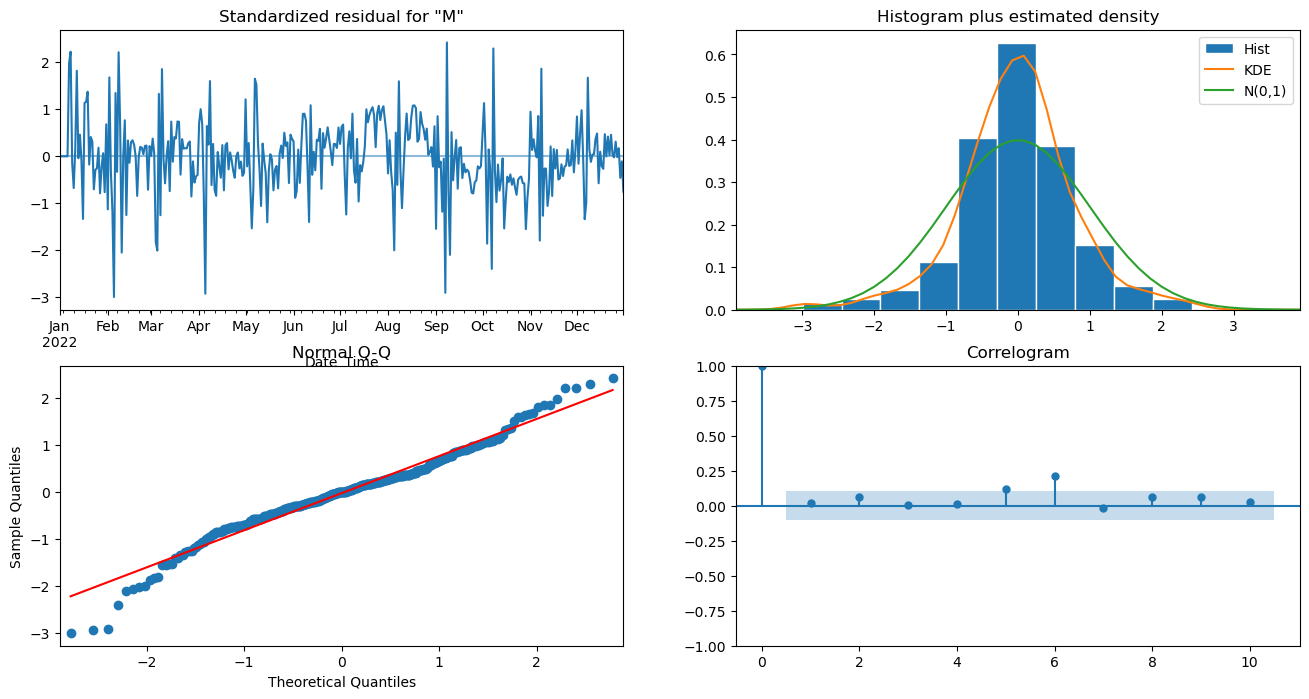

In [61]:
cons_results_S.plot_diagnostics(figsize=(16, 8))
plt.show()

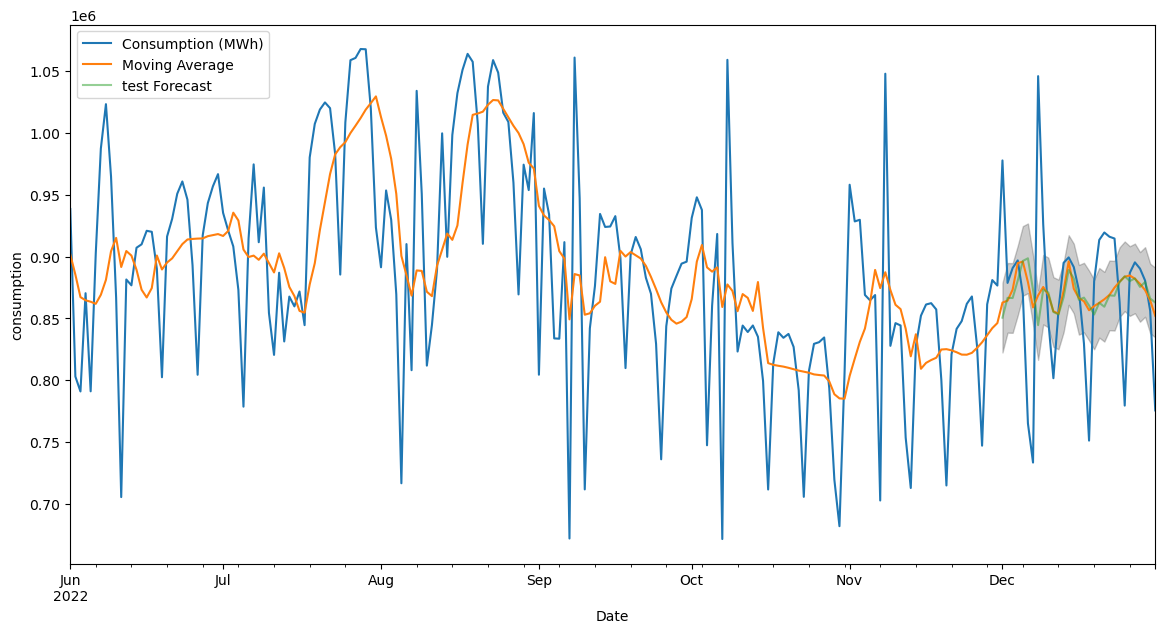

In [62]:
#set forecasts to start at 2022-12-01 to the end of the data to forecast
pred = cons_results_S.get_prediction(start=pd.to_datetime('2022-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ma['2022-06':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='test Forecast', alpha=.5, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('consumption')
plt.legend()
plt.show()

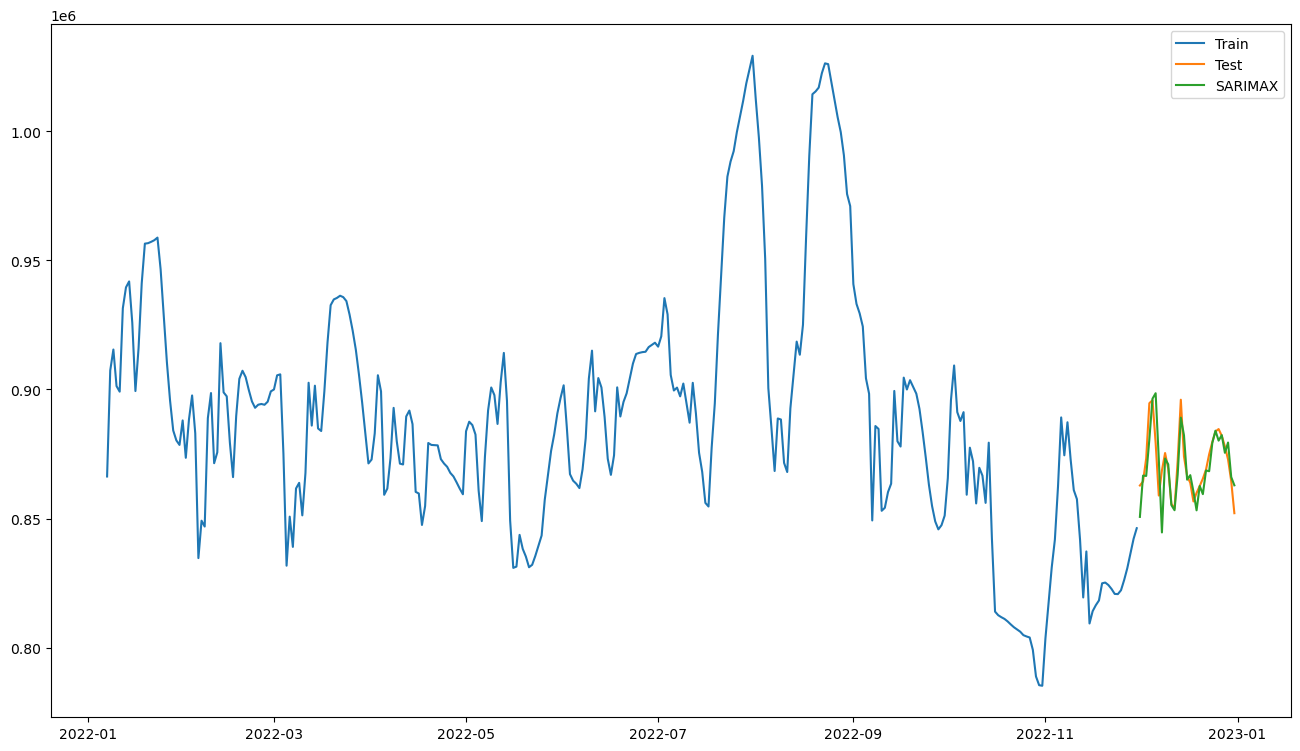

In [63]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainconsumption, label='Train')
plt.plot(testconsumption, label='Test')
plt.plot(cons_prediction_S, label='SARIMAX')
plt.legend(loc='best')
plt.show() 

In [64]:
cons_SRIMAX_mse = mean_squared_error(testconsumption, cons_prediction_S)
cons_SRIMAX_mae = mean_absolute_error(testconsumption, cons_prediction_S)
cons_SRIMAX_r2 = r2_score(testconsumption, cons_prediction_S)

print(f'MSE: {cons_SRIMAX_mse:.2f}')
print(f'MAE: {cons_SRIMAX_mae:.2f}')
print(f'R^2: {cons_SRIMAX_r2:.2f}')

MSE: 65783918.48
MAE: 5600.22
R^2: 0.52


In [65]:
testconsumption.head()

Date_Time
2022-12-01    862784.862857
2022-12-02    864347.961429
2022-12-03    873301.292857
2022-12-04    894675.045714
2022-12-05    895857.925714
Freq: D, Name: Moving Average, dtype: float64

In [66]:
cons_prediction_S.head()

Date_Time
2022-12-01    850618.351532
2022-12-02    866617.608425
2022-12-03    866501.621399
2022-12-04    880588.719781
2022-12-05    896424.199589
Freq: D, Name: predicted_mean, dtype: float64

In [67]:
cons_rmse= sqrt(cons_SRIMAX_mse)
cons_rmse

8110.728603462846

In [68]:
cons_forecast_S = cons_results_S.predict(start='2023-01-01', end='2023-01-31')

In [357]:
cons_forecast_S.head(10)

2023-01-01    849878.575069
2023-01-02    845715.796332
2023-01-03    843521.570308
2023-01-04    840061.155305
2023-01-05    844131.702632
2023-01-06    846354.763910
2023-01-07    853666.110305
2023-01-08    855022.305855
2023-01-09    853967.845173
2023-01-10    855929.562466
Freq: D, Name: predicted_mean, dtype: float64

#### SARIMAX Forcast

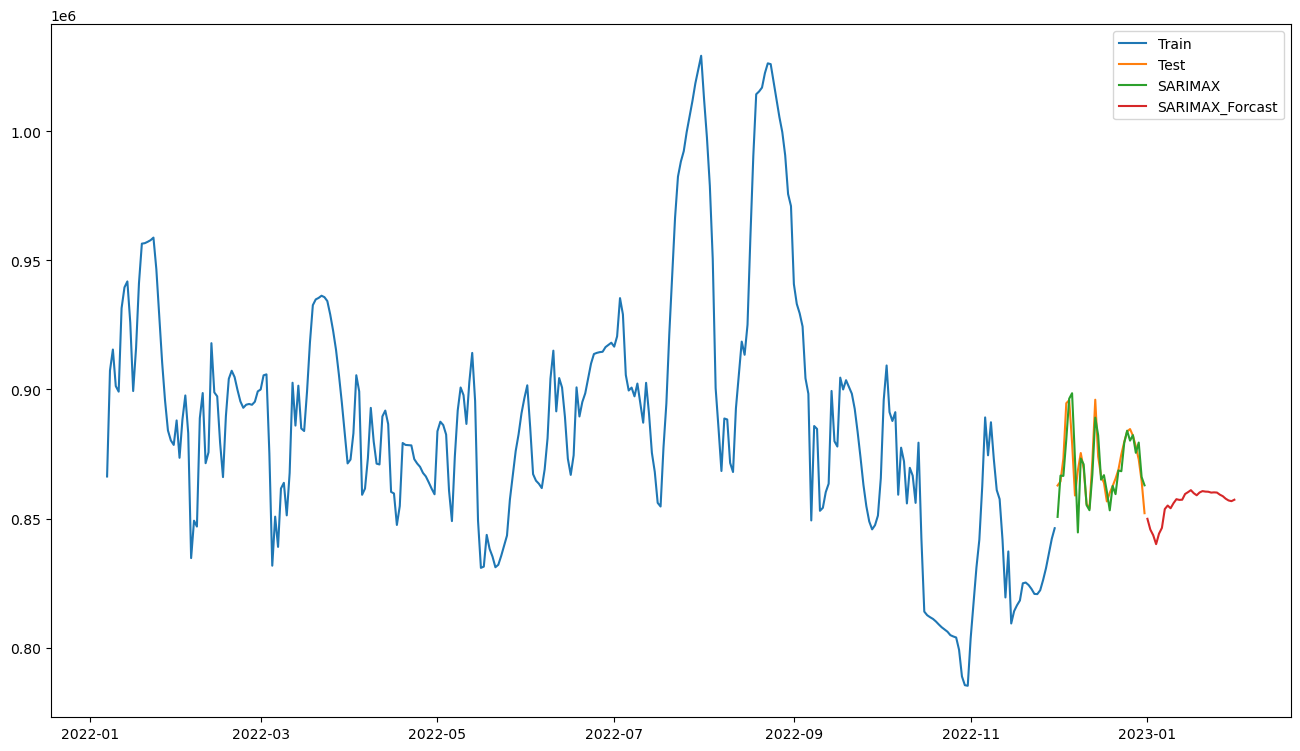

In [70]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainconsumption, label='Train')
plt.plot(testconsumption, label='Test')
plt.plot(cons_prediction_S, label='SARIMAX')
plt.plot(cons_forecast_S, label='SARIMAX_Forcast')
plt.legend(loc='best')
plt.show() 

# AUTO ARIMAX for Consumption

In [72]:
pip install pmdarima

     ------------------------------------ 572.7/572.7 kB 838.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [73]:
from pmdarima import auto_arima

In [74]:
df_consumption_aa = auto_arima(MA)

In [75]:
df_consumption_aa

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [76]:
df_consumption_aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  359
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -3927.959
Date:                Mon, 17 Apr 2023   AIC                           7867.918
Time:                        03:42:02   BIC                           7891.201
Sample:                    01-07-2022   HQIC                          7877.178
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6014      0.016     36.798      0.000       0.569       0.633
ar.L2         -0.9673      0.017    -56.898      0.000      -1.001      -0.934
ma.L1         -0.5428      0.024    -22.819      0.000      -0.589      -0.496
ma.L2          0.9416      0.018     51.594      0.000       0.906       0.977
ma.L3          0.0412      0.019      2.164      0.031       0.004       0.079
sigma2      1.847e+08   7.38e-12    2.5e+19      0.000    1.85e+08    1.85e+08
===================================================================================
Ljung-Box (L1) (Q):                   5.85   Jarque-Bera (JB):                21.16
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.22
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.24e+35. Standard errors may be unstable.
"""

In [77]:
#model values - Fitted values
df_consumption_aa_v = pd.DataFrame(df_consumption_aa.predict_in_sample(),index=MA.index)

In [78]:
df_consumption_aa_v.head()

predicted_mean
Date_Time                 
2022-01-07        0.000000
2022-01-08   917843.222819
2022-01-09   911590.742885
2022-01-10   903937.981487
2022-01-11   889560.127470

In [79]:
#residual/Errors
df_consumption_res = pd.DataFrame(df_consumption_aa.resid(), index = MA.index)

In [80]:
df_consumption_res.head()

0
Date_Time                
2022-01-07  866278.277143
2022-01-08  -10494.771391
2022-01-09    3888.444258
2022-01-10   -2631.661487
2022-01-11    9593.491102

Text(0.5, 1.0, 'Line plot of residual: ARIMA')

<Figure size 1000x700 with 0 Axes>

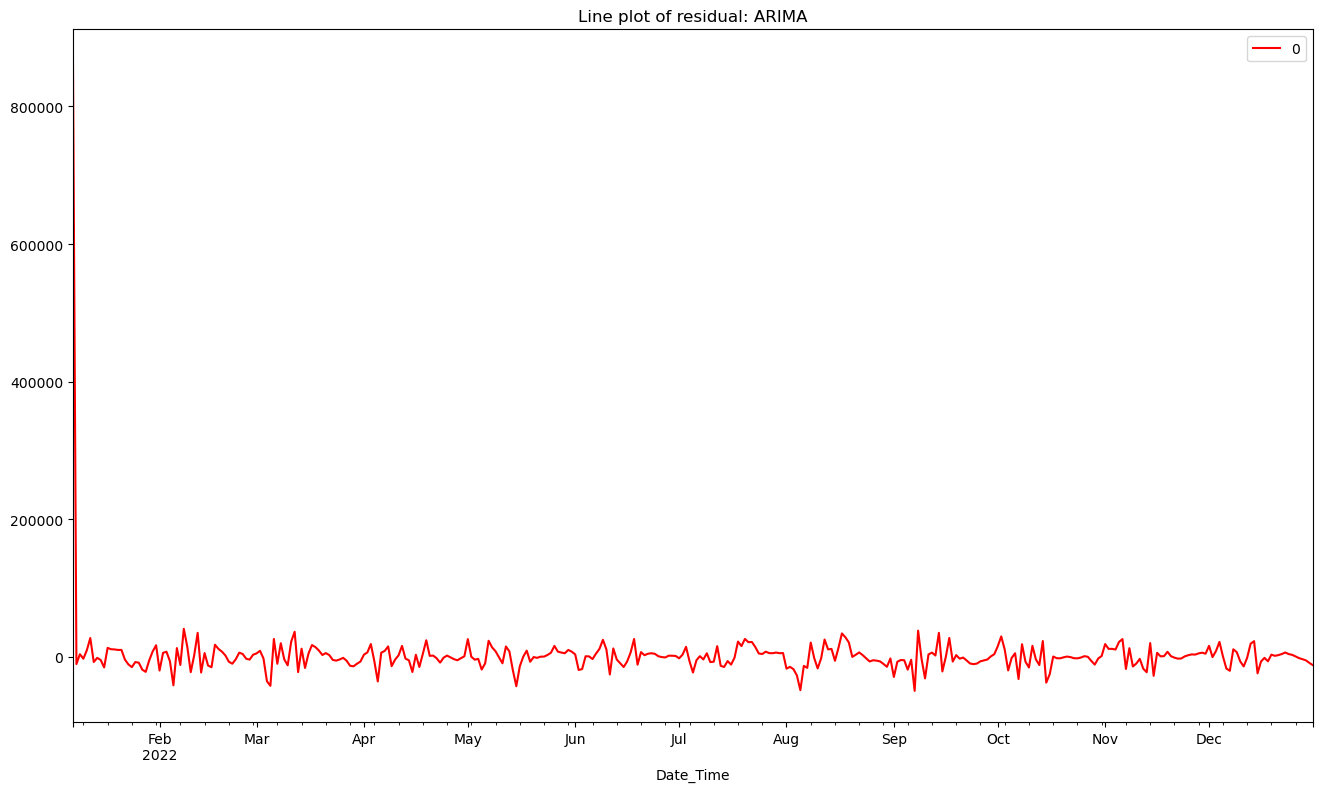

In [81]:
#Lineplot
plt.figure(figsize=(10,7))
df_consumption_res.plot(color = 'r')
plt.title('Line plot of residual: ARIMA')

Text(0.5, 1.0, 'Density plot of residual: ARIMA')

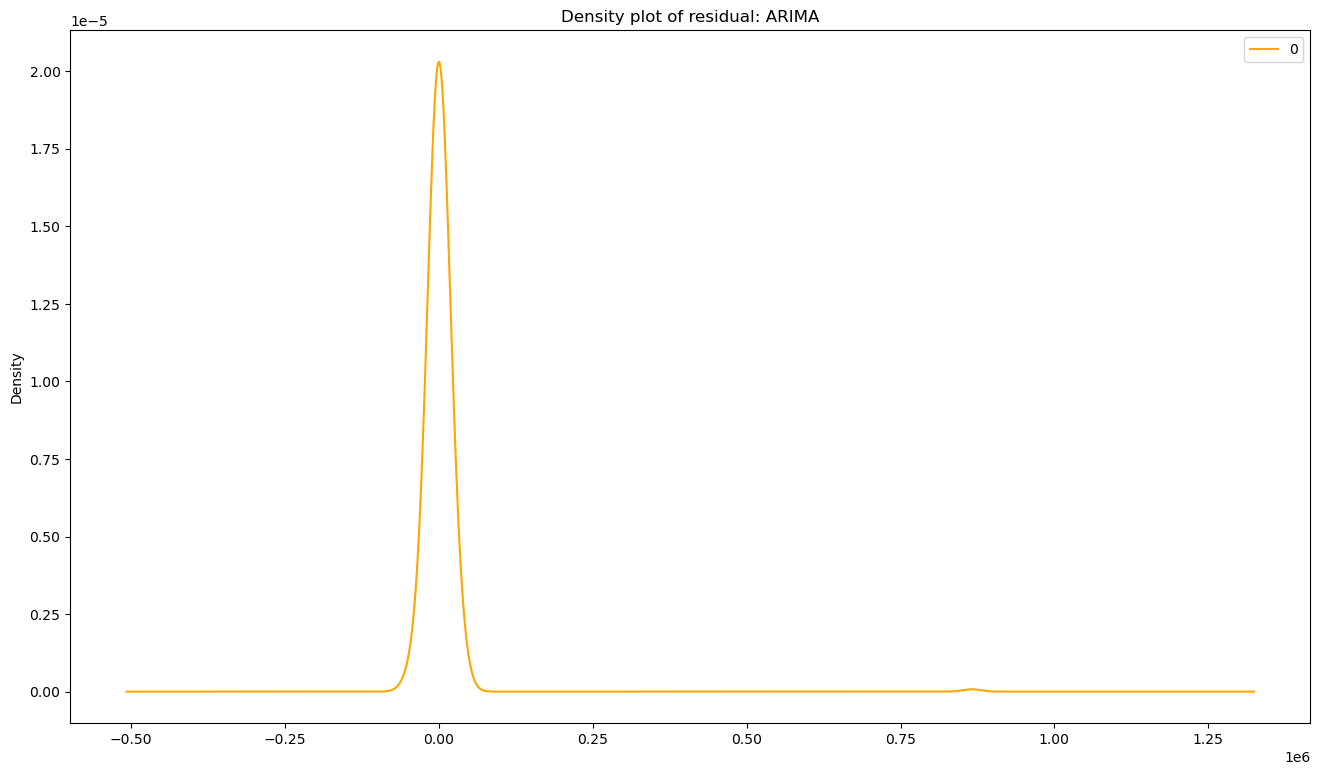

In [82]:
#density plot
df_consumption_res.plot(kind = 'kde', color = 'orange')
plt.title('Density plot of residual: ARIMA')

In [83]:
#squaring residual/error
df_consumption_se = pow(df_consumption_res,2)
df_consumption_se.head()

0
Date_Time               
2022-01-07  7.504381e+11
2022-01-08  1.101402e+08
2022-01-09  1.512000e+07
2022-01-10  6.925642e+06
2022-01-11  9.203507e+07

In [84]:
#average/mean of squared residual /errors
df_consumption_mse = (df_consumption_se.sum())/len(df_consumption_se)
print(df_consumption_mse)

0    2.287771e+09
dtype: float64


In [85]:
df_consumption_rmse = sqrt(df_consumption_mse)
df_consumption_rmse

47830.65322507894

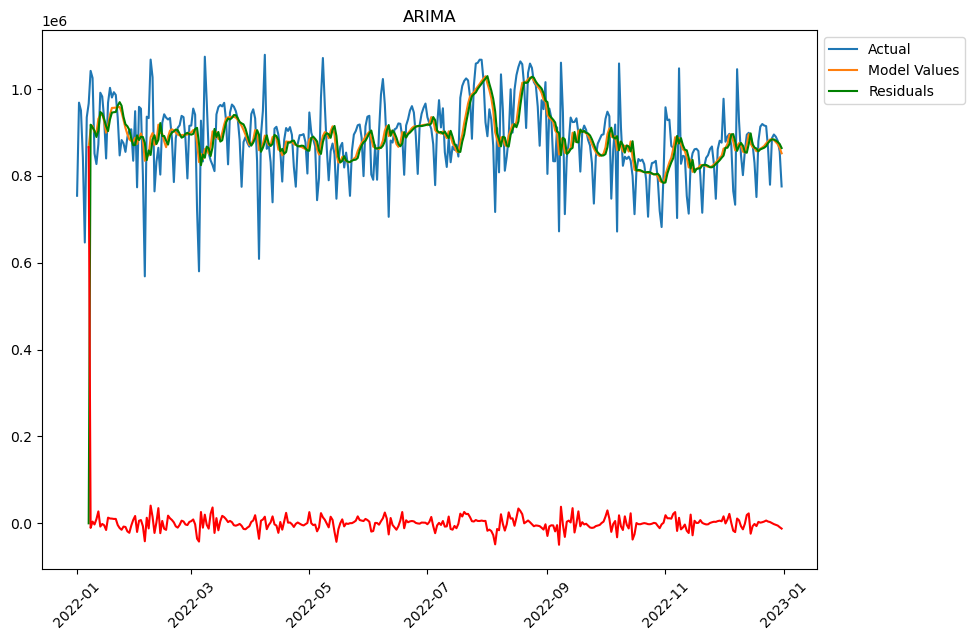

In [86]:
#plot comparision actual, model values & residual 
plt.figure(figsize=(10,7))
plt.plot(ma)
plt.plot(df_consumption_aa_v, 'g')
plt.plot(df_consumption_res, 'r')
plt.legend(['Actual', 'Model Values', 'Residuals'],
          bbox_to_anchor = (1, 1), loc= 2)
plt.xticks(rotation = 45)
plt.title("ARIMA")
plt.show()

In [87]:
#forcast
df_consumption_pred = df_consumption_aa.predict(n_periods =31)
df_consumption_pred = pd.DataFrame(df_consumption_pred,
                             index=pd.date_range(start='2023-01-01',
                                                 end='2023-01-31', freq='D'))

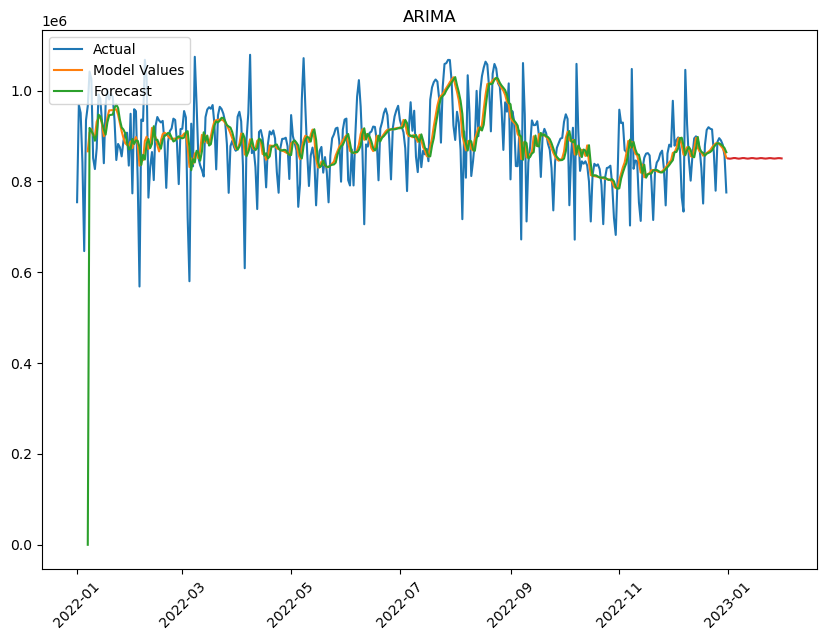

In [88]:
plt.figure(figsize=(10,7))
plt.plot(ma)
plt.plot(df_consumption_aa_v)
plt.plot(df_consumption_pred)
plt.legend(['Actual', 'Model Values', 'Forecast'], loc=2)
plt.xticks(rotation =45)
plt.title('ARIMA')
plt.show()

# ExponentialSmoothing for Consumption

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [90]:
df_consumption_es = ExponentialSmoothing(df_consumption, seasonal_periods=7,
                                  trend= 'add', seasonal= 'mul').fit()


In [91]:
df_consumption_es.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:        Consumption (MWh)   No. Observations:                  365
Model:             ExponentialSmoothing   SSE                  2533605455563.885
Optimized:                         True   AIC                           8293.180
Trend:                         Additive   BIC                           8336.079
Seasonal:                Multiplicative   AICC                          8294.217
Seasonal Periods:                     7   Date:                 Mon, 17 Apr 2023
Box-Cox:                          False   Time:                         03:42:03
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1464286                alpha                 True
smoothing_trend               0.0133117                 beta                 True
smoothing_seasonal            0.0984890                gamma                 True
initial_level                8.8921e+05                  l.0                 True
initial_trend                 4283.8335                  b.0                 True
initial_seasons.0             1.0538178                  s.0                 True
initial_seasons.1             0.9678654                  s.1                 True
initial_seasons.2             0.9958891                  s.2                 True
initial_seasons.3             0.9582708                  s.3                 True
initial_seasons.4             0.9178192                  s.4                 True
initial_seasons.5             1.0487002                  s.5                 True
initial_seasons.6             1.0576374                  s.6                 True
---------------------------------------------------------------------------------
"""

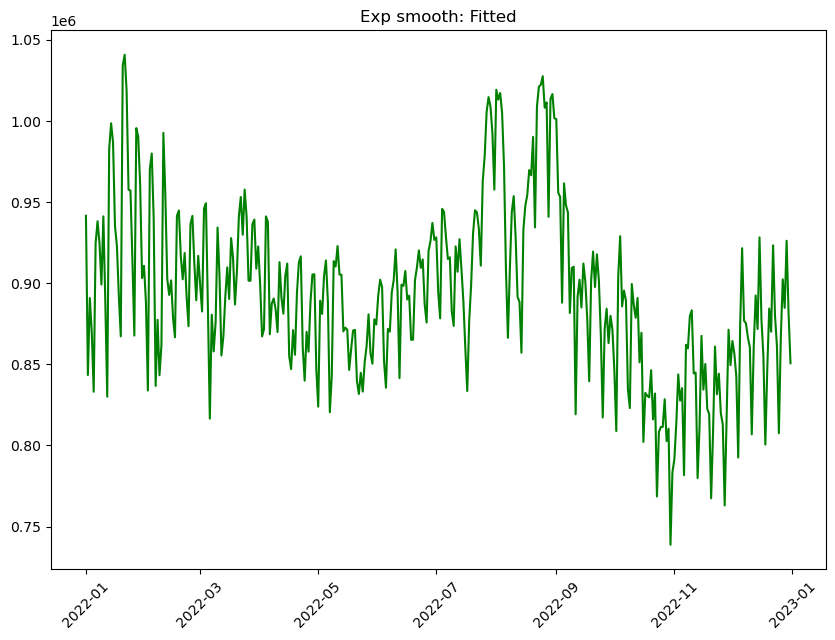

In [92]:
plt.figure(figsize=(10,7))
plt.plot(df_consumption_es.fittedvalues, 'g')
plt.xticks(rotation=45)
plt.title('Exp smooth: Fitted')
plt.show()

In [93]:
#residuals
df_consumption_res1 = pd.DataFrame(df_consumption_es.resid)
df_consumption_res1.head()

0
Date_Time                
2022-01-01 -187327.699404
2022-01-02  125212.790522
2022-01-03   59886.332818
2022-01-04  -27424.431409
2022-01-05 -186496.065054

Text(0.5, 1.0, 'Line plot of residuals: ES')

<Figure size 1000x700 with 0 Axes>

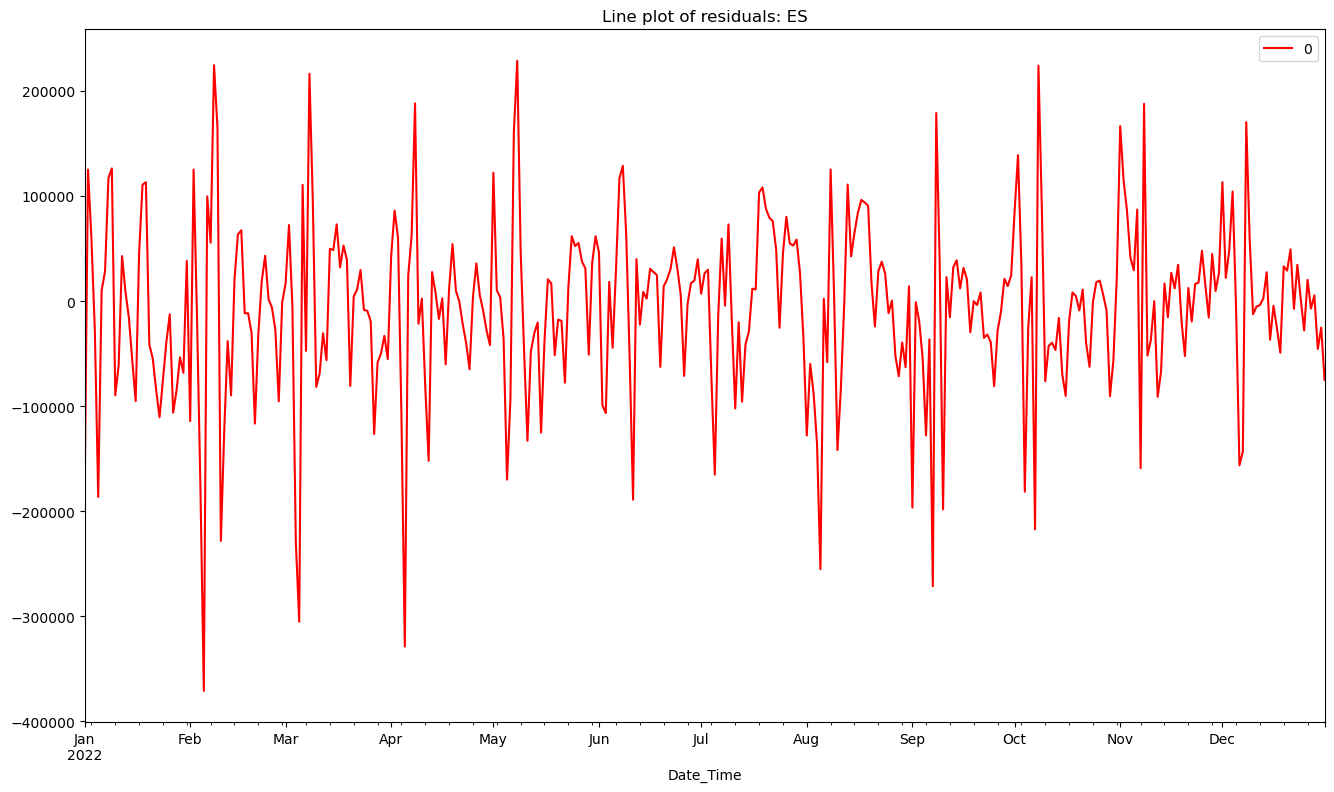

In [94]:
#lineplot residul
plt.figure(figsize=(10,7))
df_consumption_res1.plot(color = 'r')
plt.title('Line plot of residuals: ES')

Text(0.5, 1.0, 'Histogram of residual: ES')

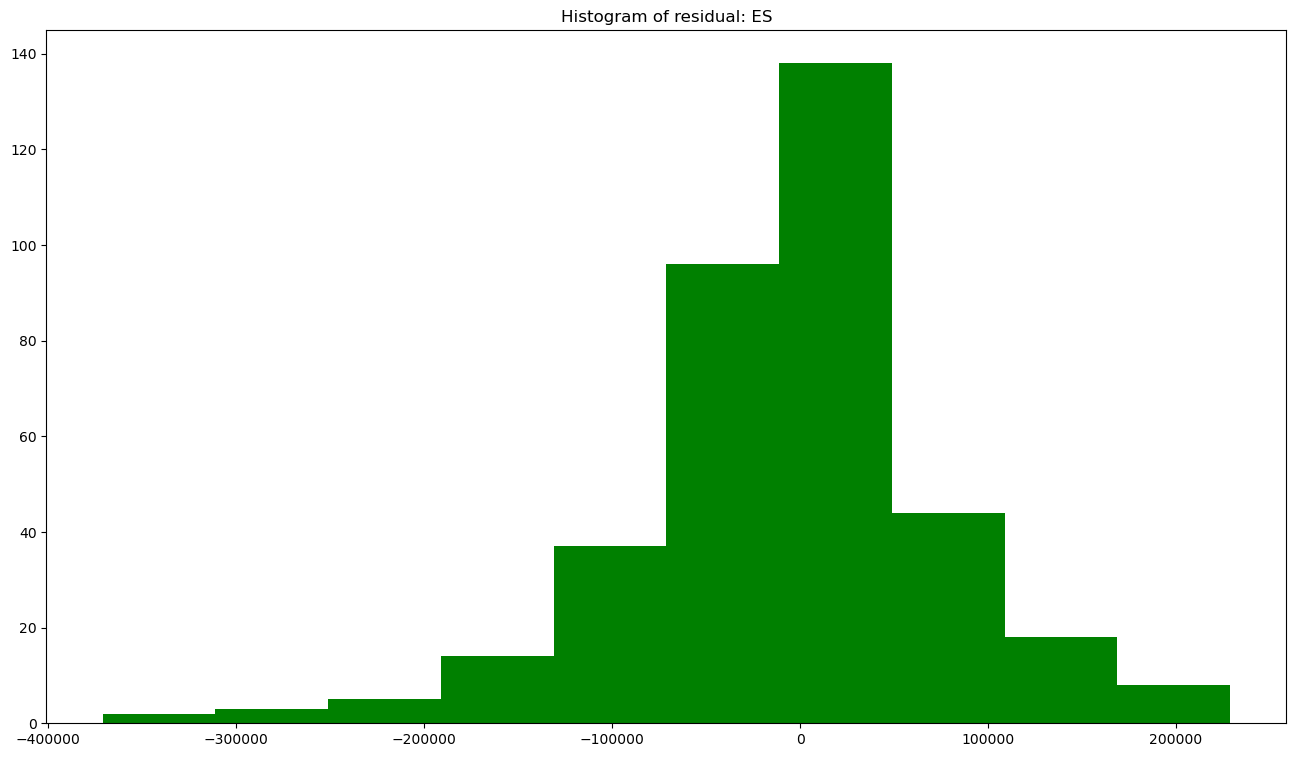

In [95]:
#histogram of residual
plt.hist(df_consumption_res1, color = 'g')
plt.title('Histogram of residual: ES')

Text(0.5, 1.0, 'Density plot of residual: ES')

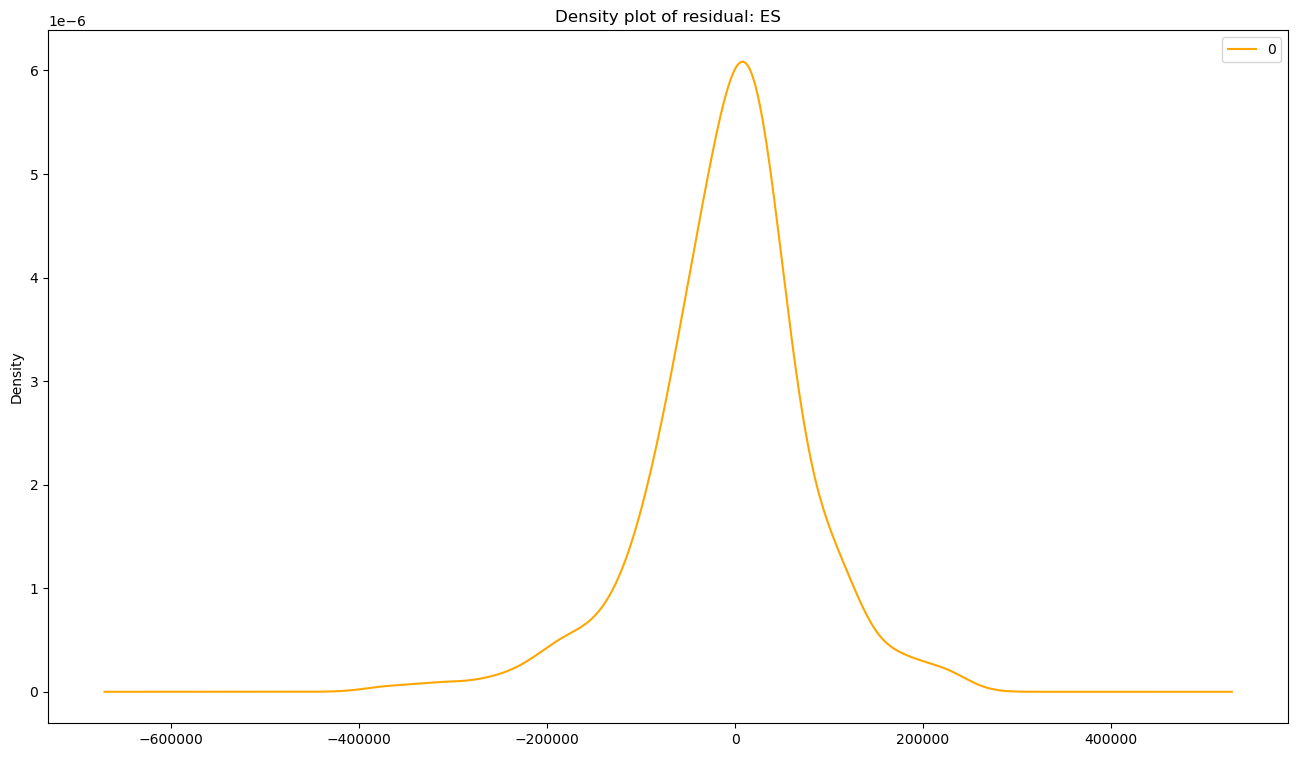

In [96]:
#density plot
df_consumption_res1.plot(kind = 'kde', color = 'orange')
plt.title('Density plot of residual: ES')

In [97]:
#squaring residual/error
df_consumption_se1 = pow(df_consumption_res1,2)
df_consumption_se1.head()

0
Date_Time               
2022-01-01  3.509167e+10
2022-01-02  1.567824e+10
2022-01-03  3.586373e+09
2022-01-04  7.520994e+08
2022-01-05  3.478078e+10

In [98]:
#average/mean of squared residual /errors
df_consumption_mse1 = (df_consumption_se1.sum())/len(df_consumption_se1)
print(df_consumption_mse1)

0    6.941385e+09
dtype: float64


In [99]:
#rmse
df_consumption_rmse1 = sqrt(df_consumption_mse1)
df_consumption_rmse1

83314.97350275081

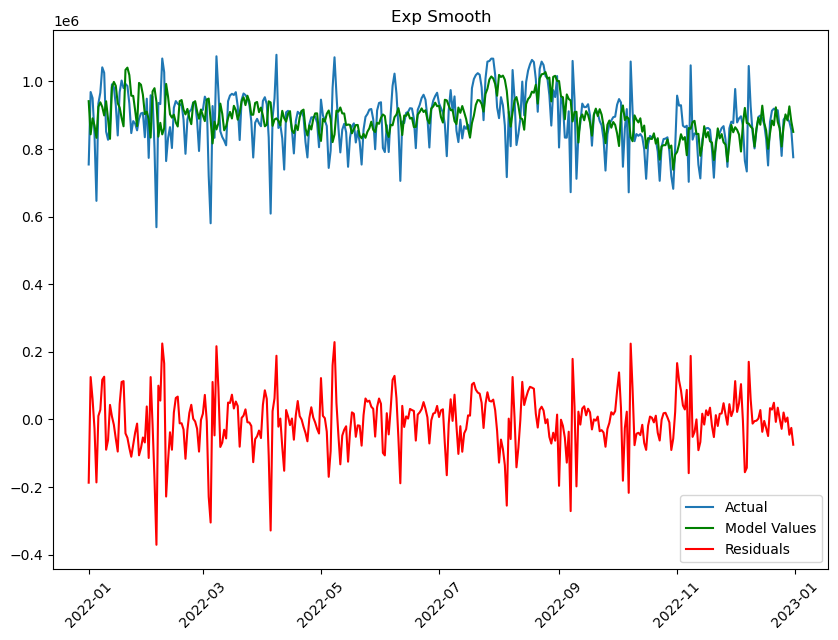

In [100]:
#plot actual, model values and residual
plt.figure(figsize=(10,7))
plt.plot(df_consumption)
plt.plot(df_consumption_es.fittedvalues, 'g')
plt.plot(df_consumption_res1, 'r')
plt.legend(['Actual', 'Model Values', 'Residuals'])
plt.xticks(rotation = 45)
plt.title("Exp Smooth")
plt.show()

In [101]:
#forecast
df_consumption_fore = df_consumption_es.forecast(31)
df_consumption_fore.head()

2023-01-01    784132.524584
2023-01-02    850320.392008
2023-01-03    879479.090832
2023-01-04    864232.410651
2023-01-05    898627.344542
Freq: D, dtype: float64

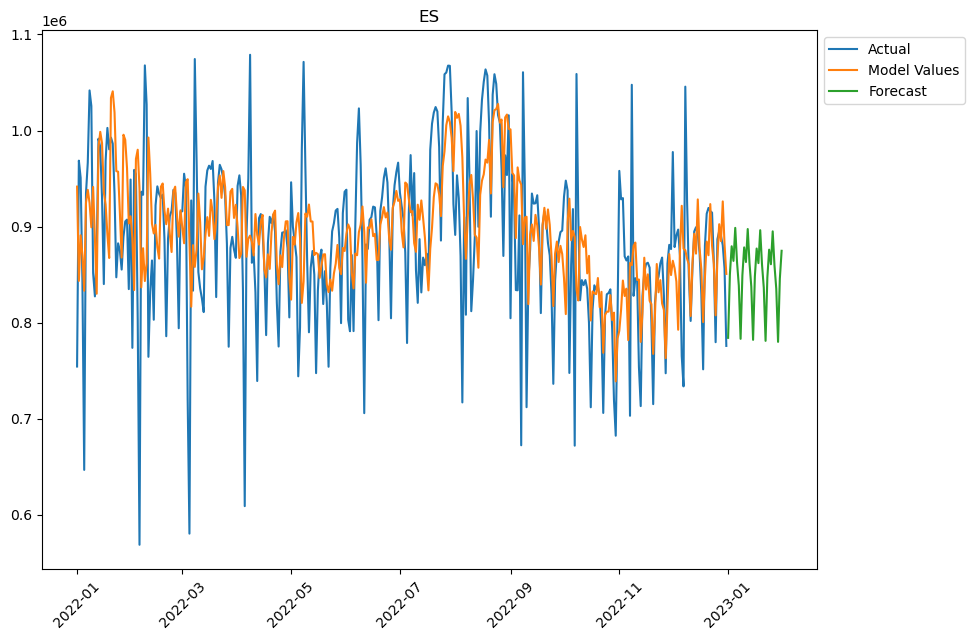

In [102]:
#plot actual, model values & forecast
plt.figure(figsize=(10,7))
plt.plot(df_consumption)
plt.plot(df_consumption_es.fittedvalues)
plt.plot(df_consumption_fore)
plt.legend(['Actual', 'Model Values', 'Forecast'], bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation =45)
plt.title('ES')
plt.show()

## Visualization of Four model for consumption

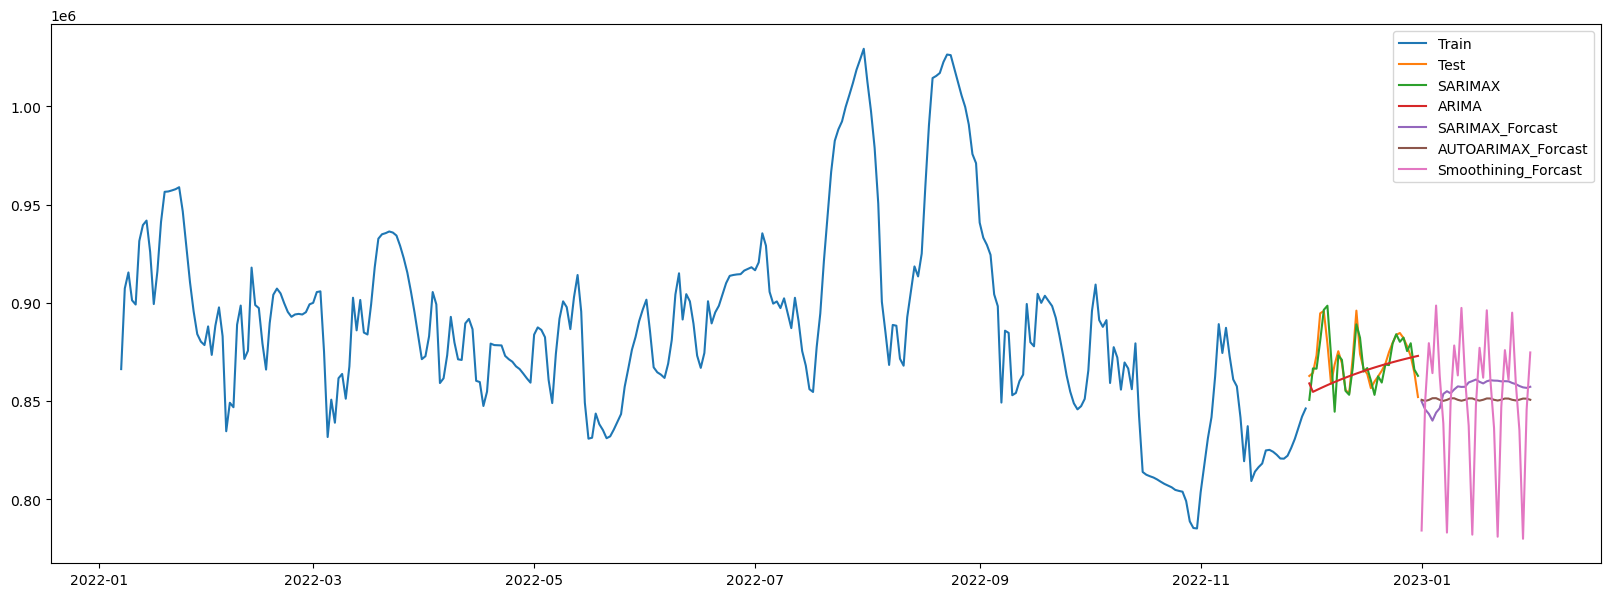

In [354]:
plt.rcParams["figure.figsize"] = [20,7]
plt.plot(trainconsumption, label='Train')
plt.plot(testconsumption, label='Test')
plt.plot(cons_prediction_S, label='SARIMAX')
plt.plot(cons_prediction, label='ARIMA')
plt.plot(cons_forecast_S, label='SARIMAX_Forcast')
plt.plot(df_consumption_pred, label='AUTOARIMAX_Forcast')
plt.plot(df_consumption_fore, label='Smoothining_Forcast')

plt.legend(loc='best')
plt.show() 

# Total Generation (MWh)

In [104]:
df_generation = pd.DataFrame(df1["Total (MWh)"].resample('D').sum())

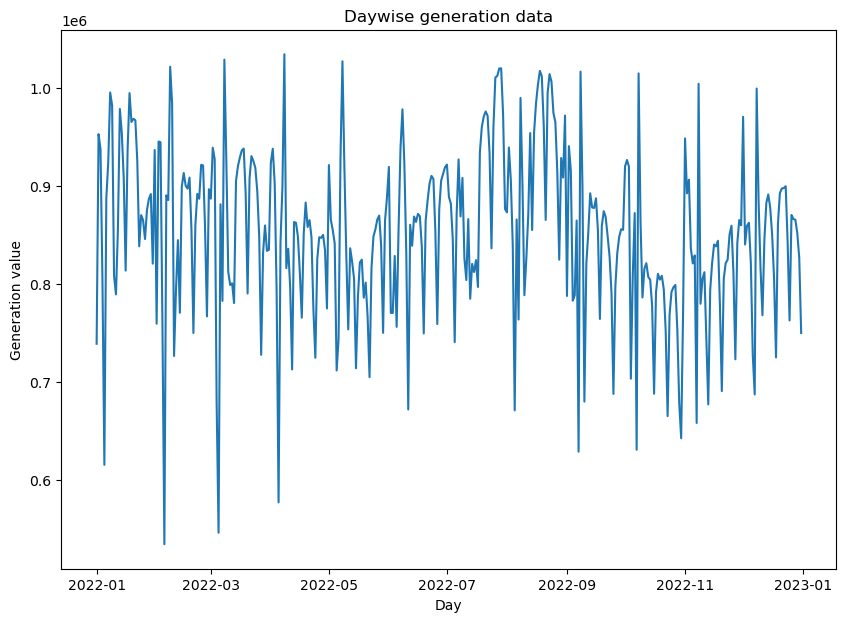

In [105]:
plt.figure(figsize=(10,7))
plt.plot(df_generation)
plt.title('Daywise generation data')
plt.xlabel('Day')
plt.ylabel('Generation value')
plt.show()

The plot clearly indicates that the time series has seasonality pattern.The electricity generation are always some fluxuation. There is always a trend.

# Checking Stationarity
ADF Test

In [106]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(df_generation, autolag = 'AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('# of Lags : %d' % result[2])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.143981
p-value: 0.000819
# of Lags : 6
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


The p-value is 0.000819, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.

# Decomposing

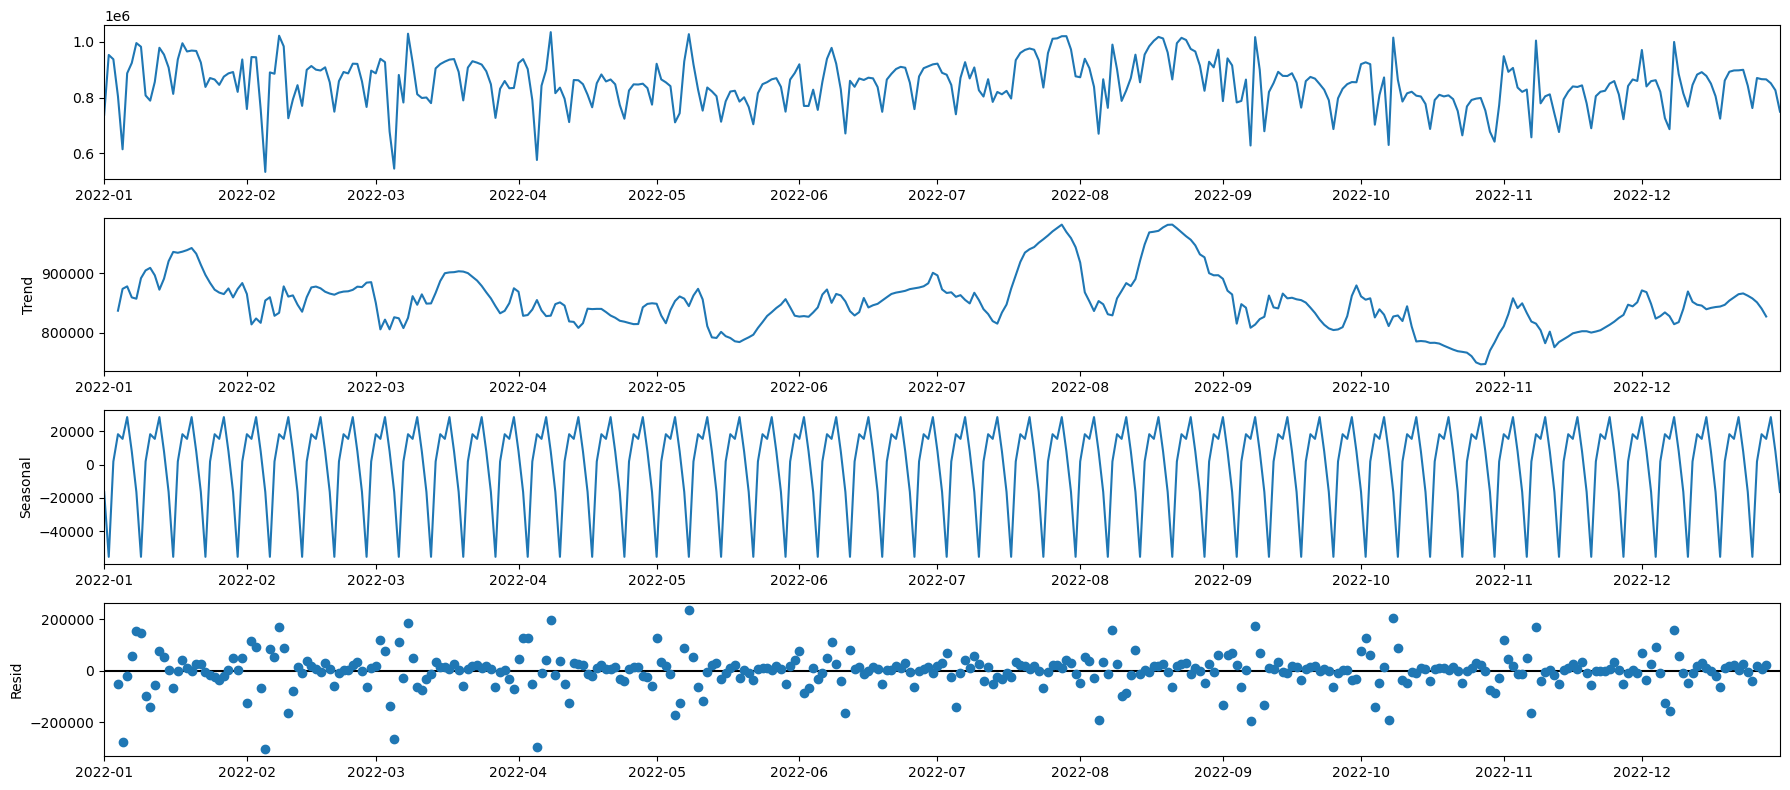

In [107]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_generation, model='additive')
fig = decomposition.plot()
plt.show()

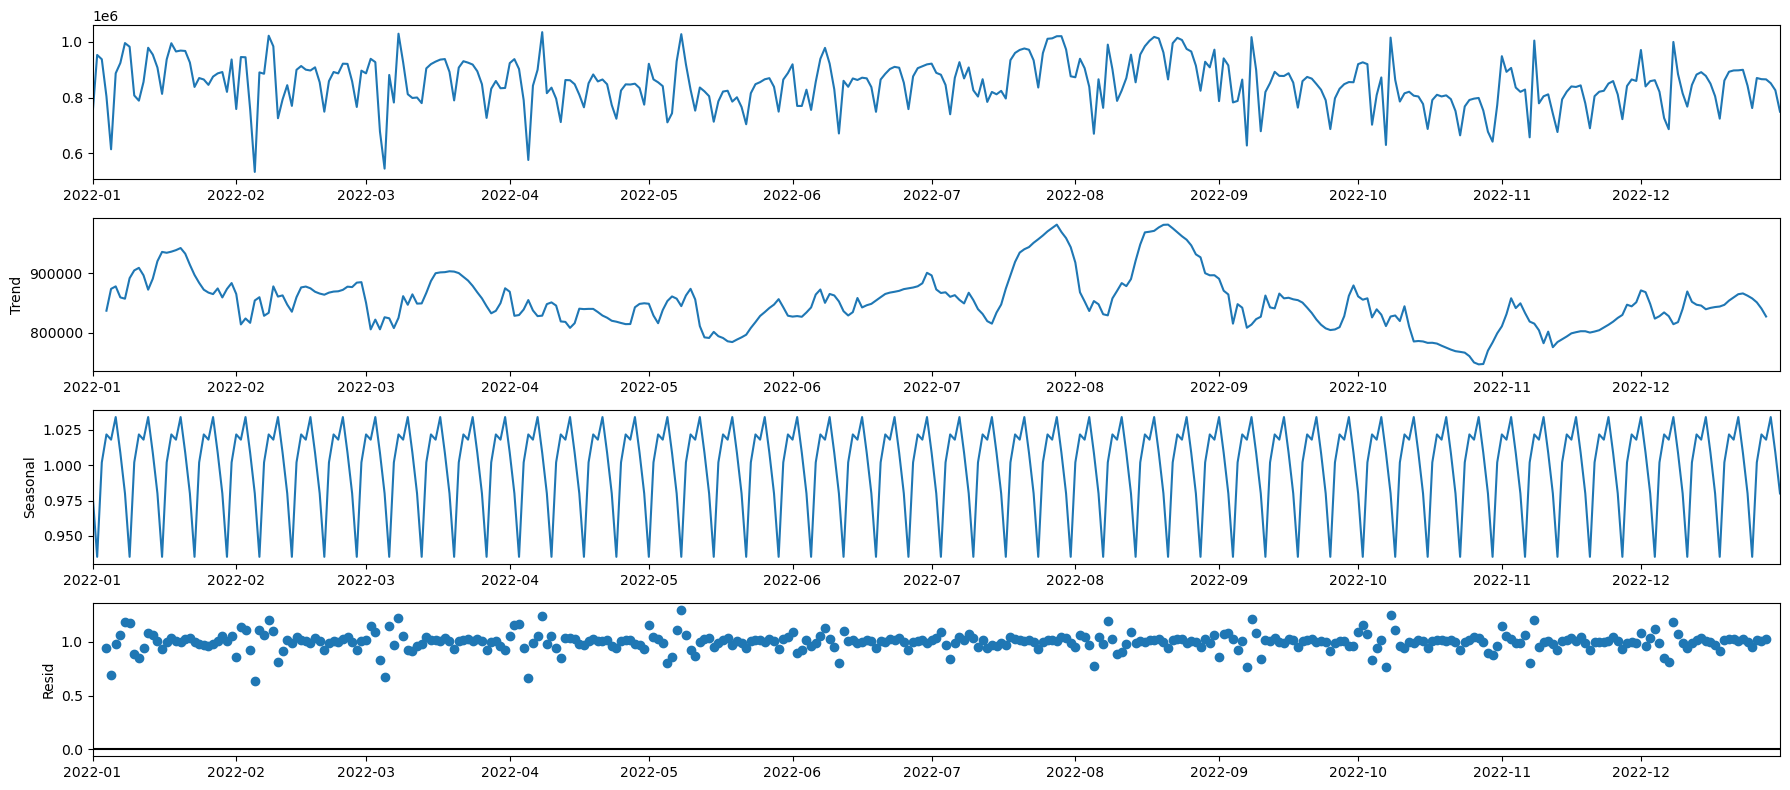

In [108]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_generation, model='mul')
fig = decomposition.plot()
plt.show()

By visualizing the decomposed components of the original time series we can say that the total generation is unstable, along with its obvious seasonality. The plot clearly indicates that the time series has seasonality pattern.

In [109]:
df_generation.head()

Total (MWh)
Date_Time              
2022-01-01    738799.18
2022-01-02    953102.24
2022-01-03    937661.58
2022-01-04    804784.84
2022-01-05    615018.22

In [110]:
# Daily Consumption
ma = df_generation.resample('D').mean()

# 3 Day Example
ma['Moving Average'] = ma["Total (MWh)"].rolling(7).mean()
ma.head()

Total (MWh)  Moving Average
Date_Time                              
2022-01-01    738799.18             NaN
2022-01-02    953102.24             NaN
2022-01-03    937661.58             NaN
2022-01-04    804784.84             NaN
2022-01-05    615018.22             NaN

In [111]:
def moving_average(data, window):
    data['Moving Average'] = data['Total (MWh)'].rolling(window).mean()
    actual = data['Total (MWh)'][-(window+30):]
    ma = data['Moving Average'][-(window+30):]
    plt.figure(figsize=(20,8))
    actual.plot(label='Actual', lw=4)
    ma.plot(label='MA-{}'.format(str(window)), ls='--', lw=2)
    plt.title('{}-Days Moving Average'.format(str(window)), weight='bold', fontsize=25)
    plt.legend()

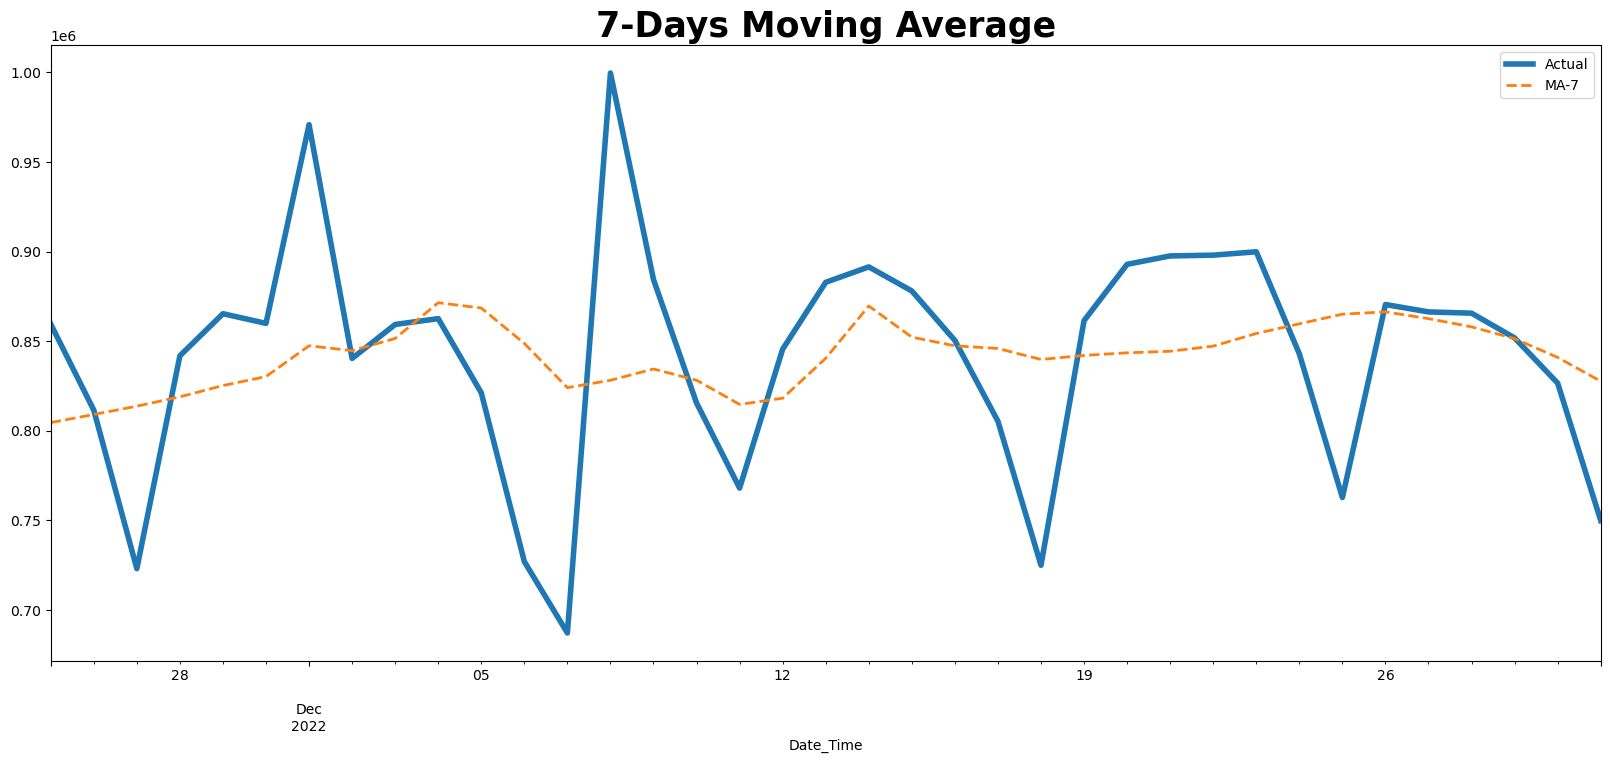

In [112]:
moving_average(ma, 7)

# ACF and PACF

In [113]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

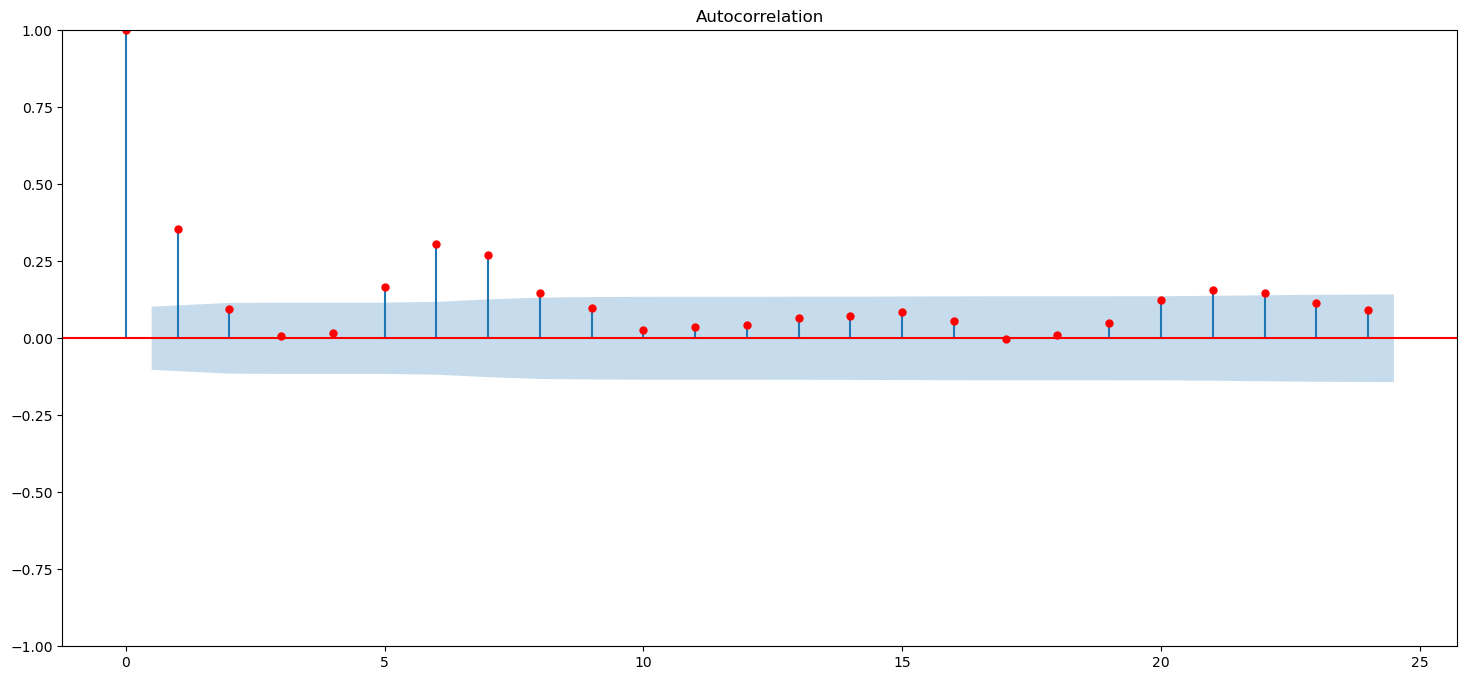

In [114]:
plot_acf(df_generation, lags= 24, color = 'r')
plt.show()

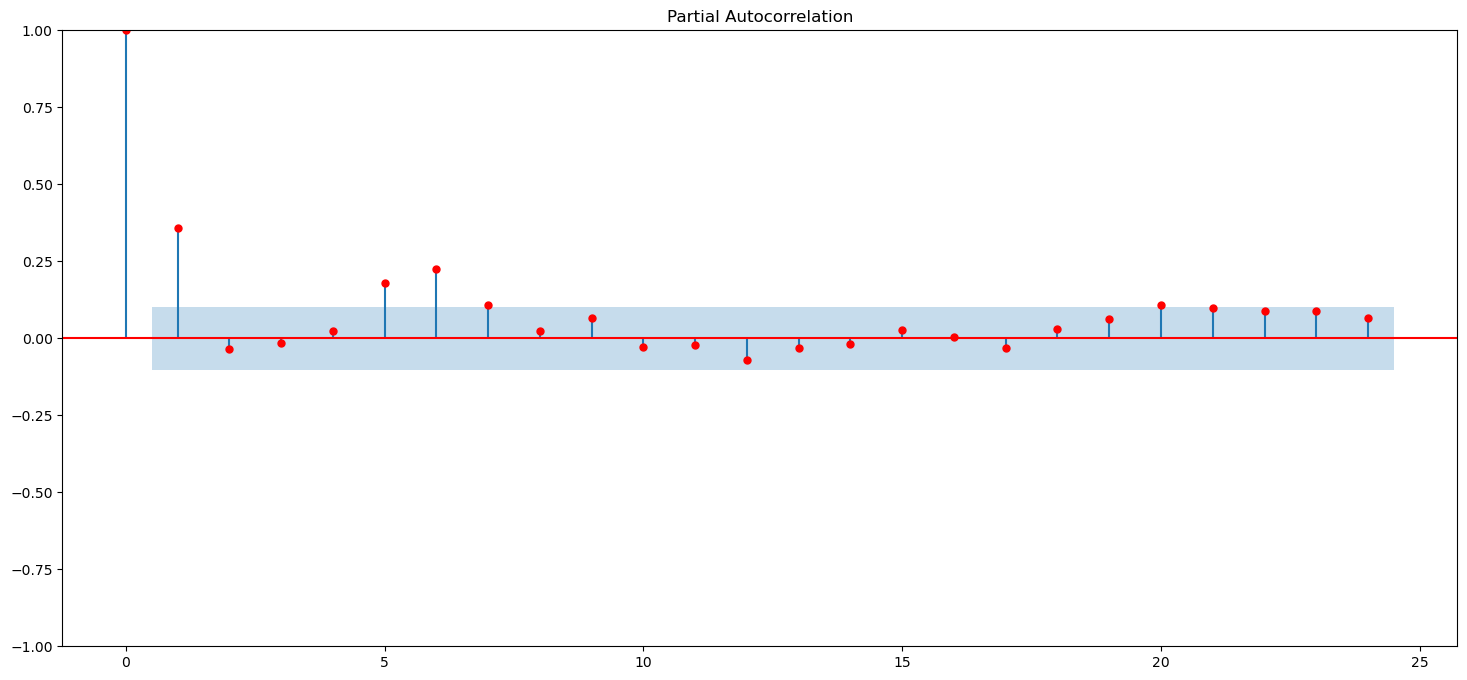

In [115]:
plot_pacf(df_generation, lags=24, color = 'r')
plt.show()

The above code creates an autocorrelation plot and a partial autocorrelation plot of the consumption column of the DataFrame. The plot_acf() and plot_pacf() functions take the time series data as input and the number of lags to include in the plot.

The autocorrelation plot shows the correlation between the time series and its lagged values. The partial autocorrelation plot shows the partial correlation between the time series and its lagged values, after removing the effect of intermediate lags.

If the autocorrelation plot shows a significant correlation at lag 5 and the partial autocorrelation plot shows a sharp drop at lag 1, it suggests that the time series is stationary. If the autocorrelation plot shows a slow decay and the partial autocorrelation plot shows significant correlations at multiple lags, it suggests that the time series is not stationary and may require differencing.

In [116]:
#p= 1,d=0, q= 5

<AxesSubplot:xlabel='Total (MWh)', ylabel='Density'>

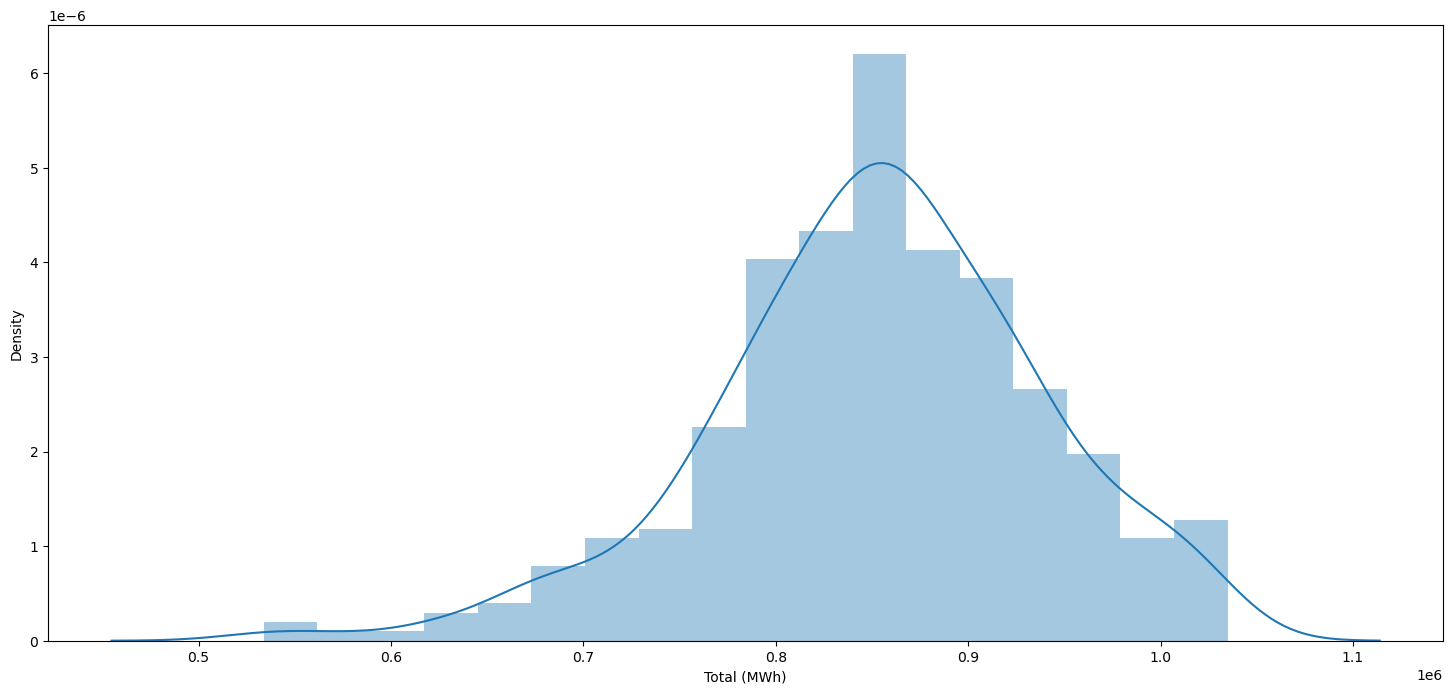

In [117]:
sns.distplot(df_generation['Total (MWh)'])

In [118]:
import scipy.stats as stats

In [119]:
ma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Freq: D
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total (MWh)     365 non-null    float64
 1   Moving Average  359 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [120]:
MA=ma['Moving Average'].dropna()

<AxesSubplot:ylabel='Density'>

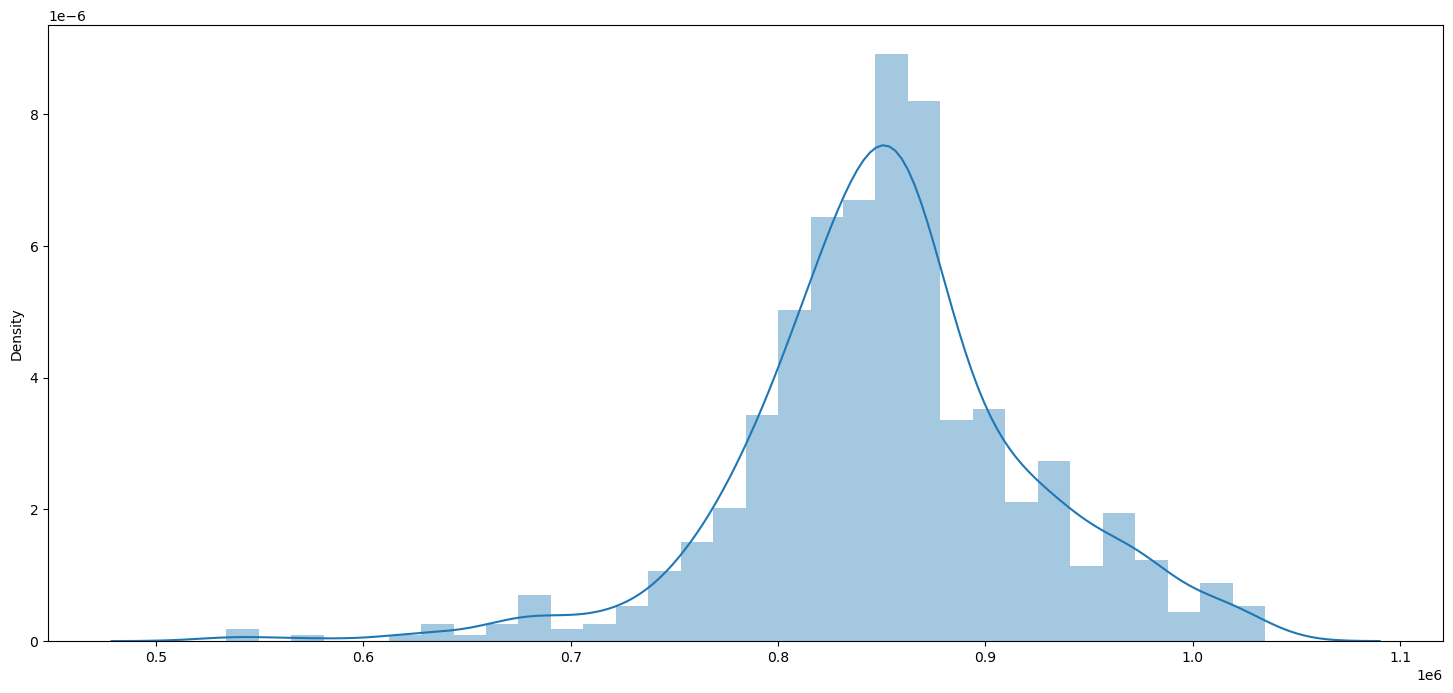

In [121]:
sns.distplot(ma)

In [122]:
## Splitting Training and Test Data Sets.
testgeneration_A = df_generation.iloc[-31:]
traingeneration_A = df_generation.iloc[:-31] 
print(f"Train Shape: {traingeneration_A.shape}; Test Shape: {testgeneration_A.shape}")

Train Shape: (334, 1); Test Shape: (31, 1)


In [123]:
## Splitting Training and Test Data Sets.
testgeneration = ma['Moving Average'].iloc[-31:]
traingeneration = ma['Moving Average'].iloc[:-31] 
print(f"Train Shape: {traingeneration.shape}; Test Shape: {testgeneration.shape}")

Train Shape: (334,); Test Shape: (31,)


# ARIMA for Generation

In [124]:
from statsmodels.tsa.arima.model import ARIMA

In [211]:
model = ARIMA(traingeneration_A, order=(1,0,2))
model_fit = model.fit()
prediction = model_fit.predict(start=testgeneration_A.index[0], end = testgeneration.index[-1])
prediction.head()

2022-12-01    835407.470365
2022-12-02    829114.276808
2022-12-03    829810.932121
2022-12-04    830487.426470
2022-12-05    831144.343305
Freq: D, Name: predicted_mean, dtype: float64

In [212]:
results = model.fit()

In [213]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [214]:
test = acorr_ljungbox(df_generation, lags=None)
test

lb_stat     lb_pvalue
1    46.707379  8.241810e-12
2    50.089563  1.327974e-11
3    50.118382  7.538587e-11
4    50.218879  3.250173e-10
5    60.564260  9.292039e-12
6    95.307416  2.385849e-18
7   122.400327  2.422260e-23
8   130.343713  2.400997e-24
9   133.886783  1.879936e-24
10  134.144521  6.654721e-24

In [215]:
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.532e+05   1.56e+04     54.788      0.000    8.23e+05    8.84e+05
ar.L1          0.9711      0.029     33.565      0.000       0.914       1.028
ma.L1         -0.6359      0.050    -12.750      0.000      -0.734      -0.538
ma.L2         -0.2594      0.060     -4.348      0.000      -0.376      -0.142
sigma2      6.359e+09      0.165   3.84e+10      0.000    6.36e+09    6.36e+09


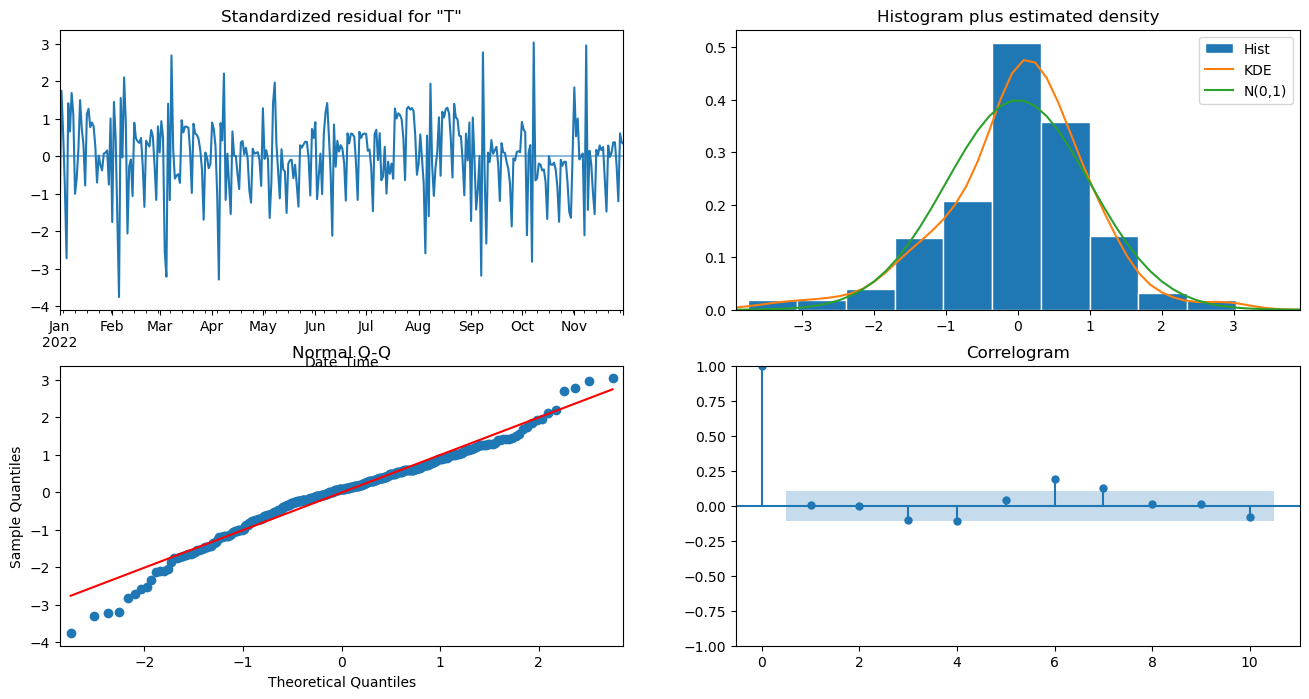

In [216]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

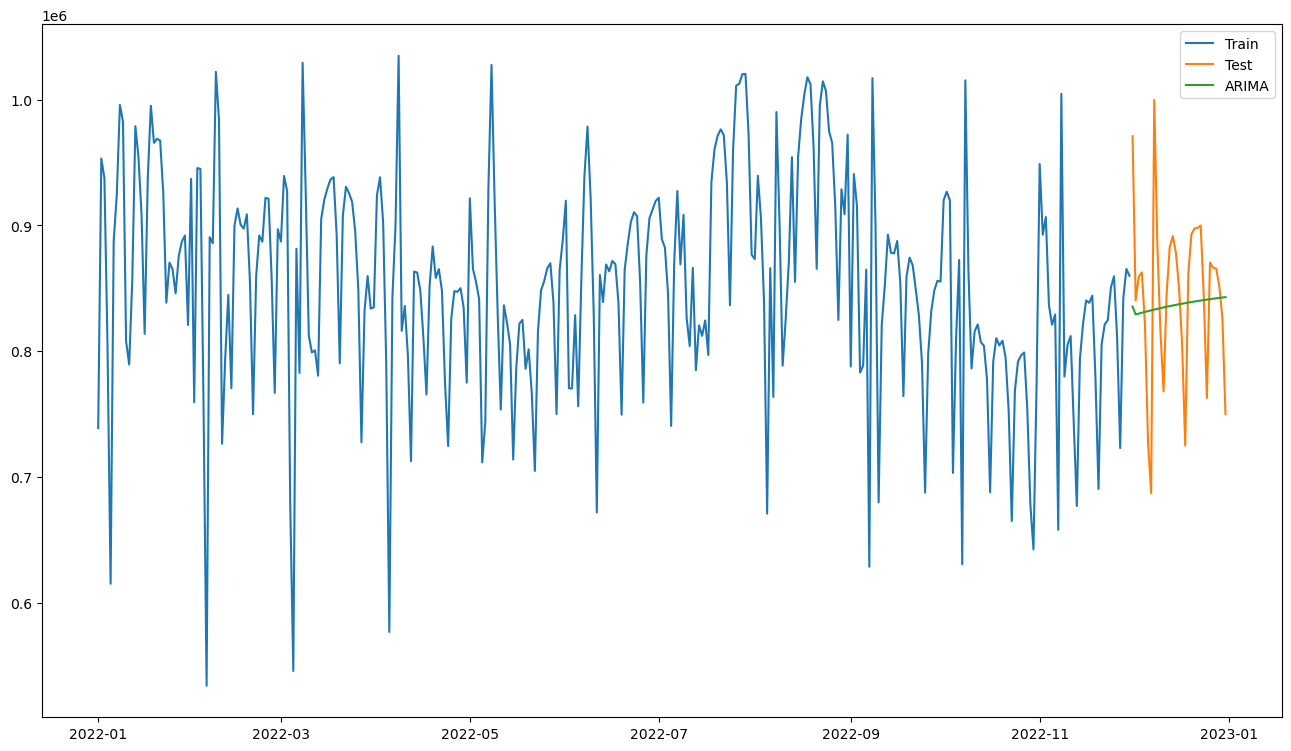

In [217]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(traingeneration_A, label='Train')
plt.plot(testgeneration_A, label='Test')
plt.plot(prediction, label='ARIMA')
plt.legend(loc='best')
plt.show() 

In [218]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [219]:
mse = mean_squared_error(testgeneration_A, prediction)
mae = mean_absolute_error(testgeneration_A, prediction)
r2 = r2_score(testgeneration_A, prediction)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 4511210223.99
MAE: 52052.51
R^2: -0.01


# SARIMAX for Generation

In [132]:
model_S  = sm.tsa.statespace.SARIMAX(ma['Moving Average'],
                                order=(1,0,1),
                                seasonal_order=(3, 0, 4, 7),
                                enforce_invertibility=False)
results_S = model_S.fit()
print(results_S.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.001    956.959      0.000       0.998       1.002
ma.L1          0.3030      0.065      4.632      0.000       0.175       0.431
ar.S.L7        0.1054      0.496      0.212      0.832      -0.867       1.078
ar.S.L14       0.3889      0.727      0.535      0.593      -1.035       1.813
ar.S.L21       0.5049      0.293      1.725      0.085      -0.069       1.079
ma.S.L7       -0.8524      0.516     -1.653      0.098      -1.863       0.159
ma.S.L14      -0.4904      1.083     -0.453      0.651      -2.612       1.632
ma.S.L21      -0.1595      0.668     -0.239      0.811      -1.468       1.149
ma.S.L28       0.5038      0.149      3.372      0.001       0.211       0.797
sigma2      2.058e+08   9.72e-09   2.12e+16      0.000    2.06e+08    2.06e+08


In [133]:
results_S.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                               Moving Average   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(3, 0, [1, 2, 3, 4], 7)   Log Likelihood               -3888.803
Date:                                      Mon, 17 Apr 2023   AIC                           7797.606
Time:                                              03:42:12   BIC                           7836.605
Sample:                                          01-01-2022   HQIC                          7813.105
                                               - 12-31-2022                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.001    956.959      0.000       0.998       1.002
ma.L1          0.3030      0.065      4.632      0.000       0.175       0.431
ar.S.L7        0.1054      0.496      0.212      0.832      -0.867       1.078
ar.S.L14       0.3889      0.727      0.535      0.593      -1.035       1.813
ar.S.L21       0.5049      0.293      1.725      0.085      -0.069       1.079
ma.S.L7       -0.8524      0.516     -1.653      0.098      -1.863       0.159
ma.S.L14      -0.4904      1.083     -0.453      0.651      -2.612       1.632
ma.S.L21      -0.1595      0.668     -0.239      0.811      -1.468       1.149
ma.S.L28       0.5038      0.149      3.372      0.001       0.211       0.797
sigma2      2.058e+08   9.72e-09   2.12e+16      0.000    2.06e+08    2.06e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                48.43
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.35
Prob(H) (two-sided):                  0.43   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.68e+32. Standard errors may be unstable.
"""

In [134]:
prediction_S = results_S.predict(start=testgeneration.index[0], end =testgeneration.index[-1])
prediction_S.head()

Date_Time
2022-12-01    832899.803745
2022-12-02    849390.564413
2022-12-03    844999.273133
2022-12-04    857843.215502
2022-12-05    871805.676440
Freq: D, Name: predicted_mean, dtype: float64

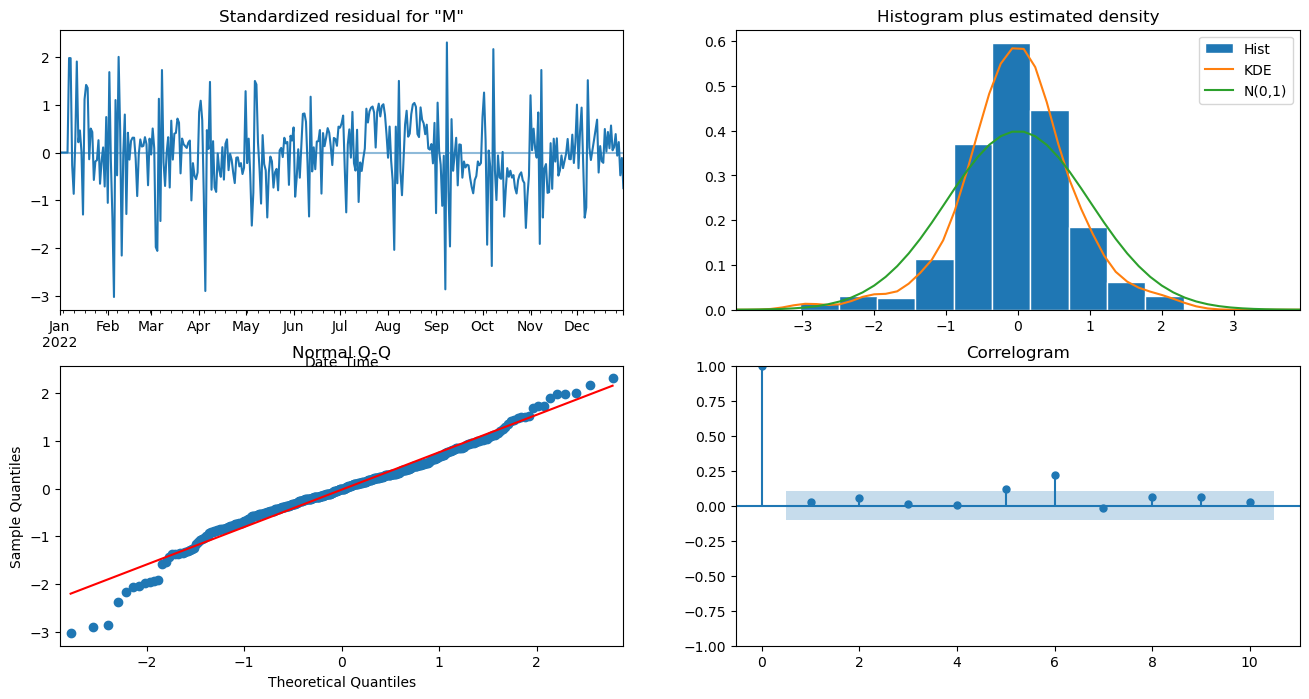

In [135]:
results_S.plot_diagnostics(figsize=(16, 8))
plt.show()

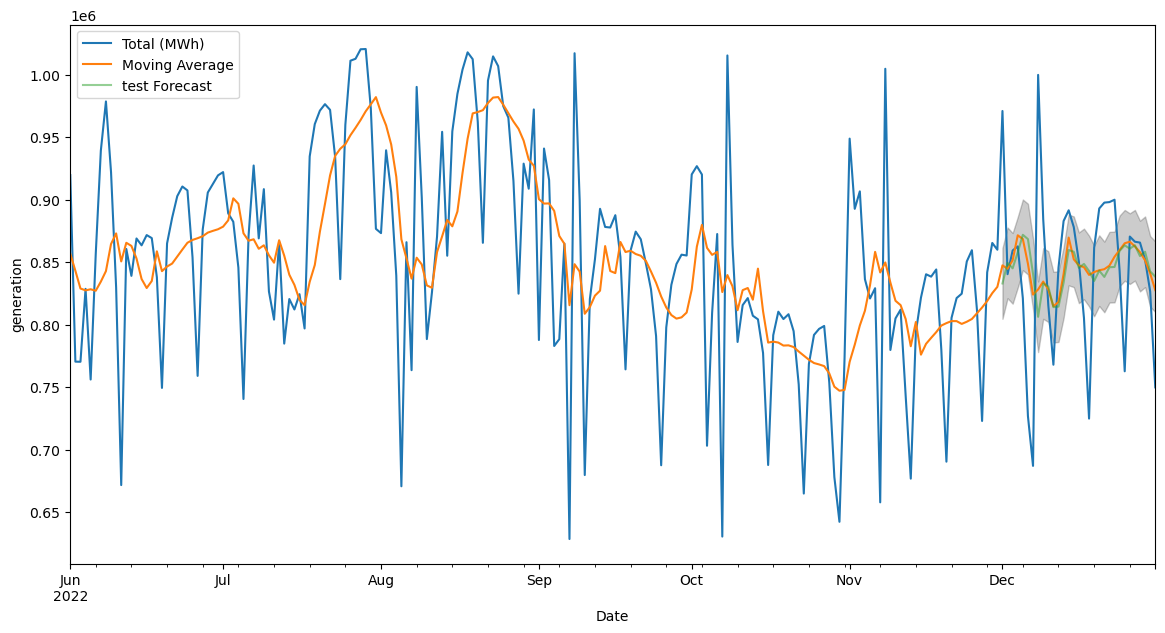

In [136]:
#set forecasts to start at 2022-12-01 to the end of the data to forecast
pred = results_S.get_prediction(start=pd.to_datetime('2022-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ma['2022-06':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='test Forecast', alpha=.5, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('generation')
plt.legend()
plt.show()

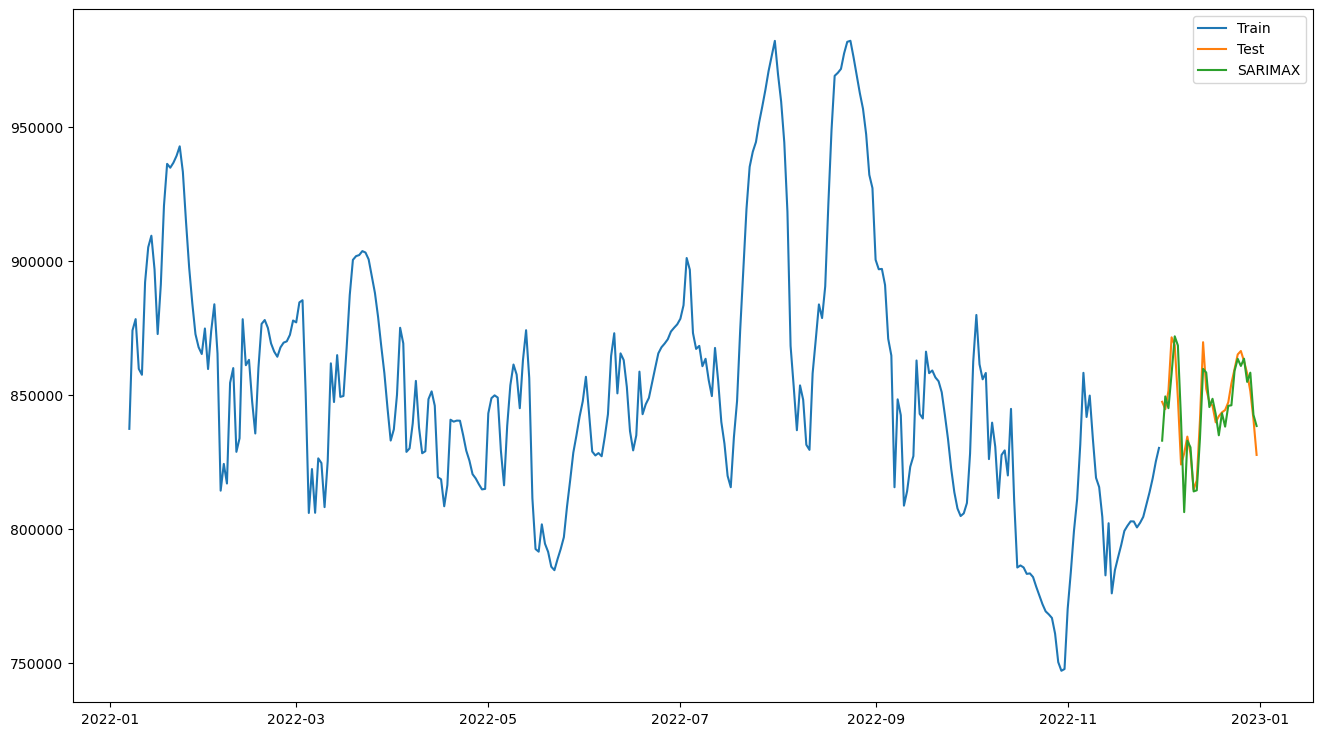

In [137]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(traingeneration, label='Train')
plt.plot(testgeneration, label='Test')
plt.plot(prediction_S, label='SARIMAX')
plt.legend(loc='best')
plt.show() 

In [138]:
SRIMAX_mse = mean_squared_error(testgeneration, prediction_S)
SRIMAX_mae = mean_absolute_error(testgeneration, prediction_S)
SRIMAX_r2 = r2_score(testgeneration, prediction_S)

print(f'MSE: {SRIMAX_mse:.2f}')
print(f'MAE: {SRIMAX_mae:.2f}')
print(f'R^2: {SRIMAX_r2:.2f}')

MSE: 71178803.62
MAE: 6255.33
R^2: 0.67


In [139]:
testgeneration.head()

Date_Time
2022-12-01    847388.047143
2022-12-02    844649.140000
2022-12-03    851483.642857
2022-12-04    871428.627143
2022-12-05    868475.030000
Freq: D, Name: Moving Average, dtype: float64

In [140]:
prediction_S.head()

Date_Time
2022-12-01    832899.803745
2022-12-02    849390.564413
2022-12-03    844999.273133
2022-12-04    857843.215502
2022-12-05    871805.676440
Freq: D, Name: predicted_mean, dtype: float64

In [141]:
rmse= sqrt(mse)
rmse

67295.41422930764

In [142]:
forecast_S = results_S.predict(start='2023-01-01', end='2023-01-31')

In [355]:
forecast_S.head(10)

2023-01-01    823793.567367
2023-01-02    818212.482966
2023-01-03    816189.973133
2023-01-04    812141.625562
2023-01-05    816176.334766
2023-01-06    818429.371821
2023-01-07    825829.035605
2023-01-08    826951.056006
2023-01-09    826035.402263
2023-01-10    828329.096428
Freq: D, Name: predicted_mean, dtype: float64

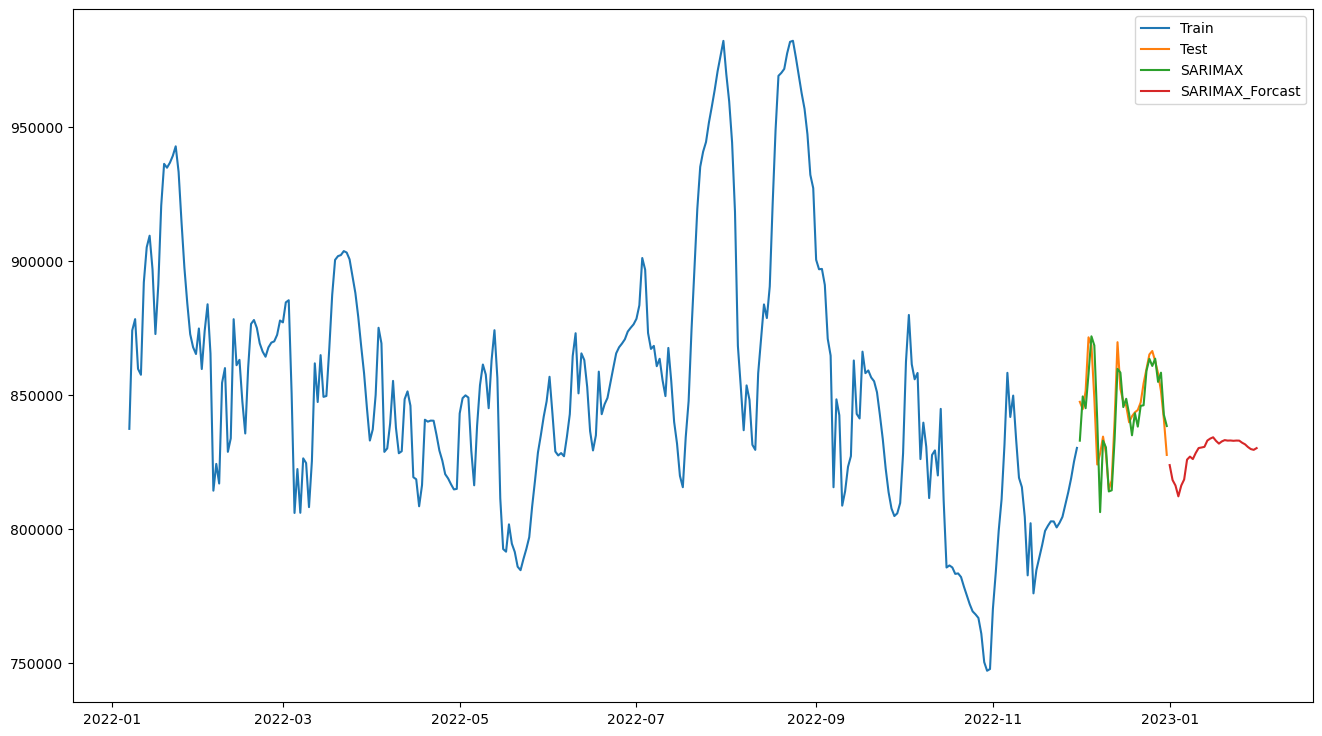

In [144]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(traingeneration, label='Train')
plt.plot(testgeneration, label='Test')
plt.plot(prediction_S, label='SARIMAX')
plt.plot(forecast_S, label='SARIMAX_Forcast')
plt.legend(loc='best')
plt.show() 

# AUTO ARIMA for Generation

In [145]:
from pmdarima import auto_arima

In [146]:
df_generation_aa = auto_arima(MA)

In [147]:
df_generation_aa

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [148]:
df_generation_aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  359
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -3926.956
Date:                Mon, 17 Apr 2023   AIC                           7865.913
Time:                        03:42:23   BIC                           7889.196
Sample:                    01-07-2022   HQIC                          7875.172
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7873      0.034     23.410      0.000       0.721       0.853
ar.L2         -0.9981      0.027    -36.686      0.000      -1.051      -0.945
ar.L3          0.0482      0.021      2.299      0.021       0.007       0.089
ma.L1         -0.7311      0.028    -26.315      0.000      -0.786      -0.677
ma.L2          0.9438      0.026     35.671      0.000       0.892       0.996
sigma2      1.996e+08   2.44e-11   8.18e+18      0.000       2e+08       2e+08
===================================================================================
Ljung-Box (L1) (Q):                   4.90   Jarque-Bera (JB):                18.54
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.26
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.43e+35. Standard errors may be unstable.
"""

In [149]:
#model values - Fitted values
df_generation_aa_v = pd.DataFrame(df_generation_aa.predict_in_sample(),index=MA.index)

In [150]:
df_generation_aa_v.head()

predicted_mean
Date_Time                 
2022-01-07        0.000000
2022-01-08   884573.996734
2022-01-09   862010.517991
2022-01-10   863290.711200
2022-01-11   860527.043976

In [151]:
#residual/Errors
df_generation_res = pd.DataFrame(df_generation_aa.resid(), index = MA.index)

In [152]:
df_generation_res.head()

0
Date_Time                
2022-01-07  837301.804286
2022-01-08  -10572.649591
2022-01-09   16191.140581
2022-01-10   -3619.052628
2022-01-11   -3066.198262

Text(0.5, 1.0, 'Line plot of residual: ARIMA')

<Figure size 1000x700 with 0 Axes>

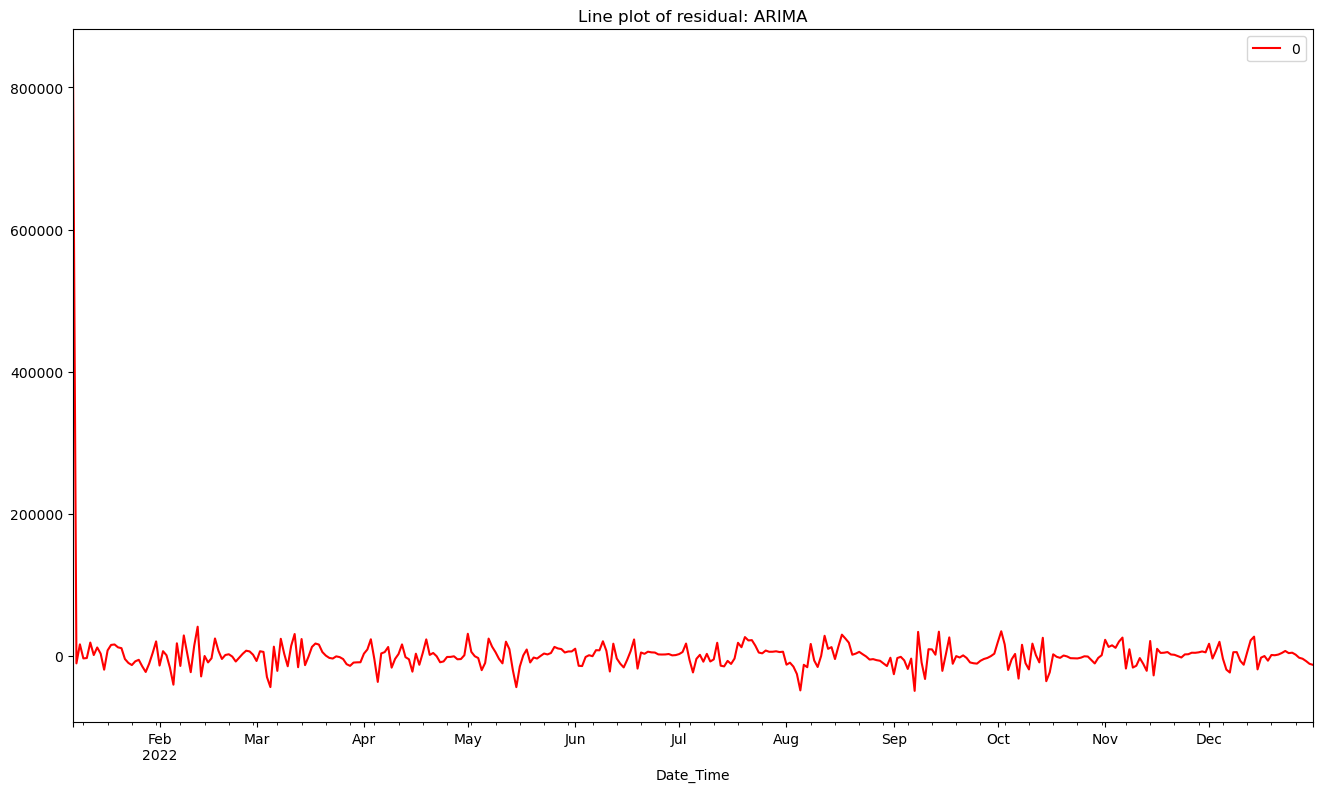

In [153]:
#Lineplot
plt.figure(figsize=(10,7))
df_generation_res.plot(color = 'r')
plt.title('Line plot of residual: ARIMA')

Text(0.5, 1.0, 'Density plot of residual: ARIMA')

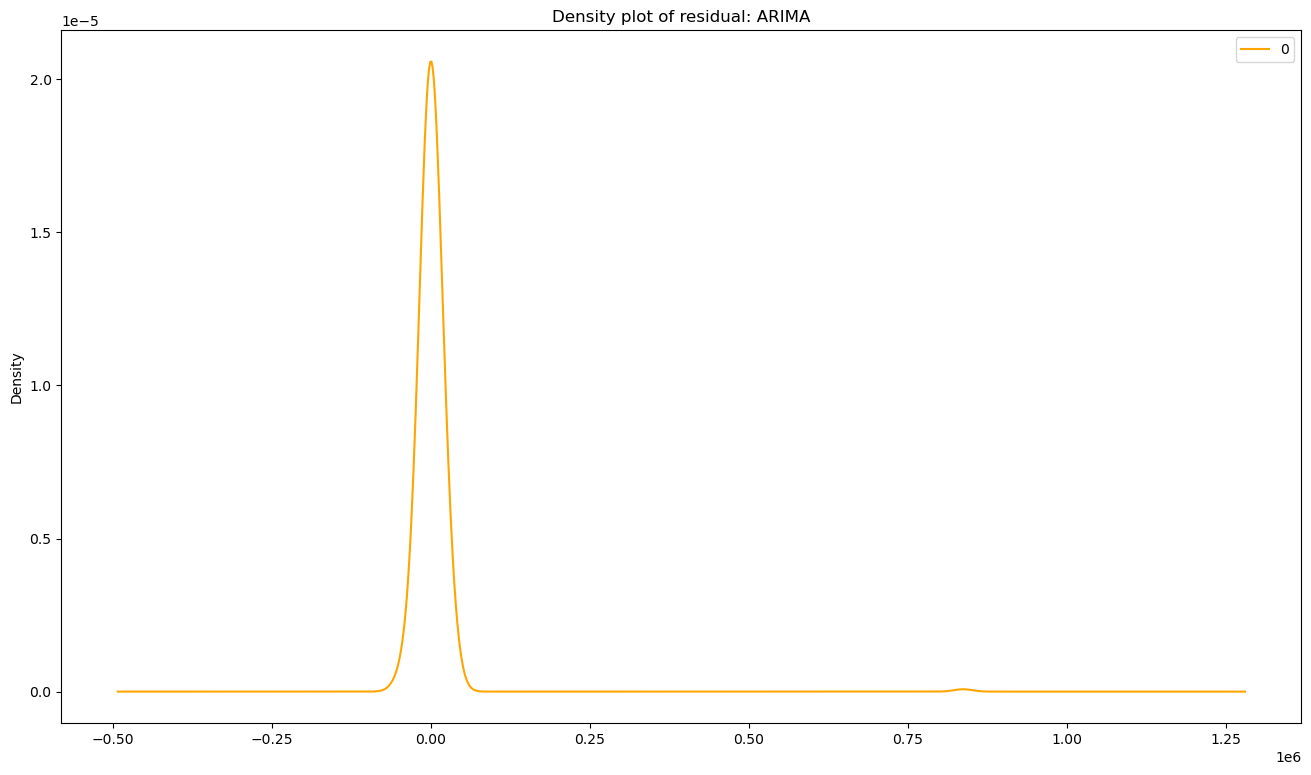

In [154]:
#density plot
df_generation_res.plot(kind = 'kde', color = 'orange')
plt.title('Density plot of residual: ARIMA')

In [155]:
#squaring residual/error
df_generation_se = pow(df_generation_res,2)
df_generation_se.head()

0
Date_Time               
2022-01-07  7.010743e+11
2022-01-08  1.117809e+08
2022-01-09  2.621530e+08
2022-01-10  1.309754e+07
2022-01-11  9.401572e+06

In [156]:
#average/mean of squared residual /errors
df_generation_mse = (df_generation_se.sum())/len(df_generation_se)
print(df_generation_mse)

0    2.149626e+09
dtype: float64


In [157]:
df_generation_rmse = sqrt(df_generation_mse)
df_generation_rmse

46364.06275224791

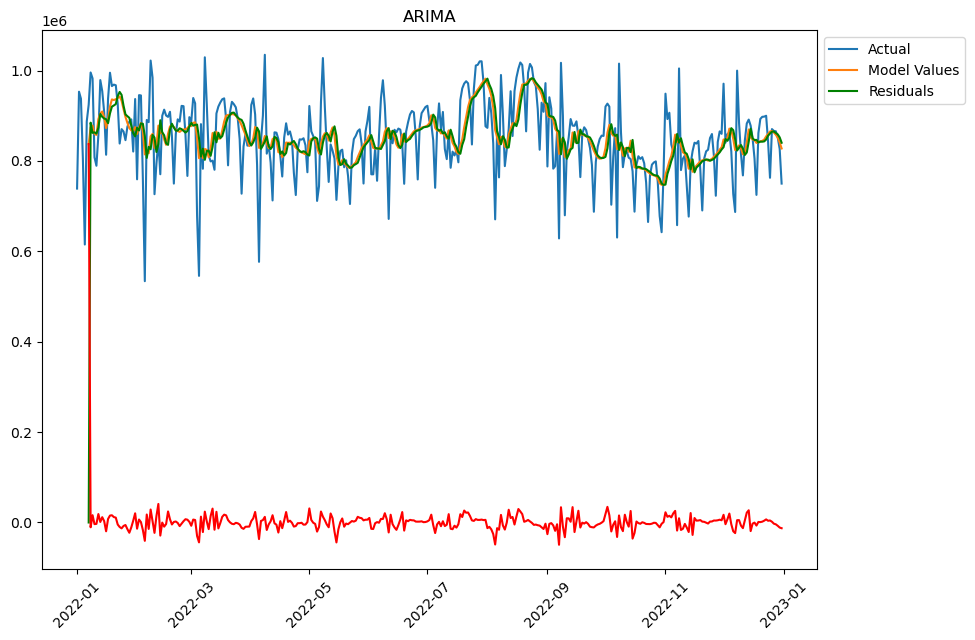

In [158]:
#plot comparision actual, model values & residual 
plt.figure(figsize=(10,7))
plt.plot(ma)
plt.plot(df_generation_aa_v, 'g')
plt.plot(df_generation_res, 'r')
plt.legend(['Actual', 'Model Values', 'Residuals'],
          bbox_to_anchor = (1, 1), loc= 2)
plt.xticks(rotation = 45)
plt.title("ARIMA")
plt.show()

In [159]:
#forcast
df_generation_pred = df_generation_aa.predict(n_periods =31)
df_generation_pred = pd.DataFrame(df_generation_pred,
                             index=pd.date_range(start='2023-01-01',
                                                 end='2023-01-31', freq='D'))

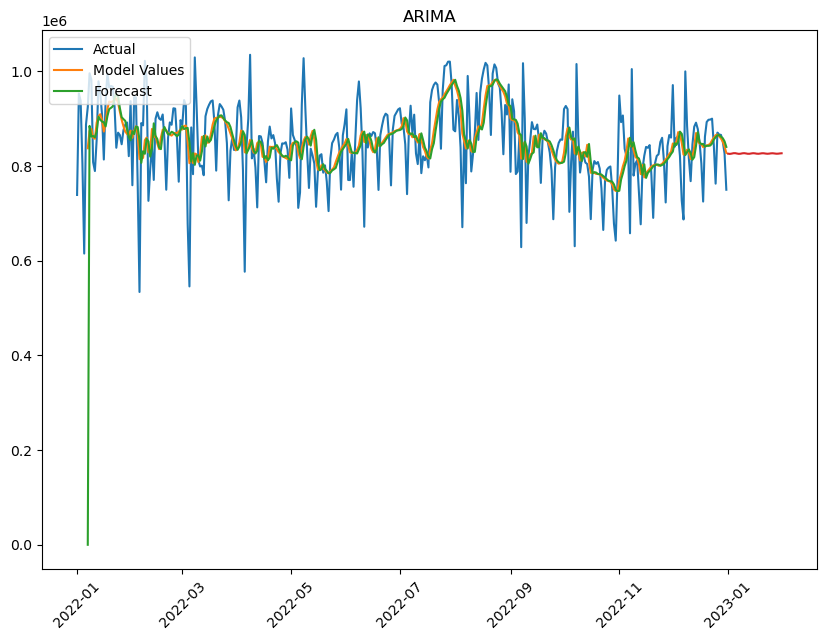

In [160]:
plt.figure(figsize=(10,7))
plt.plot(ma)
plt.plot(df_generation_aa_v)
plt.plot(df_generation_pred)
plt.legend(['Actual', 'Model Values', 'Forecast'], loc=2)
plt.xticks(rotation =45)
plt.title('ARIMA')
plt.show()

# ExponentialSmoothing Total Generation

In [161]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [162]:
df_generation_es = ExponentialSmoothing(df_generation, seasonal_periods=7,
                                  trend= 'mul', seasonal= 'mul').fit()


In [163]:
df_generation_es.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:              Total (MWh)   No. Observations:                  365
Model:             ExponentialSmoothing   SSE                  2550888978533.406
Optimized:                         True   AIC                           8295.661
Trend:                   Multiplicative   BIC                           8338.560
Seasonal:                Multiplicative   AICC                          8296.699
Seasonal Periods:                     7   Date:                 Mon, 17 Apr 2023
Box-Cox:                          False   Time:                         03:42:25
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1464286                alpha                 True
smoothing_trend               0.0266234                 beta                 True
smoothing_seasonal            0.0984890                gamma                 True
initial_level                8.5145e+05                  l.0                 True
initial_trend                 1.0057199                  b.0                 True
initial_seasons.0             1.0561794                  s.0                 True
initial_seasons.1             0.9672341                  s.1                 True
initial_seasons.2             0.9913511                  s.2                 True
initial_seasons.3             0.9582279                  s.3                 True
initial_seasons.4             0.9213346                  s.4                 True
initial_seasons.5             1.0496679                  s.5                 True
initial_seasons.6             1.0560051                  s.6                 True
---------------------------------------------------------------------------------
"""

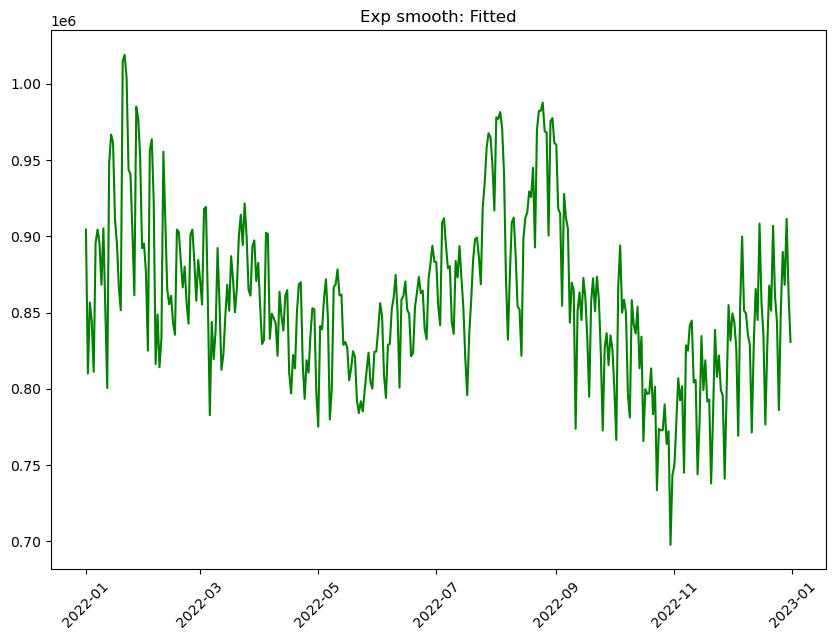

In [164]:
plt.figure(figsize=(10,7))
plt.plot(df_generation_es.fittedvalues, 'g')
plt.xticks(rotation=45)
plt.title('Exp smooth: Fitted')
plt.show()

In [165]:
#residuals
df_generation_res1 = pd.DataFrame(df_generation_es.resid)
df_generation_res1.head()

0
Date_Time                
2022-01-01 -165626.101426
2022-01-02  143020.612977
2022-01-03   81067.459729
2022-01-04  -39753.573573
2022-01-05 -196148.977619

Text(0.5, 1.0, 'Line plot of residuals: ES')

<Figure size 1000x700 with 0 Axes>

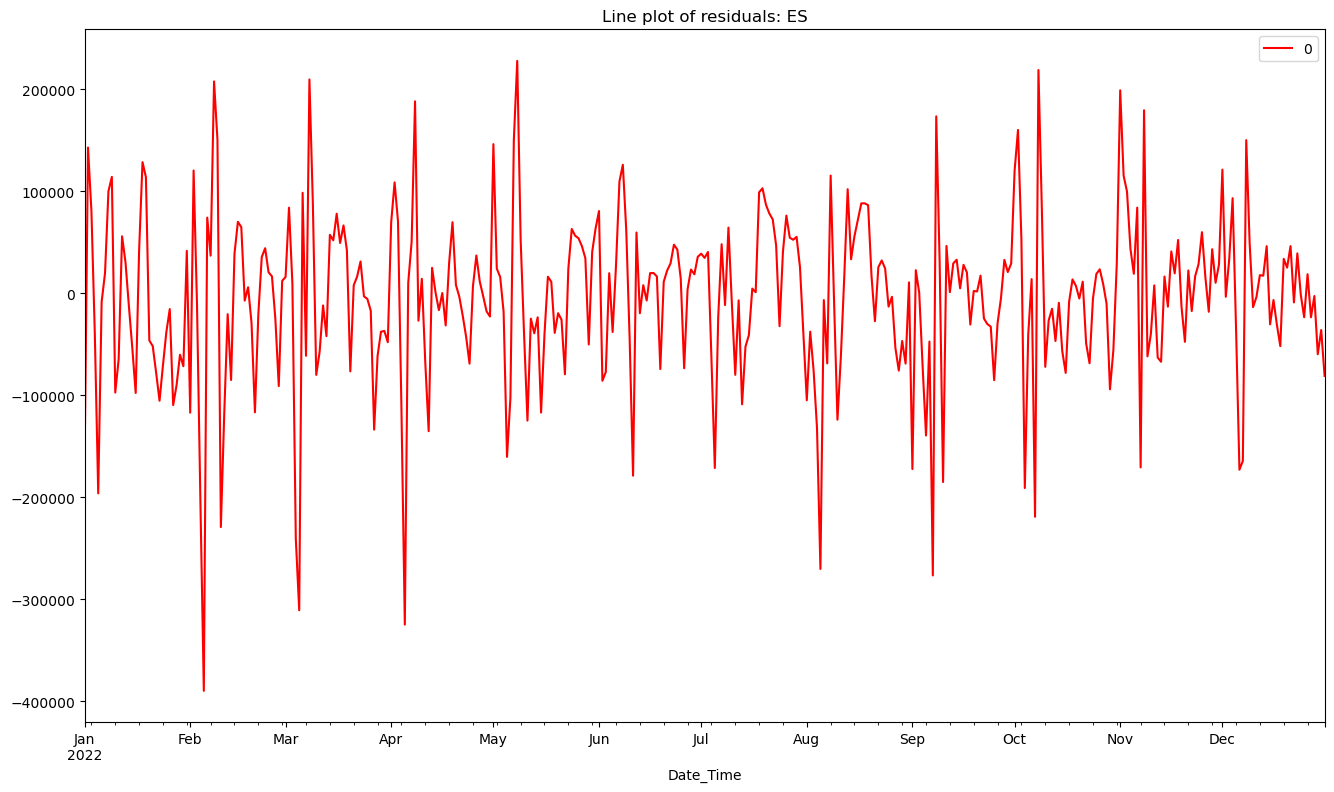

In [166]:
#lineplot residul
plt.figure(figsize=(10,7))
df_generation_res1.plot(color = 'r')
plt.title('Line plot of residuals: ES')

Text(0.5, 1.0, 'Density plot of residual: ES')

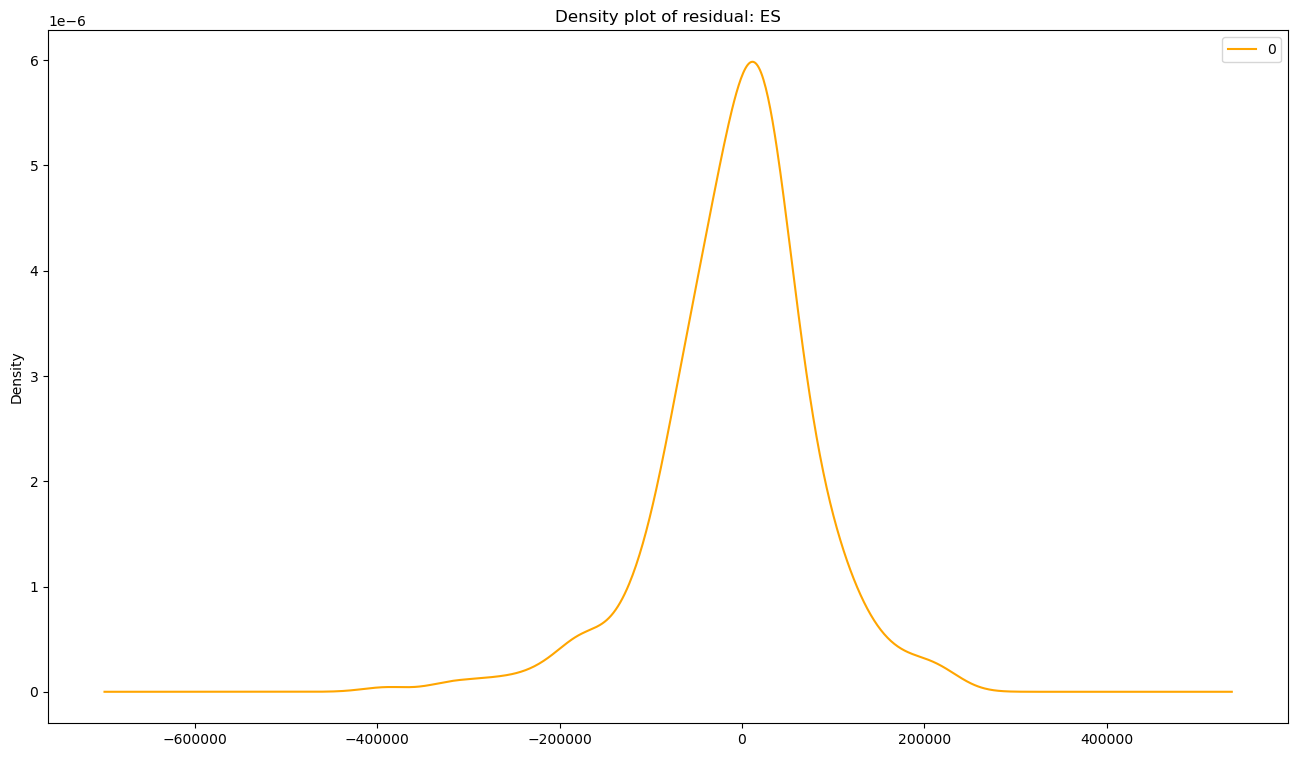

In [167]:
#density plot
df_generation_res1.plot(kind = 'kde', color = 'orange')
plt.title('Density plot of residual: ES')

In [168]:
#squaring residual/error
df_generation_se1 = pow(df_generation_res1,2)
df_generation_se1.head()

0
Date_Time               
2022-01-01  2.743201e+10
2022-01-02  2.045490e+10
2022-01-03  6.571933e+09
2022-01-04  1.580347e+09
2022-01-05  3.847442e+10

In [169]:
#average/mean of squared residual /errors
df_generation_mse1 = (df_generation_se1.sum())/len(df_generation_se1)
print(df_generation_mse1)

0    6.988737e+09
dtype: float64


In [170]:
#rmse
df_generation_rmse1 = sqrt(df_generation_mse1)
df_generation_rmse1

83598.66582361698

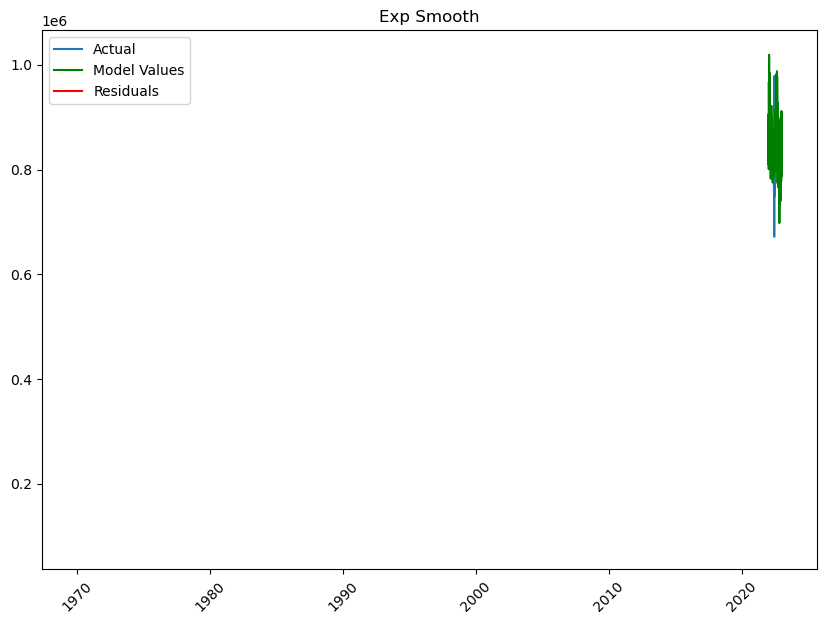

In [171]:
#plot actual, model values and residual
plt.figure(figsize=(10,7))
plt.plot(df_generation['2022-06'])
plt.plot(df_generation_es.fittedvalues, 'g')
plt.plot(df_generation_rmse1, 'r')
plt.legend(['Actual', 'Model Values', 'Residuals'])
plt.xticks(rotation = 45)
plt.title("Exp Smooth")
plt.show()

In [172]:
#forecast
df_generation_fore = df_generation_es.forecast(31)
df_generation_fore.head()

2023-01-01    759945.431628
2023-01-02    830520.116974
2023-01-03    860015.323979
2023-01-04    843676.199583
2023-01-05    879949.491844
Freq: D, dtype: float64

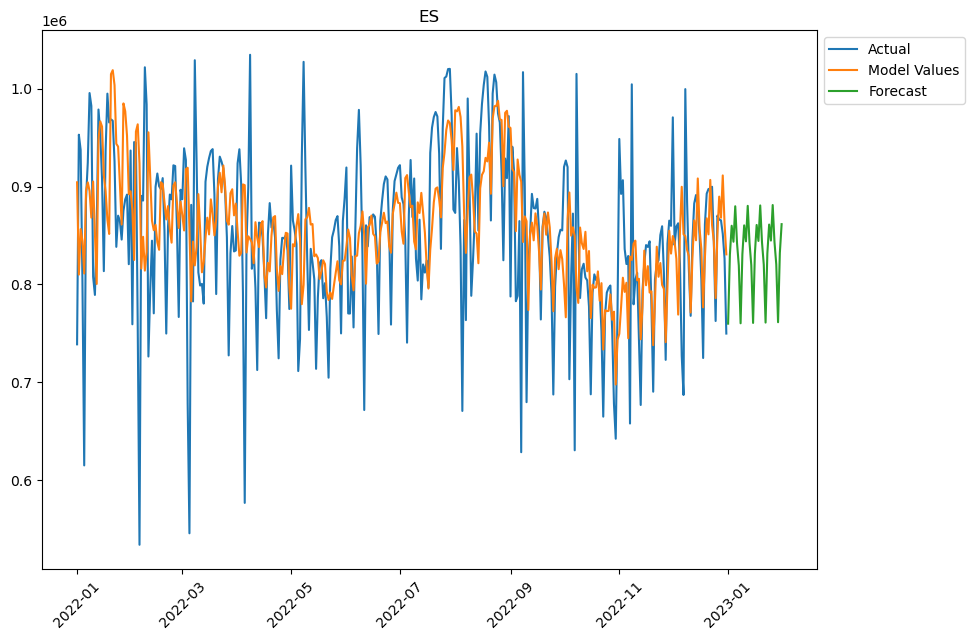

In [173]:
#plot actual, model values & forecast
plt.figure(figsize=(10,7))
plt.plot(df_generation)
plt.plot(df_generation_es.fittedvalues)
plt.plot(df_generation_fore)
plt.legend(['Actual', 'Model Values', 'Forecast'], bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation =45)
plt.title('ES')
plt.show()

## Visualization of four models for Generation

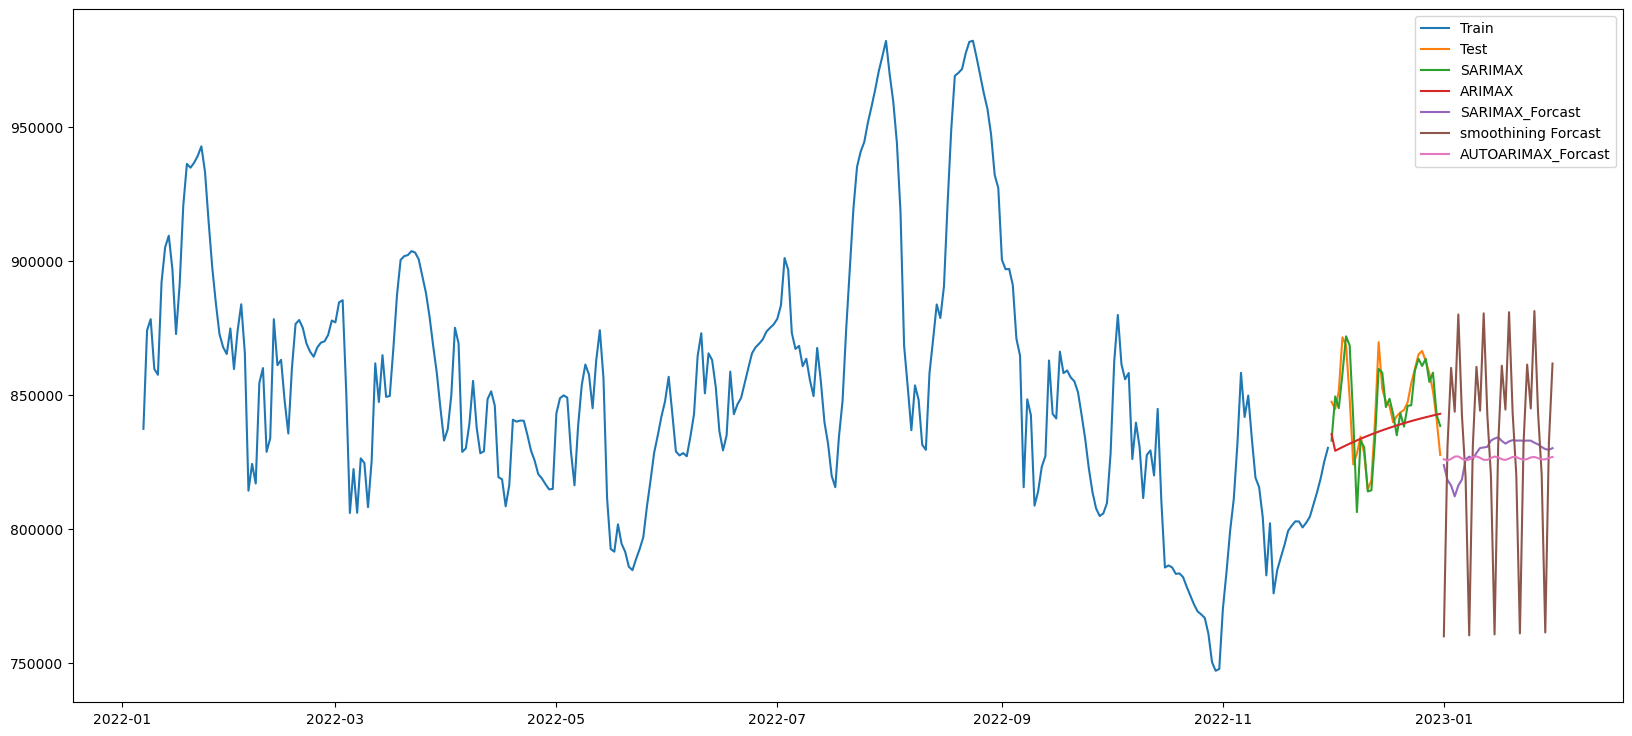

In [356]:
plt.rcParams["figure.figsize"] = [20,9]
plt.plot(traingeneration, label='Train')
plt.plot(testgeneration, label='Test')
plt.plot(prediction_S, label='SARIMAX')
plt.plot(prediction, label='ARIMAX')
plt.plot(forecast_S, label='SARIMAX_Forcast')
plt.plot(df_generation_fore, label='smoothining Forcast')
plt.plot(df_generation_pred, label='AUTOARIMAX_Forcast')

plt.legend(loc='best')
plt.show() 

# demand forecast

The demand forecast has always played an important role in capacity and transmission planning, generation scheduling and pricing.

In [175]:
final_Sarimax=cons_forecast_S-forecast_S
final_Sarimax.head(10)

2023-01-01    26085.007701
2023-01-02    27503.313366
2023-01-03    27331.597175
2023-01-04    27919.529743
2023-01-05    27955.367866
2023-01-06    27925.392089
2023-01-07    27837.074700
2023-01-08    28071.249849
2023-01-09    27932.442910
2023-01-10    27600.466038
Freq: D, Name: predicted_mean, dtype: float64

In [176]:
final_ex_smoothing = df_consumption_fore-df_generation_fore
final_ex_smoothing.head(10)

2023-01-01    24187.092956
2023-01-02    19800.275035
2023-01-03    19463.766854
2023-01-04    20556.211068
2023-01-05    18677.852698
2023-01-06    20676.917327
2023-01-07    19275.318758
2023-01-08    22772.082768
2023-01-09    18262.532029
2023-01-10    17872.580674
Freq: D, dtype: float64

#### Average of both Sarimax and Ex_Smoothing

In [177]:
finalout=(final_Sarimax+final_ex_smoothing)/2
finalout.head(10)

2023-01-01    25136.050328
2023-01-02    23651.794200
2023-01-03    23397.682014
2023-01-04    24237.870406
2023-01-05    23316.610282
2023-01-06    24301.154708
2023-01-07    23556.196729
2023-01-08    25421.666309
2023-01-09    23097.487470
2023-01-10    22736.523356
Freq: D, dtype: float64

# Both generation and consumption

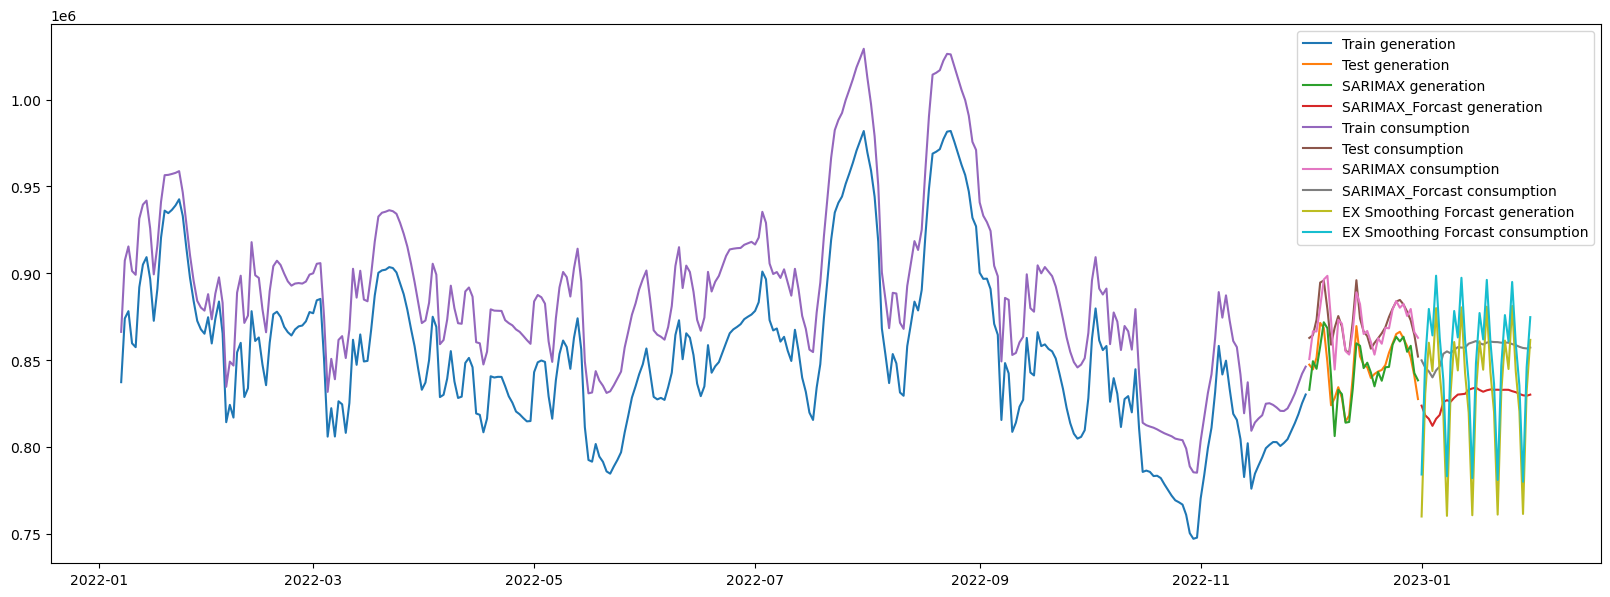

In [178]:
plt.rcParams["figure.figsize"] = [20,7]
plt.plot(traingeneration, label='Train generation')
plt.plot(testgeneration, label='Test generation')
plt.plot(prediction_S, label='SARIMAX generation')
plt.plot(forecast_S, label='SARIMAX_Forcast generation')
plt.plot(trainconsumption, label='Train consumption')
plt.plot(testconsumption, label='Test consumption')
plt.plot(cons_prediction_S, label='SARIMAX consumption')
plt.plot(cons_forecast_S, label='SARIMAX_Forcast consumption')
plt.plot(df_generation_fore, label='EX Smoothing Forcast generation')
plt.plot(df_consumption_fore, label='EX Smoothing Forcast consumption')

plt.legend(loc='best')
plt.show() 

This plot shows the forcasting the total power generation and power consumption in day to day life

A reduction in operation costs which directly affect consumers. This developed methodology provides an important risk management tool in the electricity industry.